In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sdgym

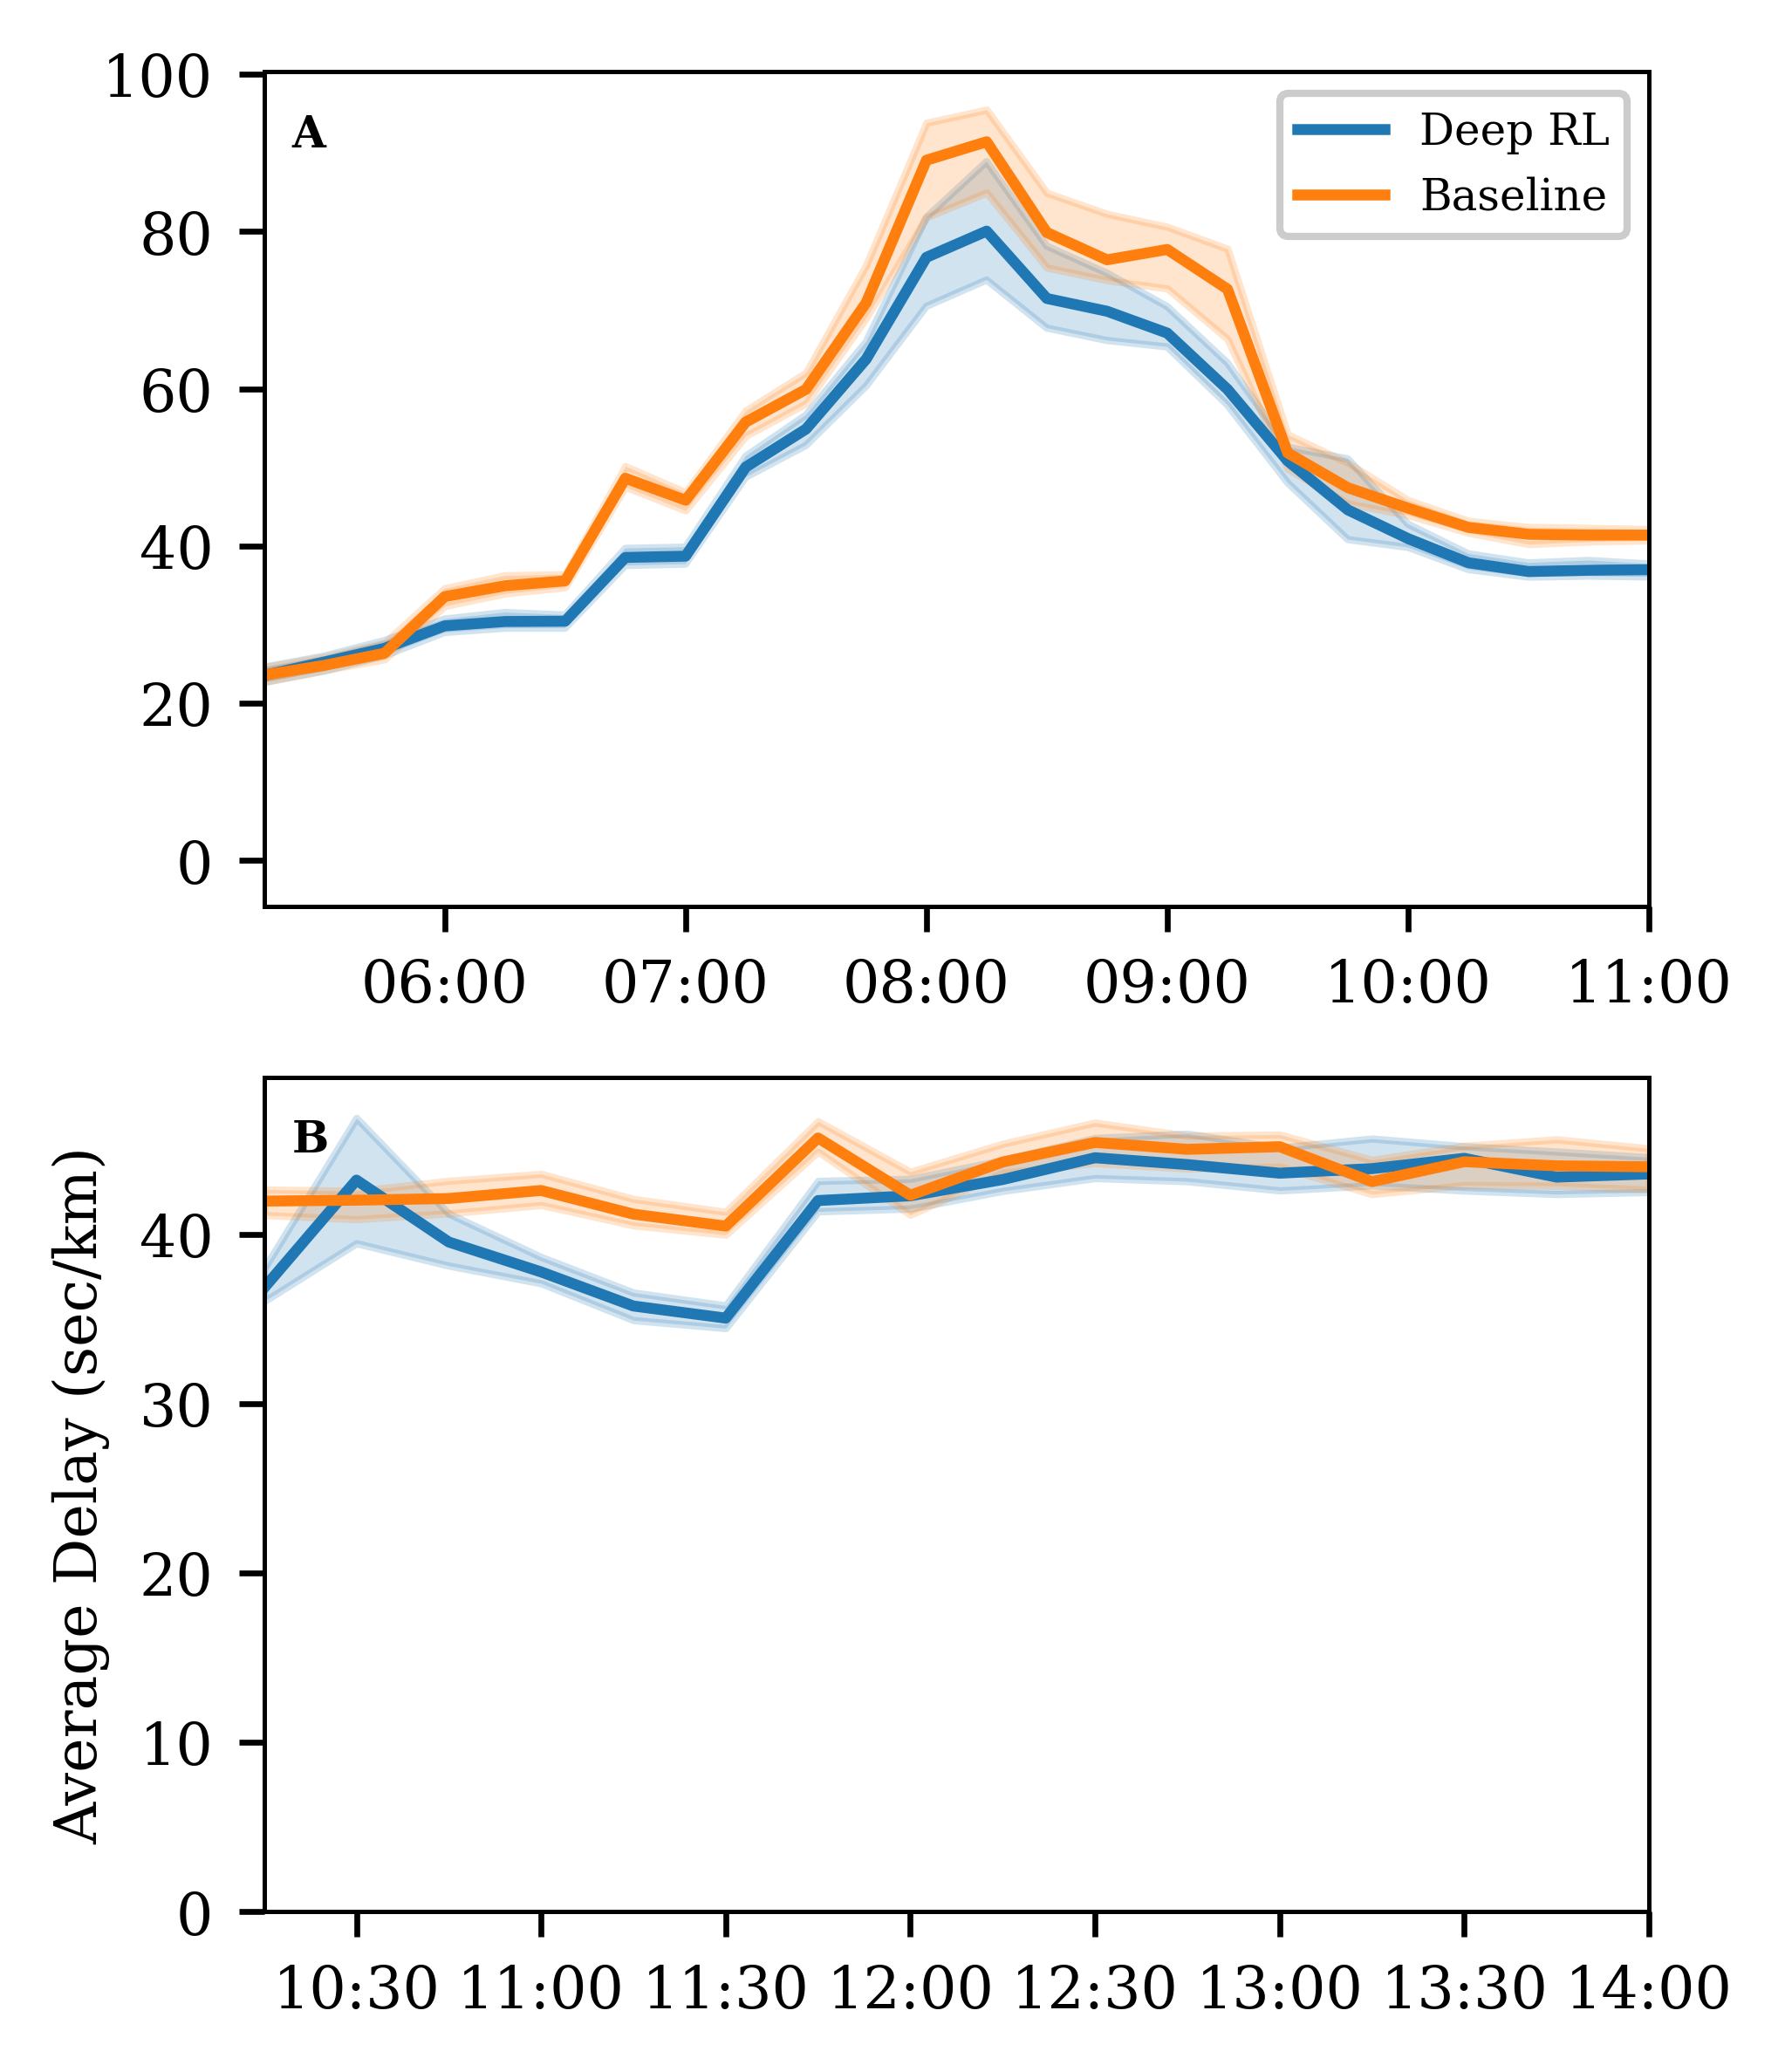

In [65]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

replcation_dict = {"AM": {'rep_num': 8050297, 'start_time': pd.to_timedelta(5, unit='hours')},
                   'noon': {'rep_num': 8050315, 'start_time': pd.to_timedelta(10, unit='hours')}, # change this
                   "PM": {'rep_num': 8050322, 'start_time': pd.to_timedelta(14, unit='hours')}}


for time_period, replication_data in replcation_dict.items():
  replication_number = replication_data['rep_num']
  df_baseline = pd.read_csv("data/50/data/baseline_replication_%s.csv"%replication_number)
  delay_baseline = df_baseline.groupby(['time'])['delay_time'].agg(min=percentile(25), median=np.median, max=percentile(75)).reset_index()
  delay_baseline.time = pd.to_timedelta(delay_baseline.time, unit='seconds') + pd.to_datetime(datetime.date.today()) + replcation_dict[time_period]['start_time']
  
  df_policy = pd.read_csv("data/50/data//replication_%s.csv"%replication_number)
  delay_policy = df_policy.groupby(['time'])['delay_time'].agg(min=percentile(25), median=np.median, max=percentile(75)).reset_index()
  delay_policy.time = pd.to_timedelta(delay_policy.time, unit='seconds') + pd.to_datetime(datetime.date.today()) + replcation_dict[time_period]['start_time']

  if replication_number == 8050297:
    AM_delay_baseline = delay_baseline
    AM_delay_policy = delay_policy
    AM_delay_baseline = delay_baseline
    AM_delay_policy.to_csv('AM_Incident_policy.csv')
    AM_delay_baseline.to_csv('AM_Incident_baseline.csv')
  elif replication_number == 8050315:
    NN_delay_baseline = delay_baseline
    NN_delay_policy = delay_policy
    NN_delay_baseline = delay_baseline
    NN_delay_policy.to_csv('NN_Incident_policy.csv')
    NN_delay_baseline.to_csv('NN_Incident_baseline.csv')
  elif replication_number == 8050322:
    PM_delay_baseline = delay_baseline
    PM_delay_policy = delay_policy
    PM_delay_baseline = delay_baseline
    PM_delay_policy.to_csv('PM_Incident_policy.csv')
    PM_delay_baseline.to_csv('PM_Incident_baseline.csv')
    



ConversionError: Failed to convert value(s) to axis units: Timestamp('2021-06-21 05:15:00')

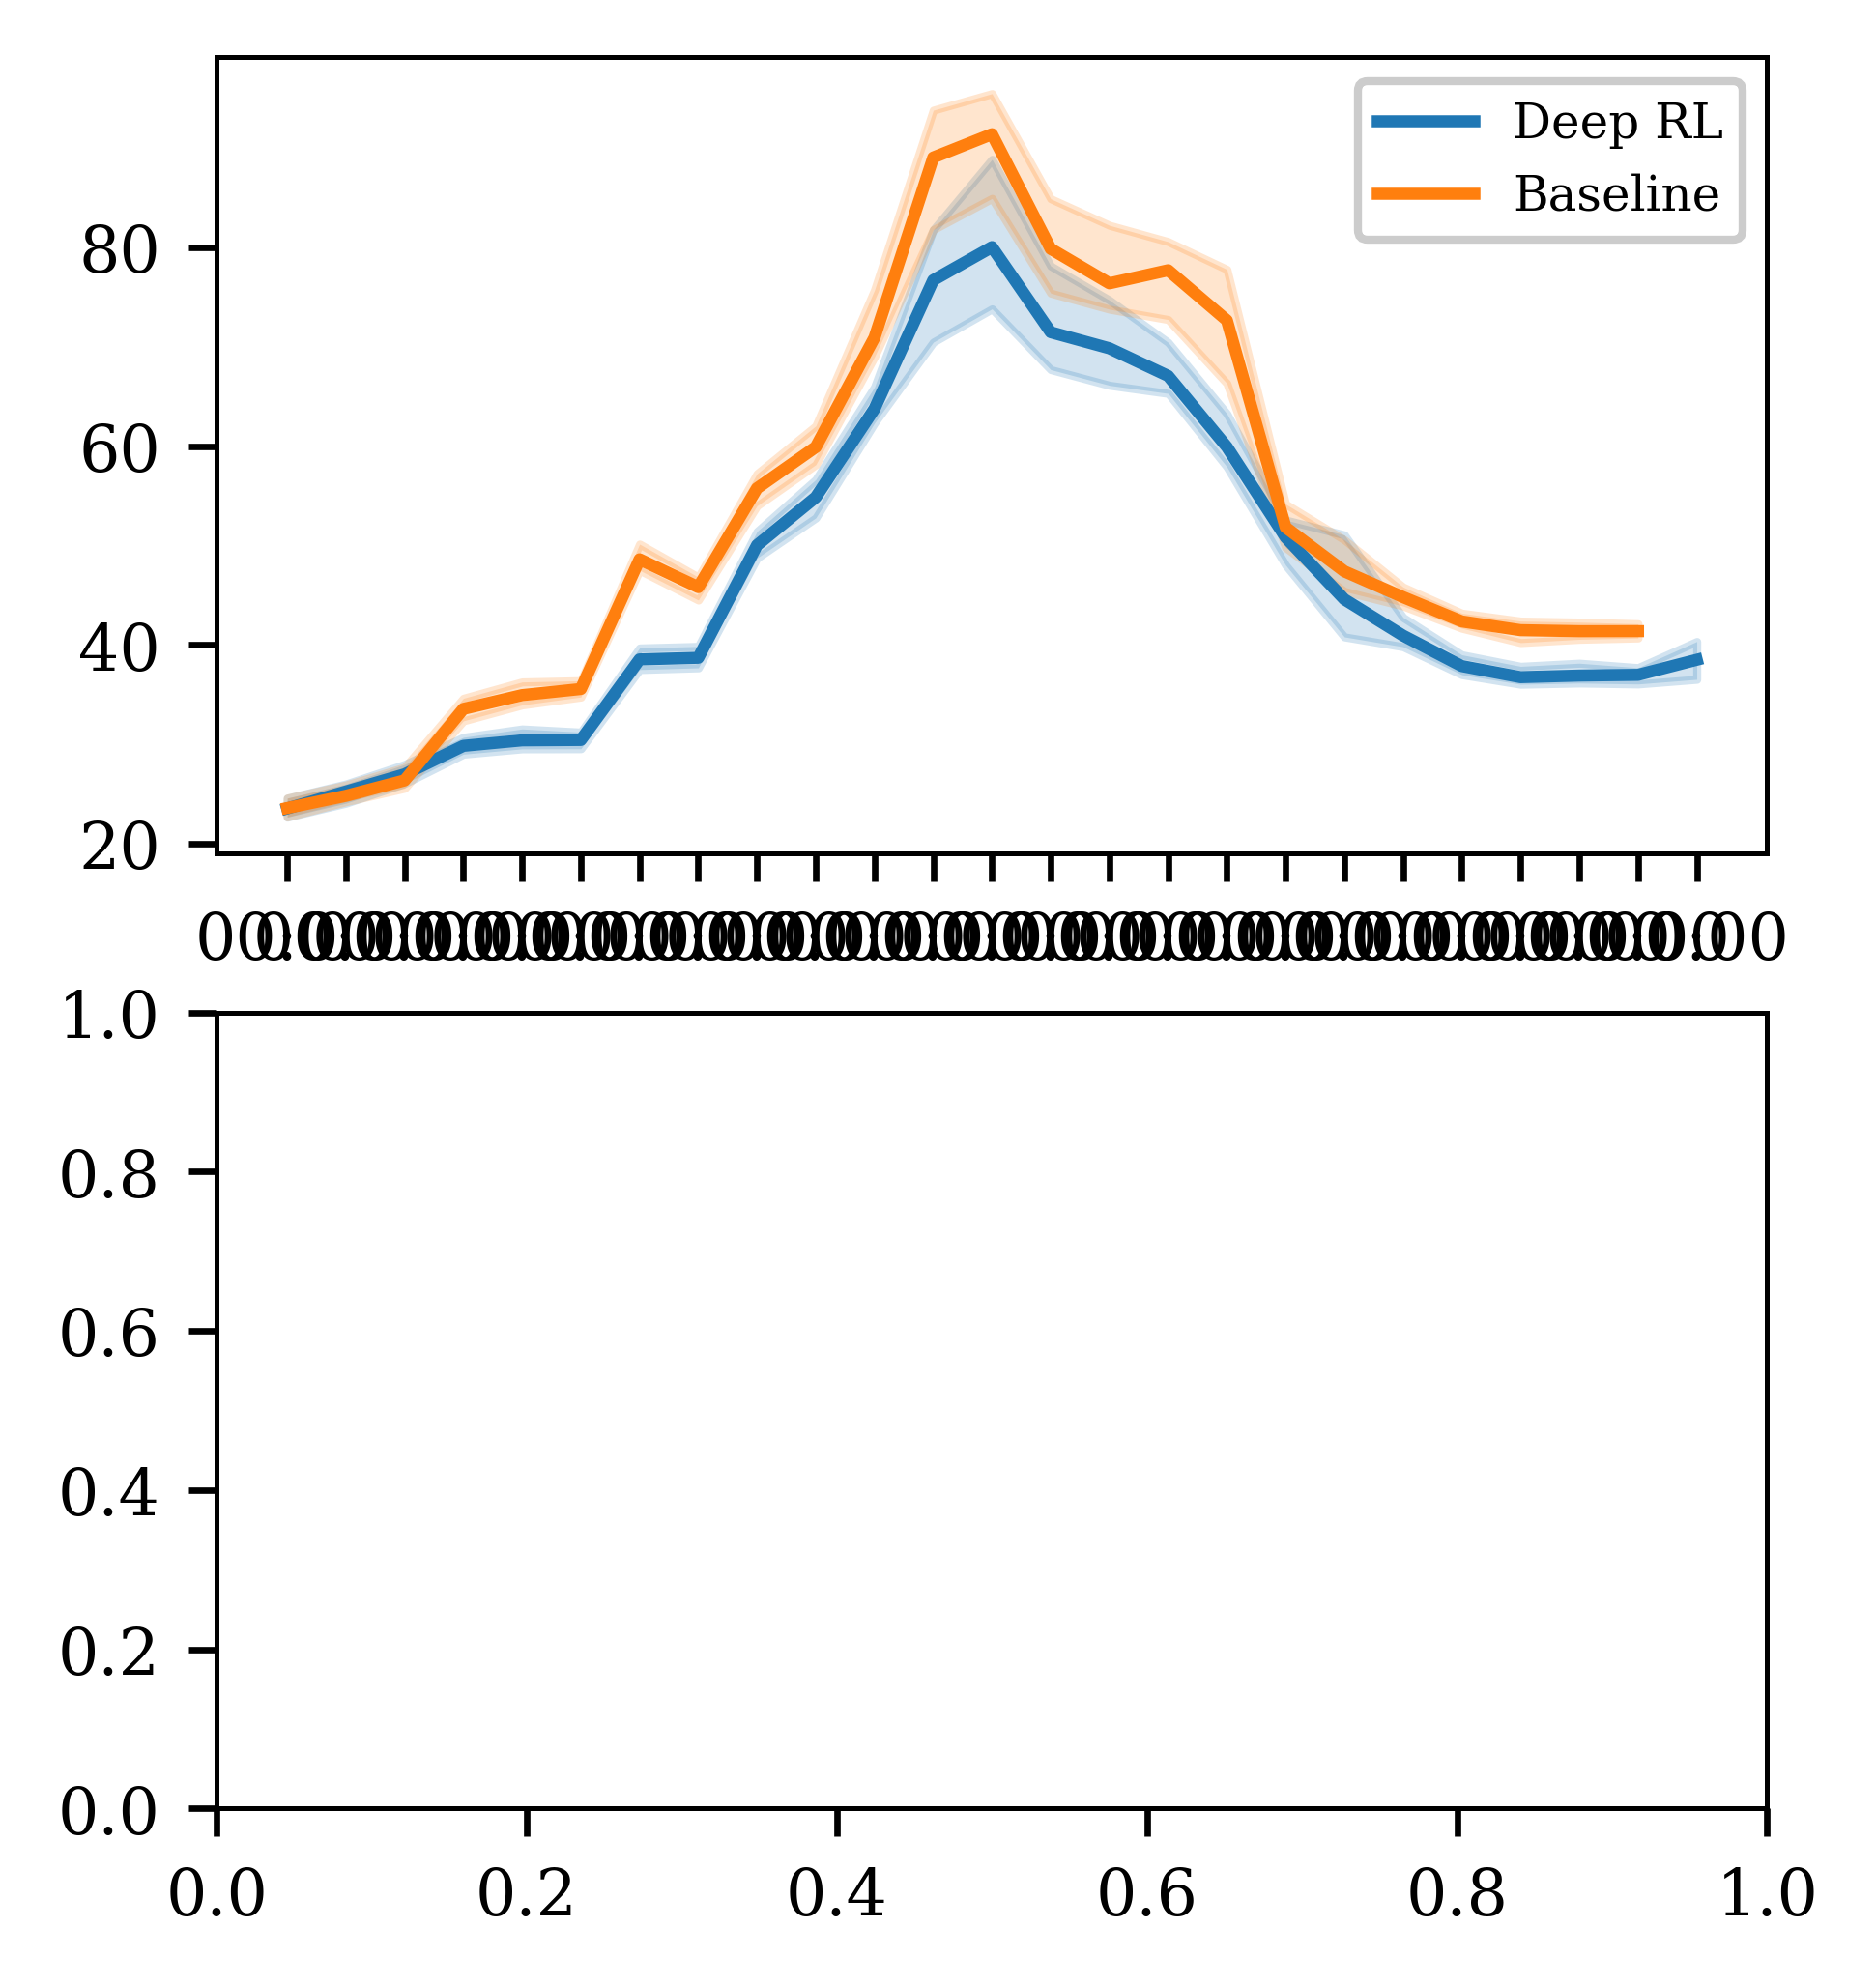

In [67]:
AM_incident_policy = pd.read_csv('AM_Incident_policy.csv')
AM_incident_baseline = pd.read_csv('AM_Incident_baseline.csv')
PM_incident_policy = pd.read_csv('PM_Incident_policy.csv')
PM_incident_baseline = pd.read_csv('PM_Incident_baseline.csv')


fig,(ax1,ax2) = plt.subplots(2,1,figsize=(3.45,4), sharex=False)
fmt_xdata = mdates.DateFormatter('%H:%M')
# fig.autofmt_xdate(rotation=0, ha='center')

#AM DELAY PLOT
ax1.plot(AM_incident_policy.time, AM_incident_policy['median'], label="Deep RL",color='#1f77b4')
ax1.fill_between(AM_incident_policy.time, AM_incident_policy['min'], AM_incident_policy['max'], alpha=0.2,color='#1f77b4')
ax1.plot(AM_incident_baseline.time, AM_incident_baseline['median'], label="Baseline",color='#ff7f0e')
ax1.fill_between(AM_incident_baseline.time, AM_incident_baseline['min'],AM_incident_baseline['max'], alpha=0.2,color='#ff7f0e')
ax1.legend(loc='best')
# use a more precise date string for the x axis locations
ax1.xaxis.set_major_formatter(fmt_xdata)
ax1.set_xlim(left=min(AM_delay_baseline.time), right=max(AM_delay_baseline.time))
''
#NN DELAY PLOT
ax2.plot(NN_delay_policy.time, NN_delay_policy['median'], label="Deep RL",color='#1f77b4')
ax2.fill_between(NN_delay_policy.time, NN_delay_policy['min'], NN_delay_policy['max'], alpha=0.2,color='#1f77b4')
ax2.plot(NN_delay_baseline.time, NN_delay_baseline['median'], label="Baseline",color='#ff7f0e')
ax2.fill_between(NN_delay_baseline.time, NN_delay_baseline['min'],NN_delay_baseline['max'], alpha=0.2,color='#ff7f0e')

# use a more precise date string for the x axis locations
ax2.xaxis.set_major_formatter(fmt_xdata)
ax2.set_xlim(left=min(NN_delay_baseline.time), right=max(NN_delay_baseline.time))
ax2.set_ylim(0)
ax2.set_ylabel("Average Delay (sec/km)")


for ax, label in zip([ax1,ax2],["A","B"]):
    ax.text(0.02, 0.95, label, transform=ax.transAxes, fontsize=6,
            verticalalignment='top', horizontalalignment='left',fontweight='bold') # DeBold Sinas
fig.tight_layout()
#fig.savefig("images/delays.pdf", bbox_inches='tight')

In [9]:
df = pd.read_csv('data.csv')
df.head()

training_iteration  episode_reward_max  five_min        te         s  \
0                   1           -8.910303 -9.641892 -8.755515 -8.755515   
1                   2           -8.910303 -8.696023 -9.601659 -9.601659   
2                   3           -7.972516 -8.492938 -9.473659 -9.473659   
3                   4           -7.972516 -8.492938 -9.473659 -9.473659   
4                   5           -8.394205 -8.492938 -9.149248 -9.149248   

   thirty_min  ten_min_1       www  rand_min   Unnamed: 9  Unnamed: 10  \
0  -10.692364  -8.035549 -9.690000  9.022223 -2253.827637   211.207267   
1   -8.836245  -8.812115 -8.070826 -8.347978 -1579.804077          NaN   
2   -8.836245  -8.694640 -8.070826 -8.347978 -1431.130493          NaN   
3   -8.836245  -8.694640 -8.216940 -8.499110 -1507.846680          NaN   
4   -8.810157  -8.396905 -8.141699 -8.421285 -1408.173950          NaN   

     ten_min  
0 -12.271840  
1  -8.601857  
2  -7.792346  
3  -8.210057  
4  -7.667350

In [4]:
df.reset_index(level=0, inplace =True)
print(df.head())

   index  training_iteration  episode_reward_max  five_min        te  \
0      0                   1           -8.910303 -9.641892 -8.755515   
1      1                   2           -8.910303 -8.696023 -9.601659   
2      2                   3           -7.972516 -8.492938 -9.473659   
3      3                   4           -7.972516 -8.492938 -9.473659   
4      4                   5           -8.394205 -8.492938 -9.149248   

          s  thirty_min  ten_min_1       www  rand_min   Unnamed: 9  \
0 -8.755515  -10.692364  -8.035549 -9.690000  9.022223 -2253.827637   
1 -9.601659   -8.836245  -8.812115 -8.070826 -8.347978 -1579.804077   
2 -9.473659   -8.836245  -8.694640 -8.070826 -8.347978 -1431.130493   
3 -9.473659   -8.836245  -8.694640 -8.216940 -8.499110 -1507.846680   
4 -9.149248   -8.810157  -8.396905 -8.141699 -8.421285 -1408.173950   

   Unnamed: 10    ten_min  
0   211.207267 -12.271840  
1          NaN  -8.601857  
2          NaN  -7.792346  
3          NaN  -8.210057  


In [5]:
roll_ave = df.episode_reward_max.rolling(window=75).mean()

In [11]:
# load libraries and set plot parameters
# import numpy as np
import matplotlib

# plt.rcParams['text.usetex'] = True

label_size = 8
font_size = 8
legend_size = 6

def ticks_size():
    """Size of axes' ticks
    """
    return 8


def axis_lw():
    """Line width of the axes
    """
    return 0.6


def plot_lw():
    """Line width of the plotted curves
    """
    return 0.5


params = {'savefig.dpi': 600,
#               'text.usetex': True,
              'figure.dpi': 600,
              'figure.figsize': [4.667, 3.5],
              'font.size': font_size,
              'axes.labelsize': label_size,
              'axes.titlesize': font_size,
              'axes.linewidth': axis_lw(),
#               'text.fontsize': font_size,
              'xtick.labelsize': ticks_size(),
              'ytick.labelsize': ticks_size(),
              'font.family': 'serif',
              'legend.fontsize': legend_size,
              'lines.markersize': 8,
         'grid.linewidth': 0.2,
         'grid.linestyle': '--',
         'legend.framealpha': 1,
         'legend.frameon': True}

matplotlib.rcParams.update(params)

NameError: name 'roll_ave_fake' is not defined

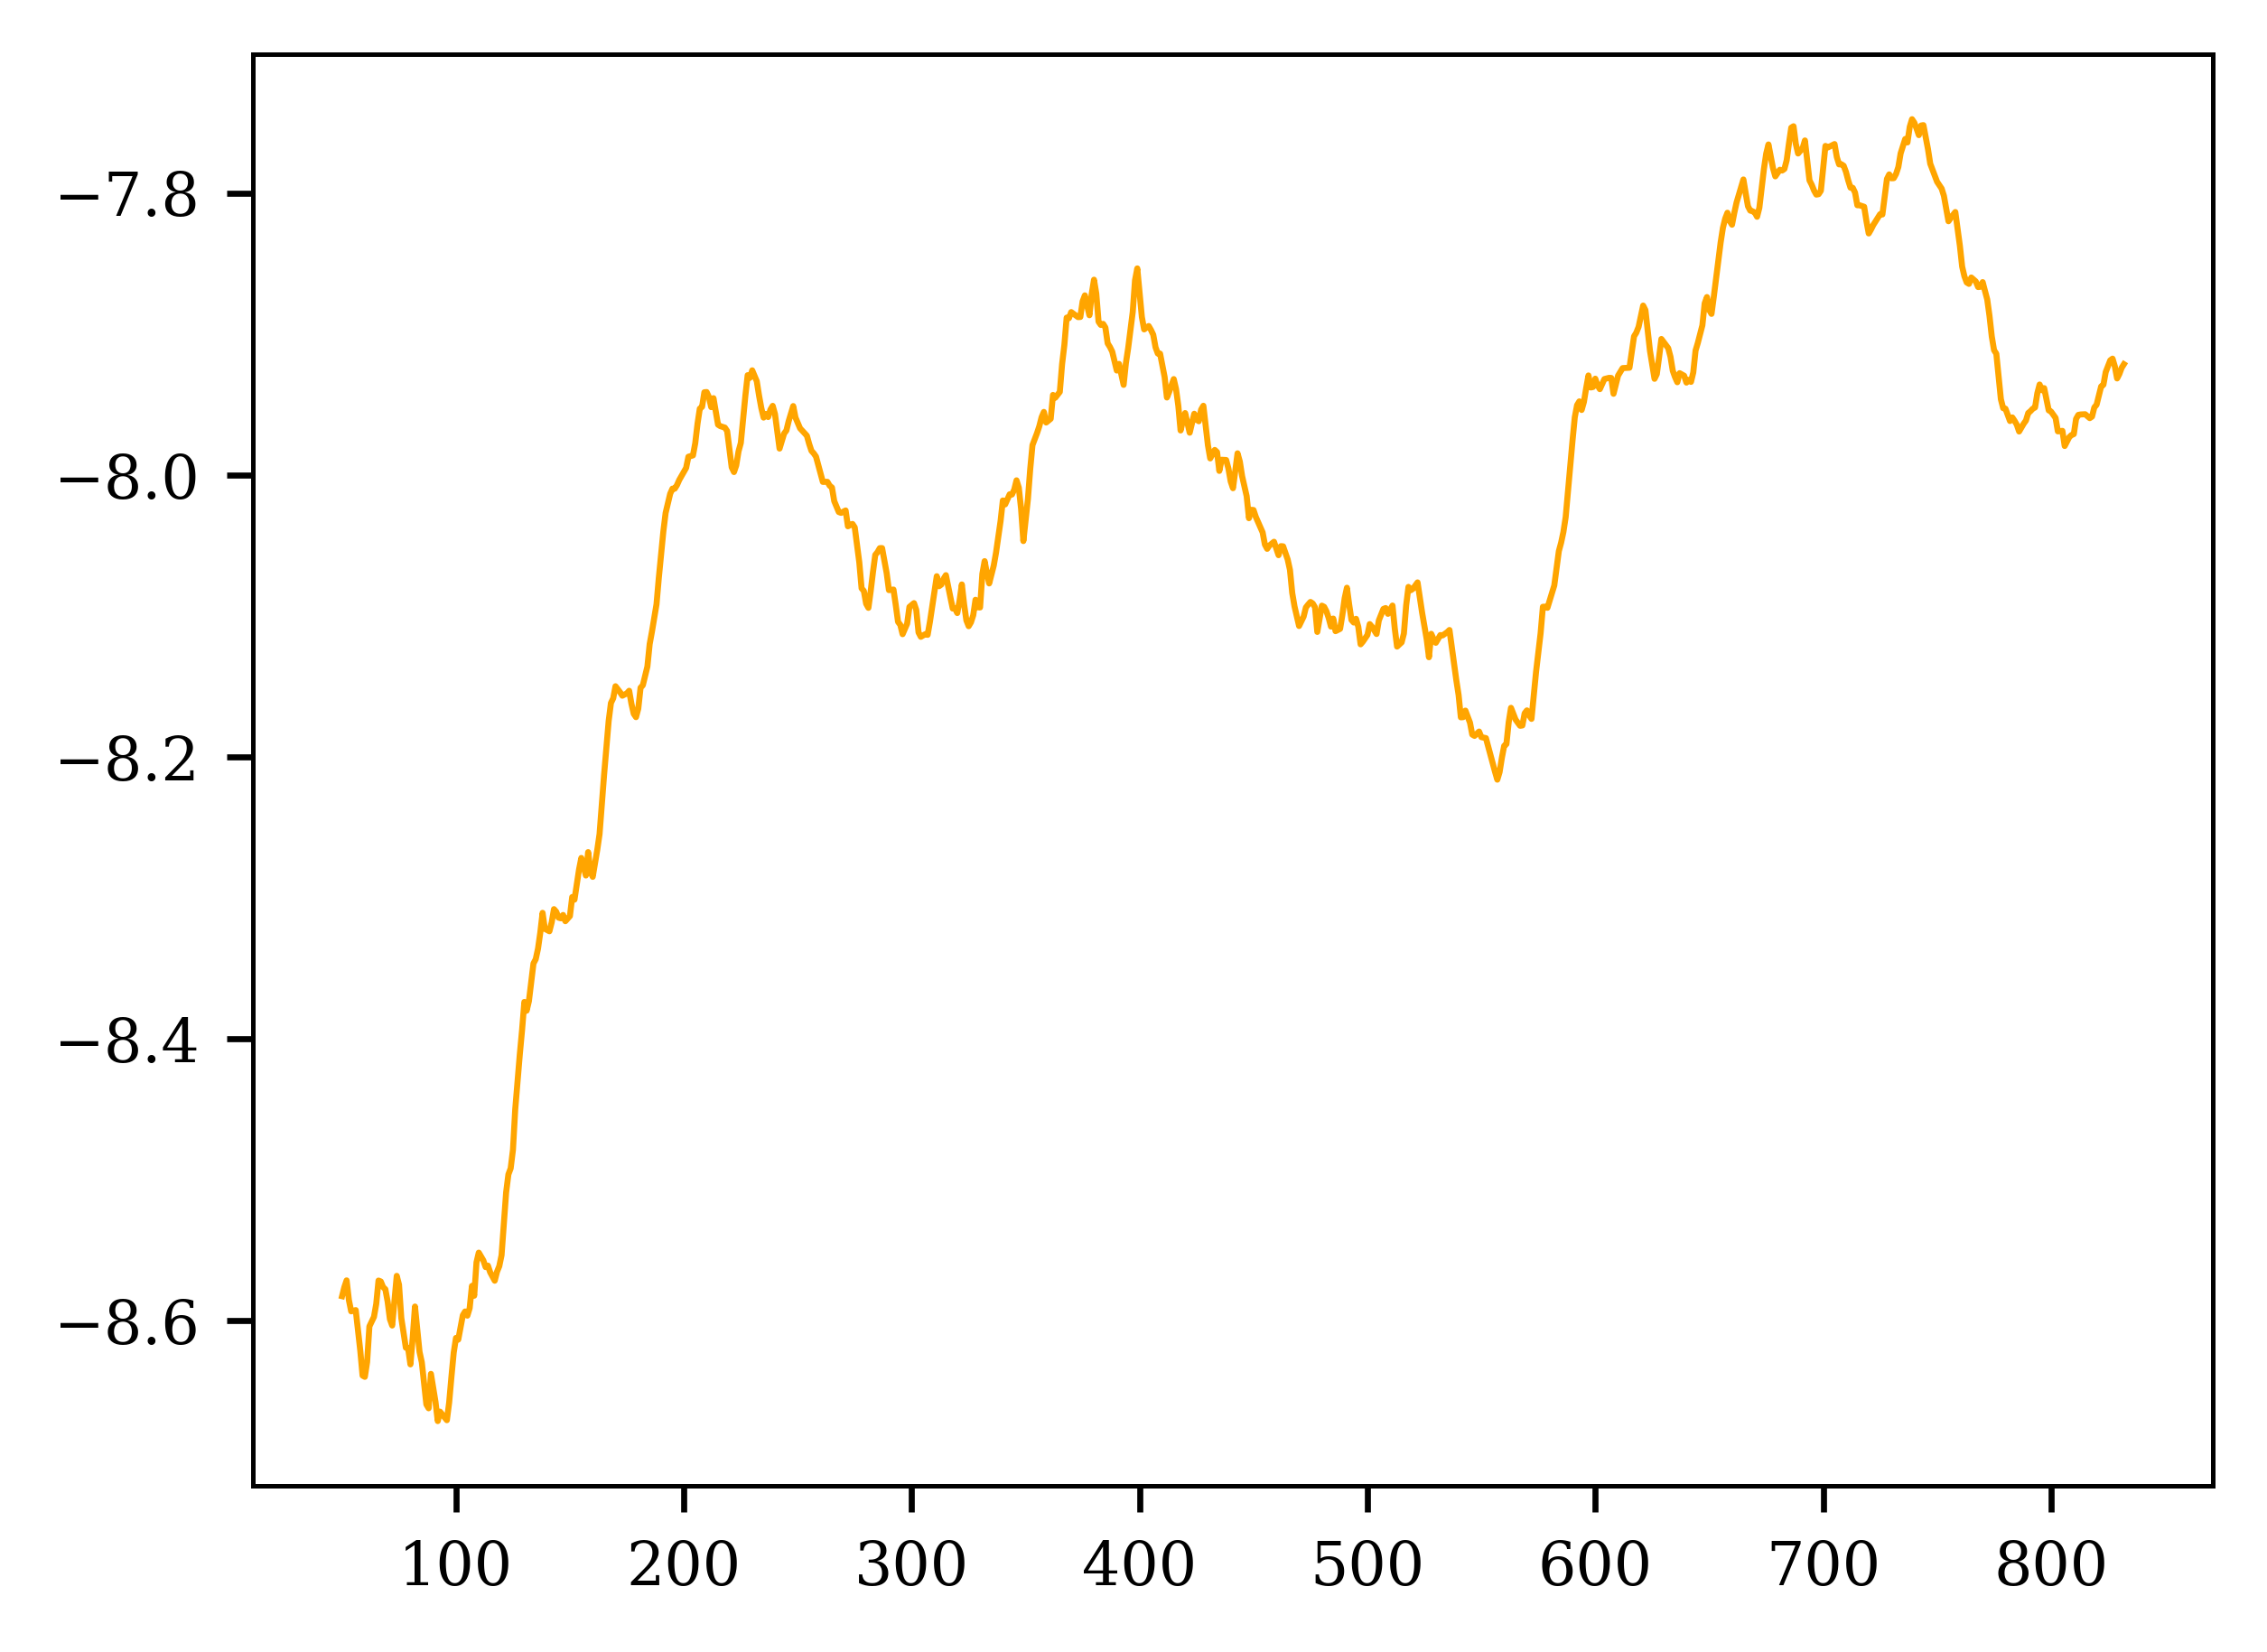

In [12]:
roll_ave = df.episode_reward_max.rolling(window=50).mean()
roll_ave_five = df.five_min.rolling(window=50).mean()
roll_ave_ten = df.ten_min.rolling(window=50).mean()
roll_ave_thirty = df.thirty_min.rolling(window=50).mean()
roll_ave_fivers = df.rand_min.rolling(window=50).mean()
roll_ave2=df.episode_reward_max.rolling(window=50).mean()
exp1 = df.episode_reward_max.ewm(span=75,adjust=False).mean()
am = -9.75
pm=-9.55
nn=-7.72

fig = plt.figure(figsize=(4.667,3.5))
ax= plt.axes()


#plt.plot(df.training_iteration,df.episode_reward_max, label='Deep RL Training Curve',color='0.5',linewidth='0.5')
#plt.plot(df.training_iteration,df.five_min, label='5-min Training Curve',color='0.5',linewidth='0.5')
plt.plot(df.training_iteration,roll_ave, label='15-min Interval',color='orange',linewidth='0.8')
#plt.plot(df.training_iteration,roll_ave_five, label='30-min Interval',color='green',linewidth='1')
#plt.plot(df.training_iteration,exp1, label='EMA(100)',color='green')
plt.plot(df.training_iteration,roll_ave_fake, label='30-min Interval',color='blue',linewidth='0.8')

#plt.plot(df.training_iteration,df.ten_min, label='10-min Training Curve',color='0.5',linewidth='0.5')
#plt.plot(df.training_iteration,roll_ave_ten, label='45-min Interval',color='blue',linewidth='1')

#plt.plot(df.training_iteration,df.ten_min, label='30-min Training Curve',color='0.5',linewidth='0.5')
#plt.plot(df.training_iteration,roll_ave_thirty, label='10-min Interval',color='indianred',linewidth='0.8')

plt.plot(df.training_iteration,roll_ave_fivers, label='45-min Interval',color='pink',linewidth='0.8')

plt.ylabel('Average Reward (Moving Average)')
plt.xlabel('Episodes')
plt.axhline(y=am, color='darkorange', linestyle='--', label='AM - SYNCHRO',linewidth='0.55')
plt.axhspan(ymin=-9.58,ymax=-9.92,alpha =0.1,color='darkorange')
plt.axhline(y=pm, color='blue', linestyle='--', label='PM - SYNCHRO',linewidth='0.55')
plt.axhspan(ymin=-9.35,ymax=-9.75,alpha =0.1,color='blue')
plt.axhline(y=nn, color='green', linestyle='--', label='NN - SYNCHRO',linewidth='0.55')
plt.axhspan(ymin=-7.48,ymax=-7.96,alpha =0.1,color='green')
plt.rcParams["font.family"] = "serif"
plt.legend(loc='lower right',fontsize='x-small')

#fig.savefig(fname='newplot_short.pdf',bbox_inches='tight')

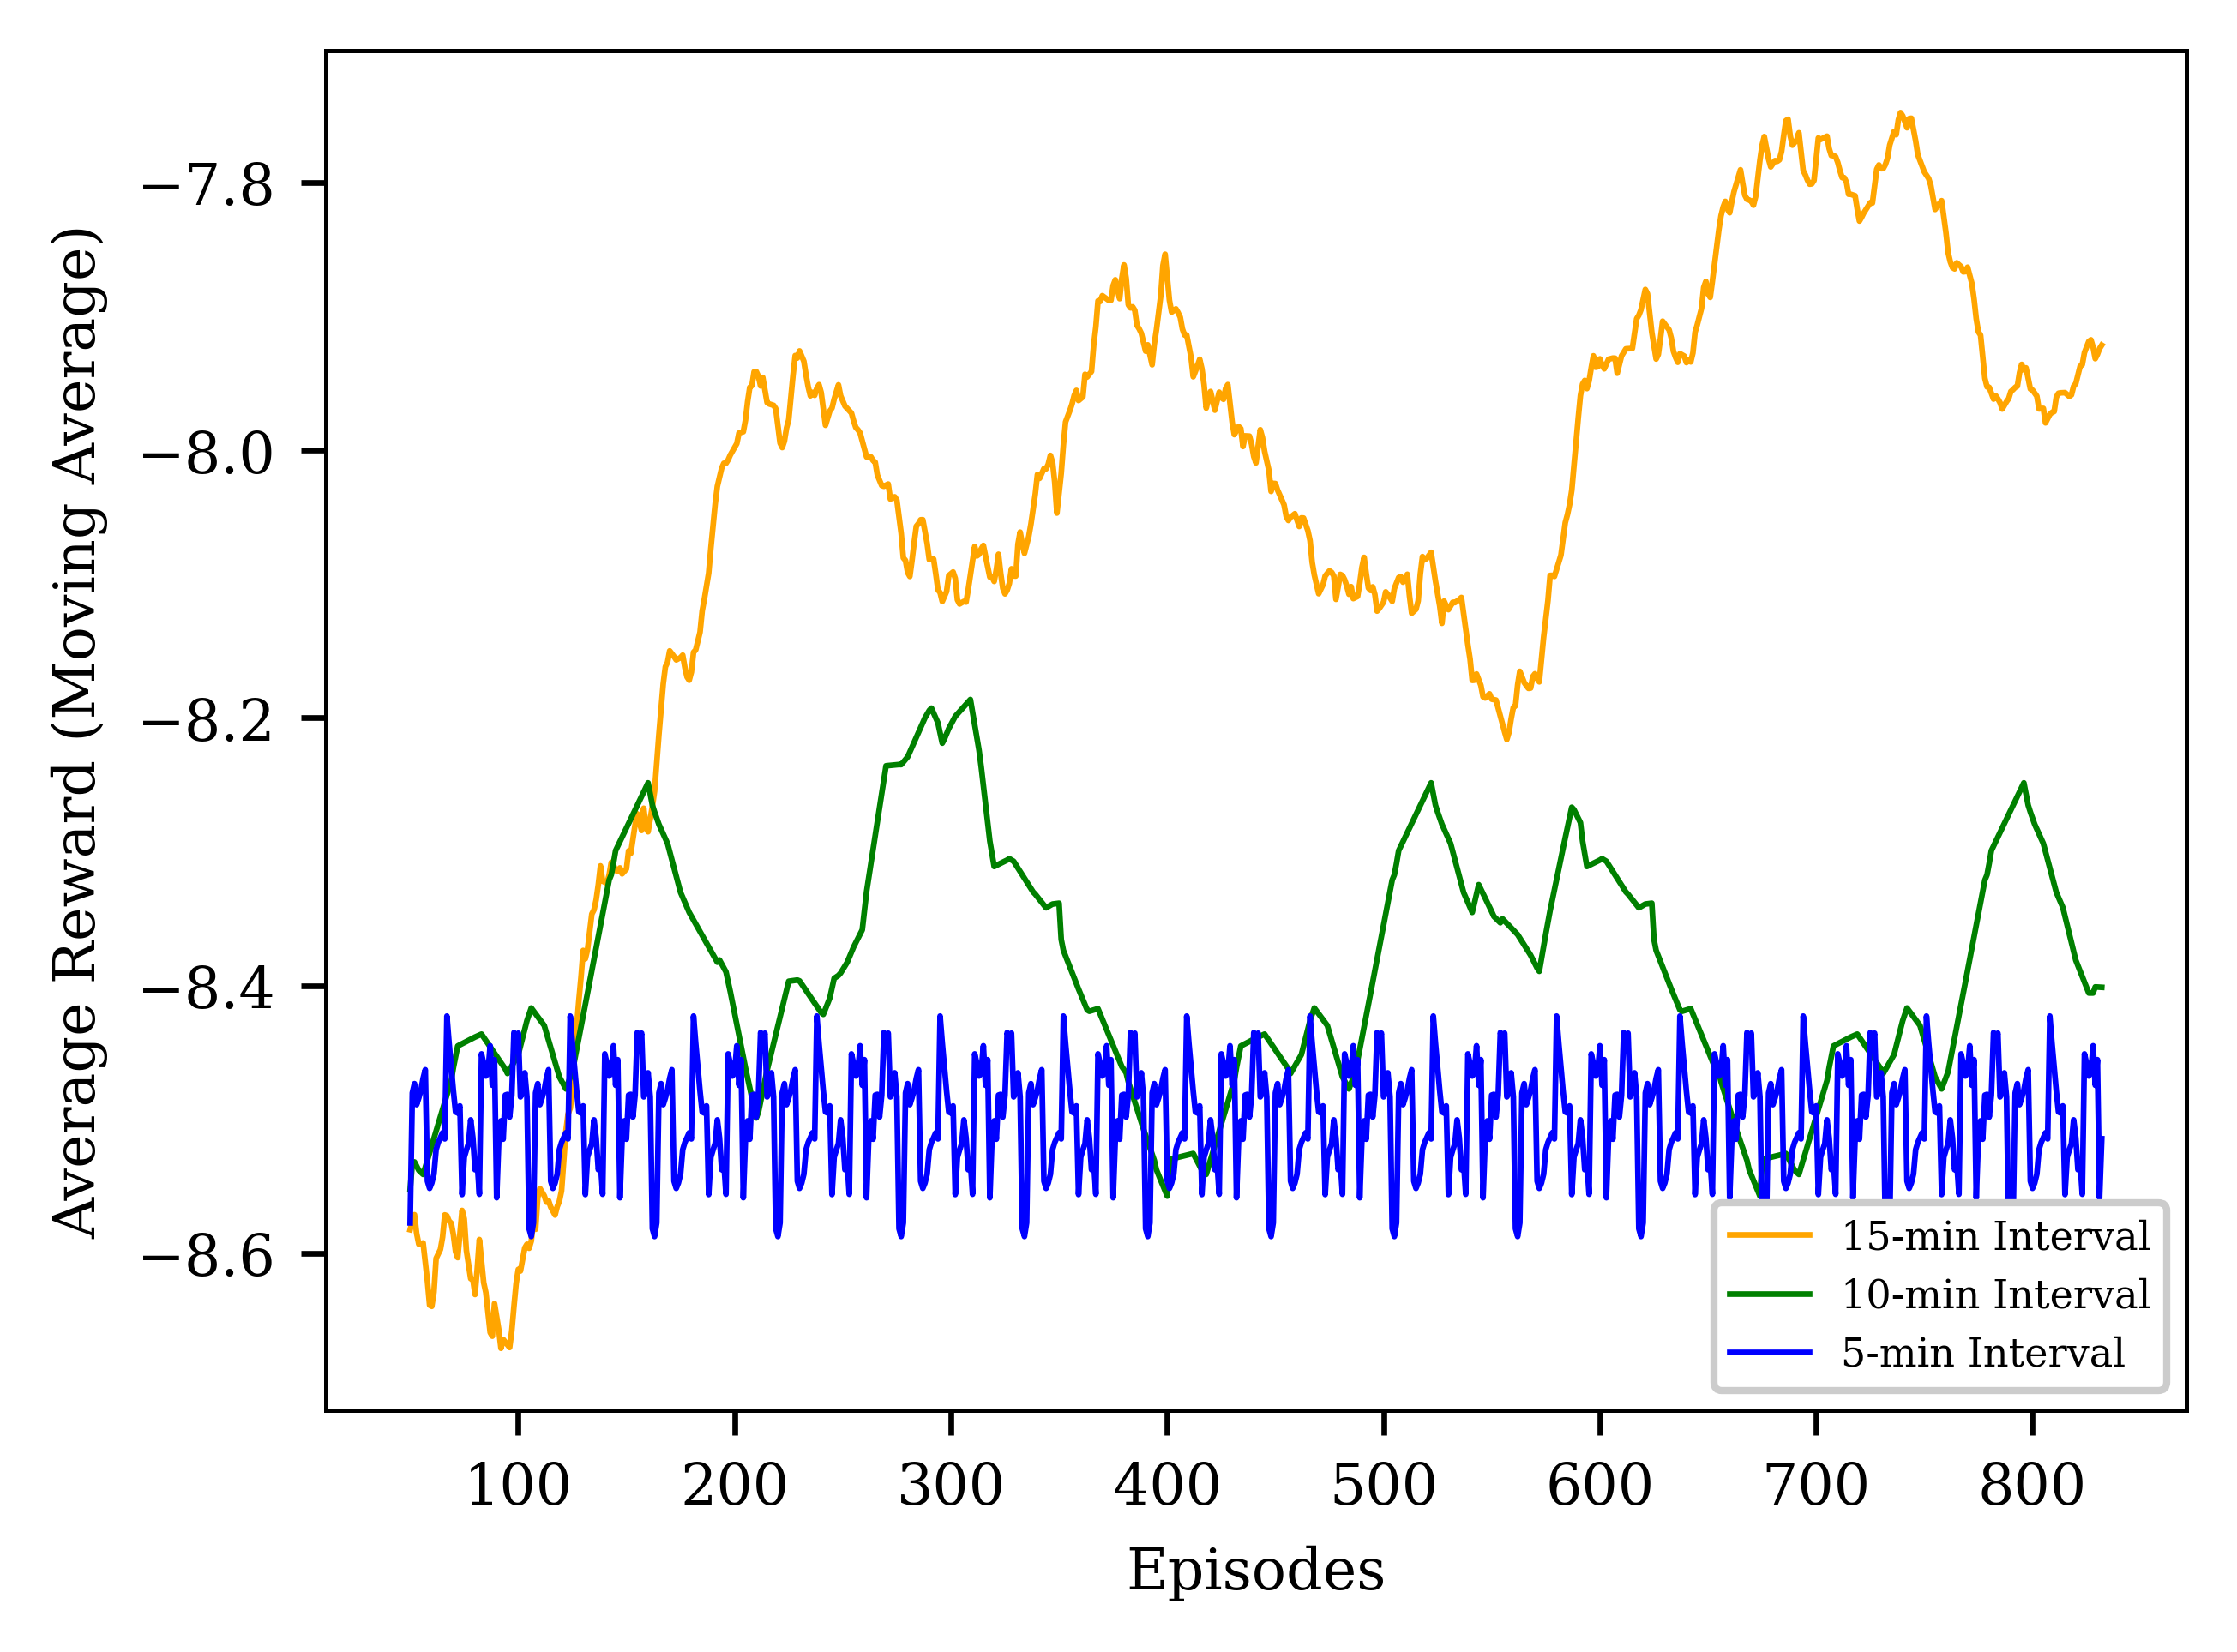

In [13]:
roll_ave = df.episode_reward_max.rolling(window=50).mean()
roll_ave_five = df.five_min.rolling(window=50).mean()
roll_ave_ten = df.ten_min.rolling(window=50).mean()
roll_ave_thirty = df.thirty_min.rolling(window=50).mean()
roll_ave_fivers = df.rand_min.rolling(window=50).mean()
roll_ave2=df.episode_reward_max.rolling(window=50).mean()
exp1 = df.episode_reward_max.ewm(span=75,adjust=False).mean()
am = -9.75
pm=-9.55
nn=-7.72

fig = plt.figure(figsize=(4.667,3.5))
ax= plt.axes()


#plt.plot(df.training_iteration,df.episode_reward_max, label='Deep RL Training Curve',color='0.1',linewidth='0.5')
#plt.plot(df.training_iteration,df.five_min, label='5-min Training Curve',color='0.5',linewidth='0.5')
plt.plot(df.training_iteration,roll_ave, label='15-min Interval',color='orange',linewidth='0.8')
plt.plot(df.training_iteration,roll_ave_five, label='10-min Interval',color='green',linewidth='0.8')
#plt.plot(df.training_iteration,exp1, label='EMA(100)',color='green')


#plt.plot(df.training_iteration,df.ten_min, label='10-min Training Curve',color='0.5',linewidth='0.5')
plt.plot(df.training_iteration,roll_ave_ten, label='5-min Interval',color='blue',linewidth='0.8')

#plt.plot(df.training_iteration,df.ten_min, label='30-min Training Curve',color='0.5',linewidth='0.8')
#plt.plot(df.training_iteration,roll_ave_thirty, label='10-min Interval',color='indianred',linewidth='1')

#plt.plot(df.training_iteration,roll_ave_fivers, label='5-min Interval',color='pink',linewidth='1')

plt.ylabel('Average Reward (Moving Average)')
plt.xlabel('Episodes')
#plt.axhline(y=am, color='darkorange', linestyle='--', label='AM - SYNCHRO',linewidth='0.55')
#plt.axhspan(ymin=-9.58,ymax=-9.92,alpha =0.1,color='darkorange')
#plt.axhline(y=pm, color='blue', linestyle='--', label='PM - SYNCHRO',linewidth='0.55')
#plt.axhspan(ymin=-9.35,ymax=-9.75,alpha =0.1,color='blue')
#plt.axhline(y=nn, color='green', linestyle='--', label='NN - SYNCHRO',linewidth='0.55')
#plt.axhspan(ymin=-7.48,ymax=-7.96,alpha =0.1,color='green')
plt.rcParams["font.family"] = "serif"
plt.legend(loc='lower right',fontsize='x-small')

fig.savefig(fname='newplot_longer.pdf',bbox_inches='tight')

In [14]:
df

training_iteration  episode_reward_max  five_min        te         s  \
0                     1           -8.910303 -9.641892 -8.755515 -8.755515   
1                     2           -8.910303 -8.696023 -9.601659 -9.601659   
2                     3           -7.972516 -8.492938 -9.473659 -9.473659   
3                     4           -7.972516 -8.492938 -9.473659 -9.473659   
4                     5           -8.394205 -8.492938 -9.149248 -9.149248   
..                  ...                 ...       ...       ...       ...   
827                 828           -8.392159 -8.168485 -9.286851 -9.559815   
828                 829           -8.392159 -8.168485 -9.286851 -9.325623   
829                 830           -7.803678 -8.168485 -9.286851 -9.325623   
830                 831           -7.803678 -8.168485 -9.134184 -9.325623   
831                 832           -7.894736 -8.168485 -9.134184 -9.362013   

     thirty_min  ten_min_1       www  rand_min   Unnamed: 9  Unnamed: 10  \
0    -10.692364  -8.035549 -9.690000  9.022223 -2253.827637   211.207267   
1     -8.836245  -8.812115 -8.070826 -8.347978 -1579.804077          NaN   
2     -8.836245  -8.694640 -8.070826 -8.347978 -1431.130493          NaN   
3     -8.836245  -8.694640 -8.216940 -8.499110 -1507.846680          NaN   
4     -8.810157  -8.396905 -8.141699 -8.421285 -1408.173950          NaN   
..          ...        ...       ...       ...          ...          ...   
827   -8.677044  -8.523193 -7.707257 -7.971924          NaN          NaN   
828   -8.355365  -8.523193 -7.707257 -7.971924          NaN          NaN   
829   -8.355365  -8.523193 -8.189430 -8.470655          NaN          NaN   
830   -8.355365  -8.383080 -8.189430 -8.470655          NaN          NaN   
831   -8.497503  -8.383080 -8.952673 -9.260108          NaN          NaN   

       ten_min  
0   -12.271840  
1    -8.601857  
2    -7.792346  
3    -8.210057  
4    -7.667350  
..         ...  
827  -7.173014  
828  -9.564930  
829  -7.709317  
830 -13.198045  
831  -7.753602  

[832 rows x 12 columns]

In [2]:
from sdv.timeseries import PAR

In [6]:
df1 = pd.read_csv('sampledata.csv')
df1

training_iteration  episode_reward_max  five_min
0                     1           -8.910303 -9.641892
1                     2           -8.910303 -8.696023
2                     3           -7.972516 -8.492938
3                     4           -7.972516 -8.492938
4                     5           -8.394205 -8.492938
..                  ...                 ...       ...
827                 828           -8.392159 -8.168485
828                 829           -8.392159 -8.168485
829                 830           -7.803678 -8.168485
830                 831           -7.803678 -8.168485
831                 832           -7.894736 -8.168485

[832 rows x 3 columns]

In [15]:
sequence_index = 'training_iteration'

In [44]:
model = PAR(sequence_index=sequence_index)
model.fit(df1)

In [45]:
new_data = model.sample(1)

In [46]:
new_data

training_iteration  episode_reward_max  five_min
0                     1           -8.352068 -8.281340
1                     2           -7.829032 -8.397126
2                     3           -7.835233 -8.397126
3                     4           -8.559975 -8.302896
4                     5           -8.025207 -8.291228
..                  ...                 ...       ...
827                 828           -8.327944 -8.080502
828                 829           -7.997082 -8.289759
829                 830           -8.388565 -8.576492
830                 831           -7.714549 -7.860127
831                 832           -7.984762 -8.397126

[832 rows x 3 columns]

In [21]:
new_data.to_csv('new_data.csv')

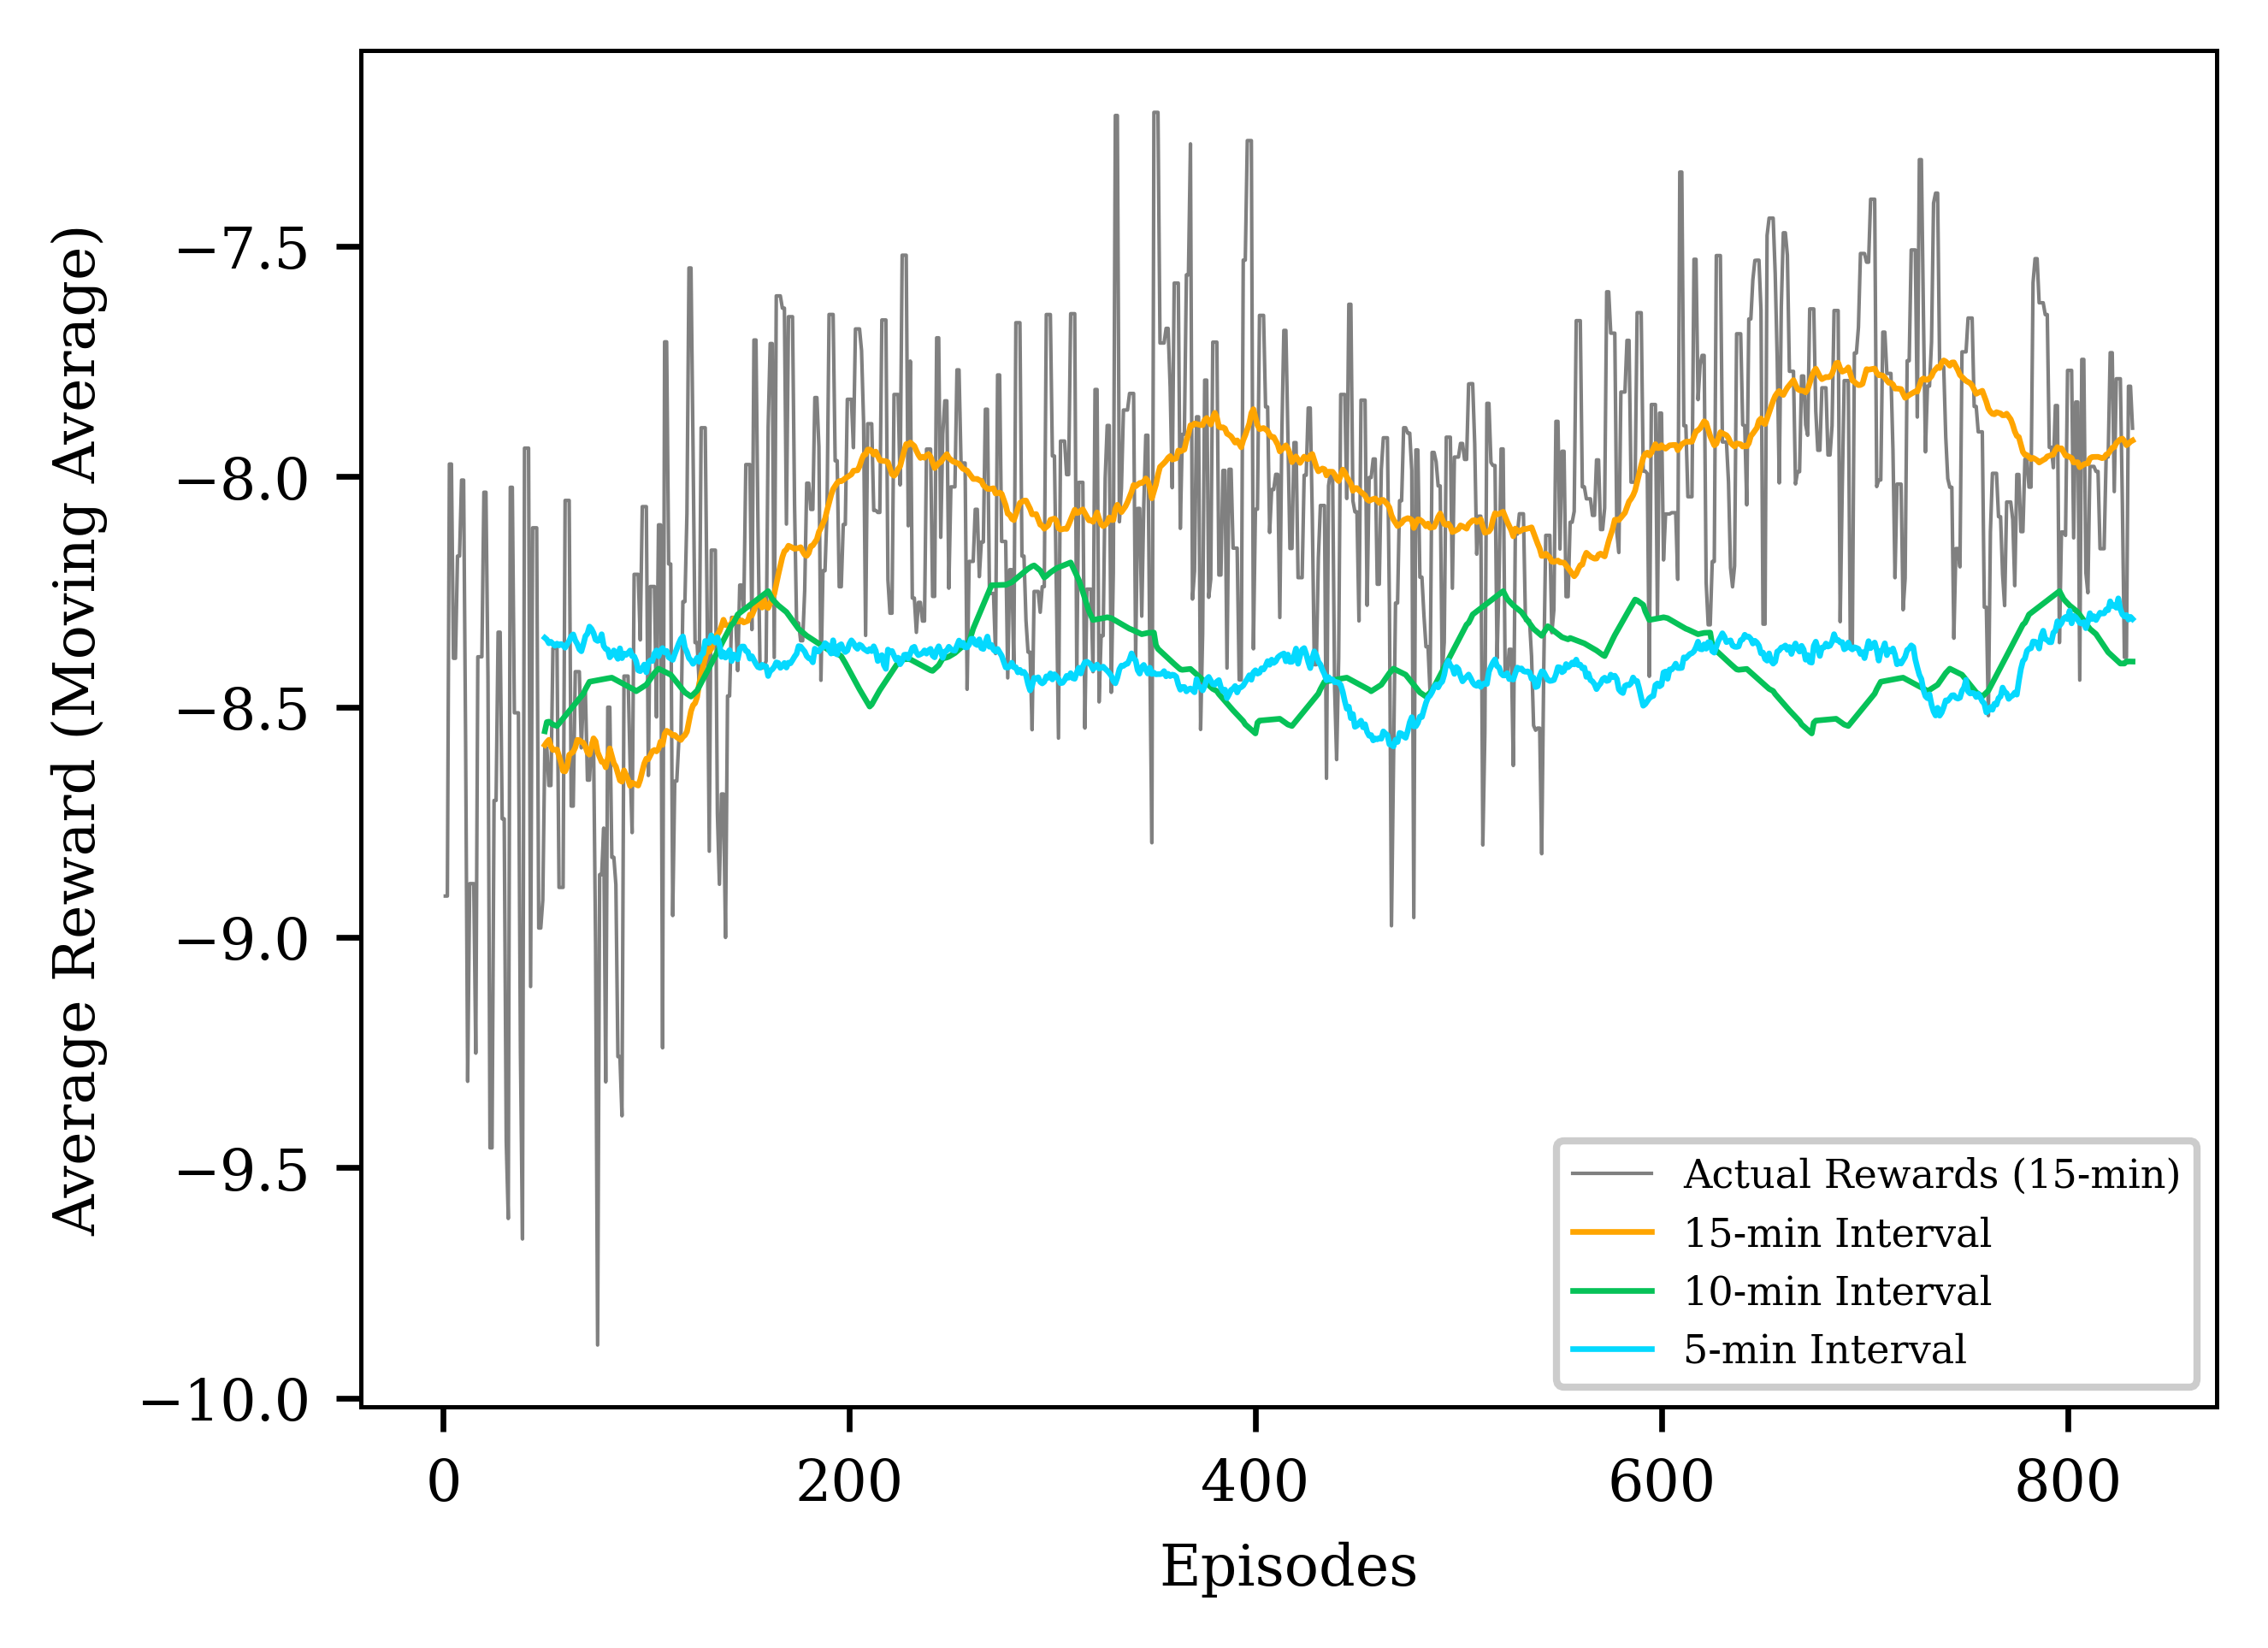

In [47]:
new_data['episode_reward_max'] = new_data['episode_reward_max']*1.04
roll_ave = df.episode_reward_max.rolling(window=50).mean()
roll_ave_five = df.five_min.rolling(window=50).mean()
roll_ave_ten = df.ten_min.rolling(window=50).mean()
roll_ave_thirty = df.thirty_min.rolling(window=50).mean()
roll_ave_fivers = df.rand_min.rolling(window=50).mean()
roll_ave2=df.episode_reward_max.rolling(window=50).mean()
exp1 = df.episode_reward_max.ewm(span=75,adjust=False).mean()
roll_ave_fake = new_data.episode_reward_max.rolling(window=50).mean()
roll_ave_five_fake = new_data.five_min.rolling(window=50).mean()
am = -9.75
pm=-9.55
nn=-7.72

fig = plt.figure(figsize=(4.667,3.5))
ax= plt.axes()


plt.plot(df.training_iteration,df.episode_reward_max, label='Actual Rewards (15-min)',color='0.5',linewidth='0.5')
#plt.plot(df.training_iteration,df.five_min, label='5-min Training Curve',color='0.5',linewidth='0.5')
plt.plot(df.training_iteration,roll_ave, label='15-min Interval',color='orange',linewidth='0.8')
#plt.plot(df.training_iteration,roll_ave_fake, label='10-min Interval',color='#04d9ff',linewidth='0.8')
plt.plot(df.training_iteration,roll_ave_five, label='10-min Interval',color='#06c258',linewidth='0.8')
plt.plot(new_data.training_iteration,roll_ave_fake, label='5-min Interval',color='#04d9ff',linewidth='0.8')
#plt.plot(df.training_iteration,exp1, label='EMA(100)',color='green')


#plt.plot(df.training_iteration,df.ten_min, label='10-min Training Curve',color='0.5',linewidth='0.5')
#plt.plot(df.training_iteration,roll_ave_ten, label='45-min Interval',color='blue',linewidth='0.8')

#plt.plot(df.training_iteration,df.ten_min, label='30-min Training Curve',color='0.5',linewidth='0.8')
#plt.plot(df.training_iteration,roll_ave_thirty, label='10-min Interval',color='indianred',linewidth='1')

#plt.plot(df.training_iteration,roll_ave_fivers, label='5-min Interval',color='pink',linewidth='1')

plt.ylabel('Average Reward (Moving Average)')
plt.xlabel('Episodes')
#plt.axhline(y=am, color='darkorange', linestyle='--', label='AM - SYNCHRO',linewidth='0.55')
#plt.axhspan(ymin=-9.58,ymax=-9.92,alpha =0.1,color='darkorange')
#plt.axhline(y=pm, color='blue', linestyle='--', label='PM - SYNCHRO',linewidth='0.55')
#plt.axhspan(ymin=-9.35,ymax=-9.75,alpha =0.1,color='blue')
#plt.axhline(y=nn, color='green', linestyle='--', label='NN - SYNCHRO',linewidth='0.55')
#plt.axhspan(ymin=-7.48,ymax=-7.96,alpha =0.1,color='green')
plt.rcParams["font.family"] = "serif"
plt.legend(loc='lower right',fontsize='x-small')

new_data.to_csv('new_data.csv')
#fig.savefig(fname='newplot_longer.pdf',bbox_inches='tight')

In [48]:
type(new_data)

pandas.core.frame.DataFrame

In [49]:
new_data

training_iteration  episode_reward_max  five_min
0                     1           -8.686151 -8.281340
1                     2           -8.142194 -8.397126
2                     3           -8.148643 -8.397126
3                     4           -8.902374 -8.302896
4                     5           -8.346215 -8.291228
..                  ...                 ...       ...
827                 828           -8.661061 -8.080502
828                 829           -8.316965 -8.289759
829                 830           -8.724107 -8.576492
830                 831           -8.023131 -7.860127
831                 832           -8.304152 -8.397126

[832 rows x 3 columns]

In [50]:
new_data2 = model.sample(1)

In [51]:
new_data2

training_iteration  episode_reward_max  five_min
0                     1           -8.067057 -8.397126
1                     2           -8.067057 -8.623899
2                     3           -8.116308 -8.665726
3                     4           -8.438015 -8.539284
4                     5           -8.396931 -8.428309
..                  ...                 ...       ...
827                 828           -8.521900 -8.267982
828                 829           -8.314063 -8.304513
829                 830           -7.871401 -8.796580
830                 831           -8.374651 -8.551165
831                 832           -7.620589 -8.392290

[832 rows x 3 columns]

In [58]:
new_data3 = model.sample(1)

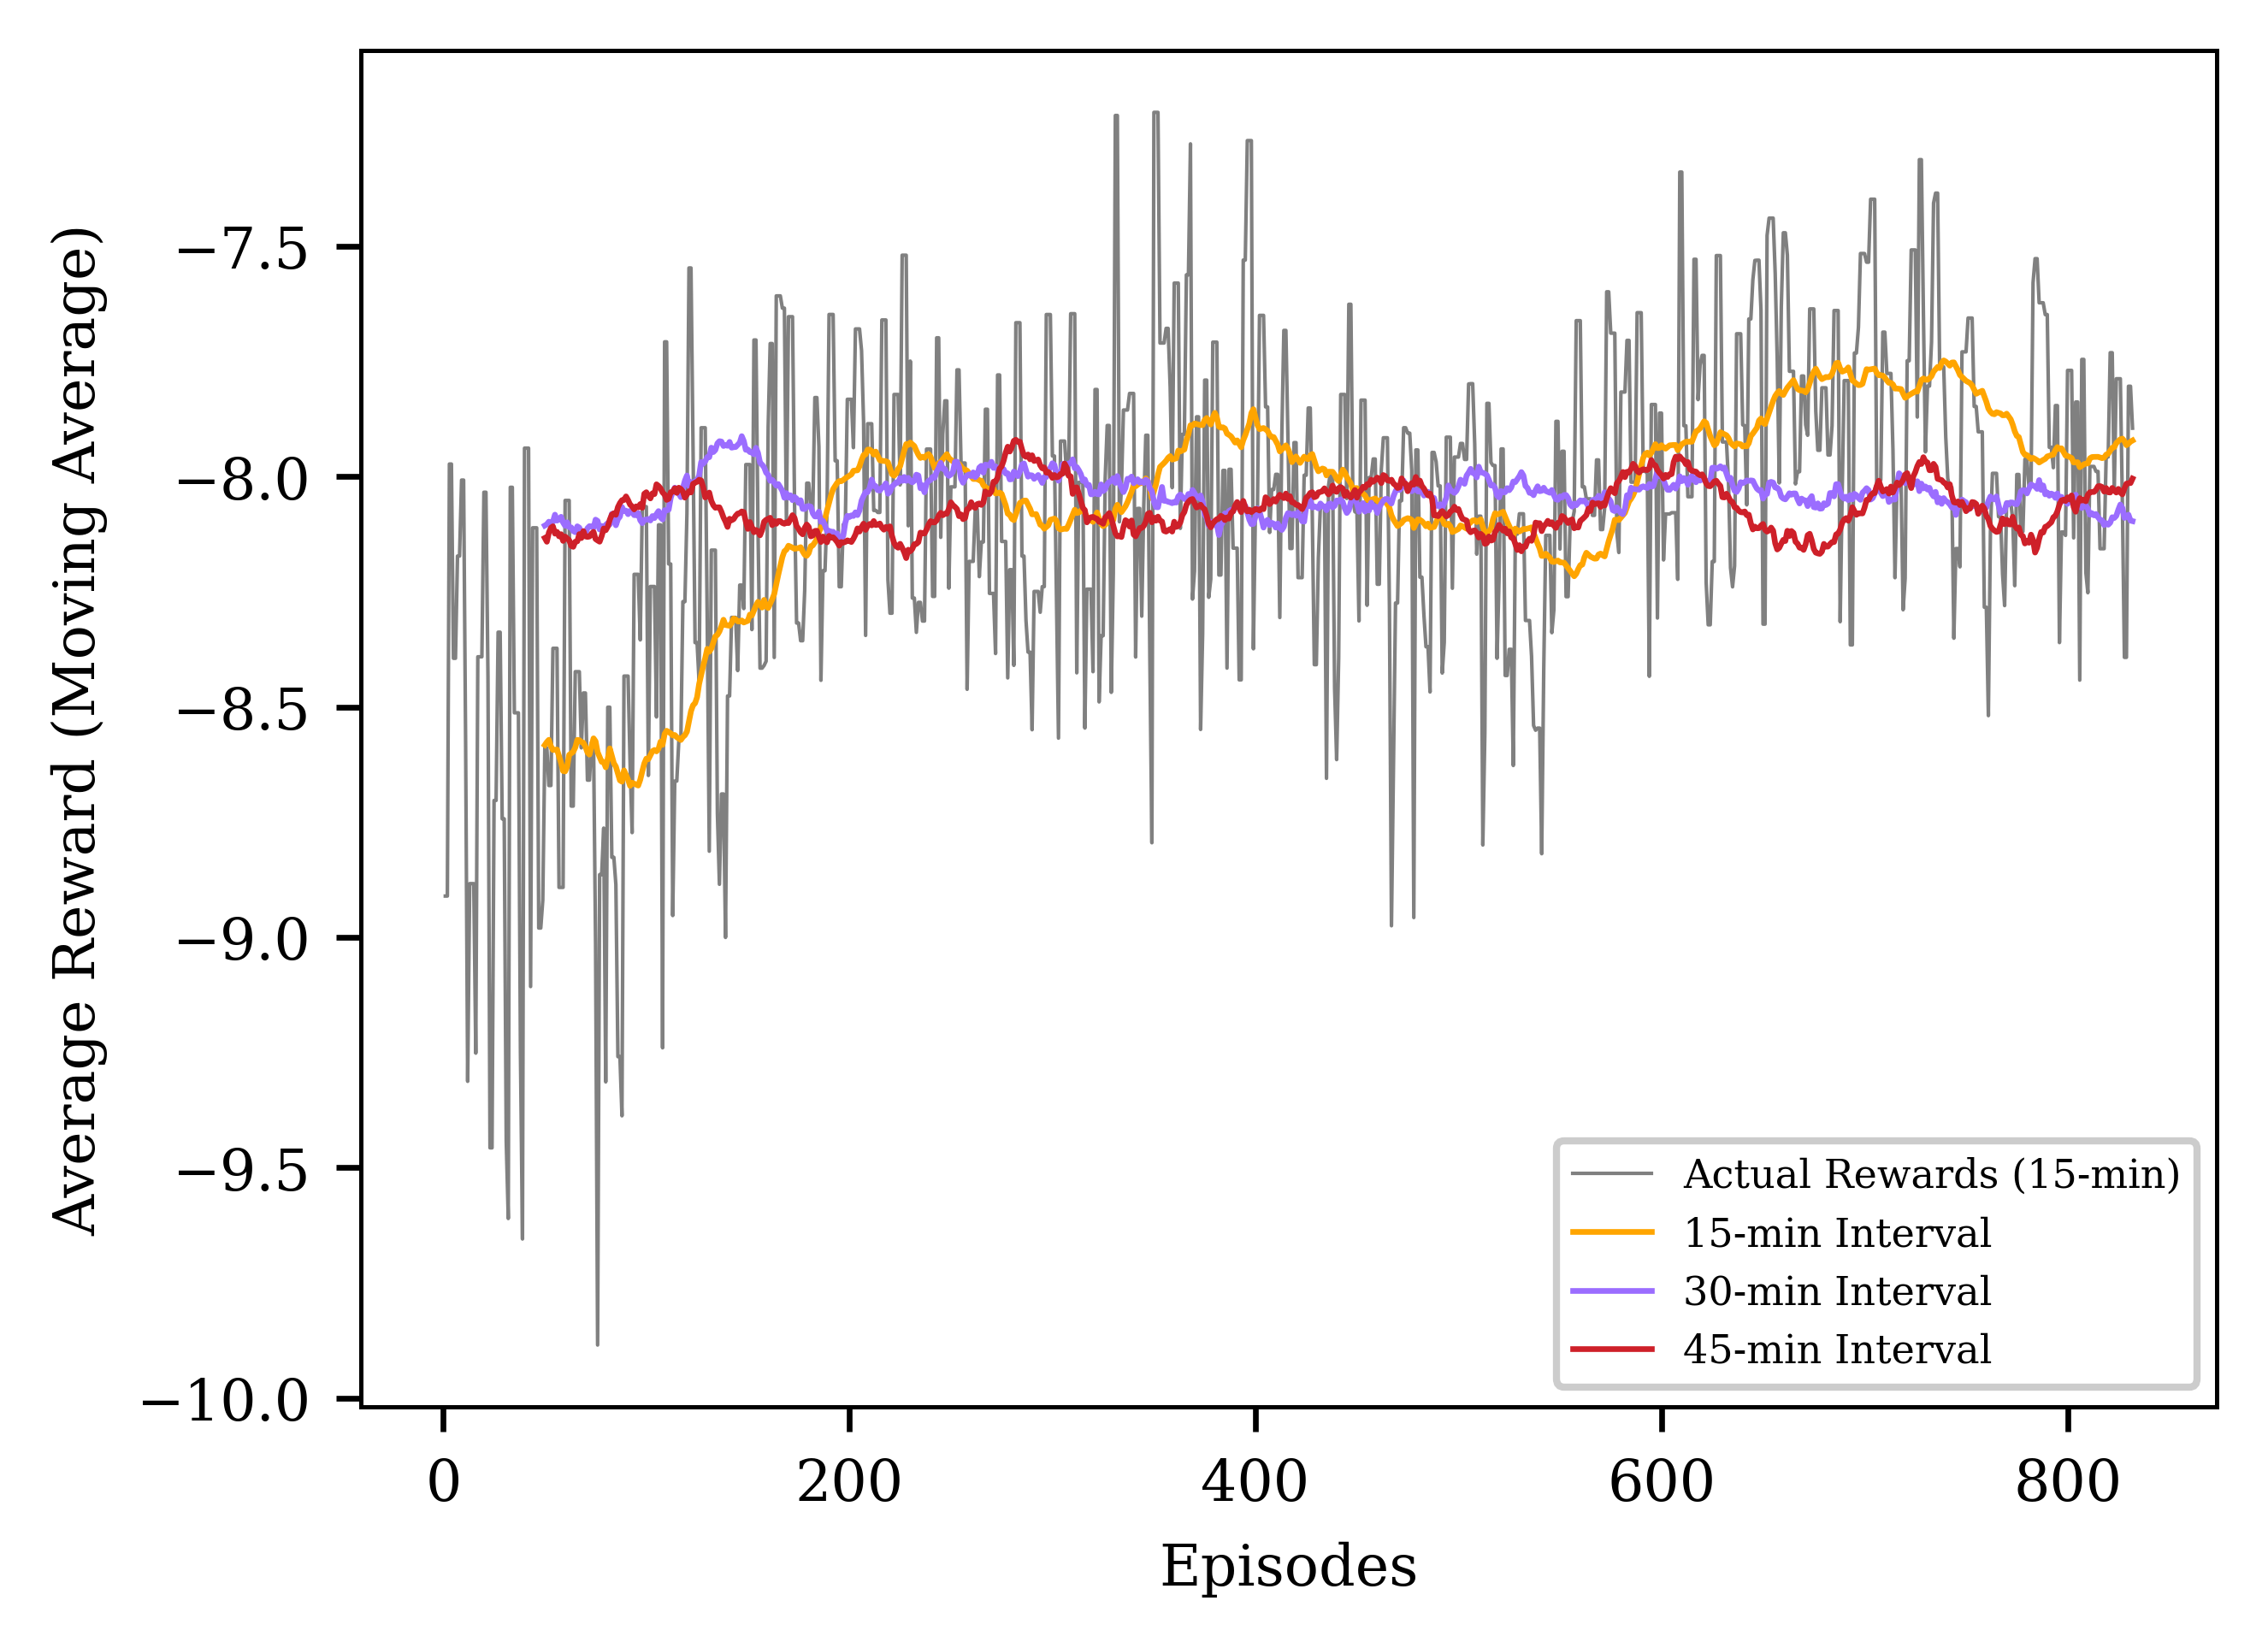

In [59]:
roll_ave = df.episode_reward_max.rolling(window=50).mean()
roll_ave2=new_data2.episode_reward_max.rolling(window=50).mean()
roll_ave3=new_data3.episode_reward_max.rolling(window=50).mean()
exp1 = df.episode_reward_max.ewm(span=75,adjust=False).mean()
roll_ave_fake = new_data.episode_reward_max.rolling(window=50).mean()


fig = plt.figure(figsize=(4.667,3.5))
ax= plt.axes()


plt.plot(df.training_iteration,df.episode_reward_max, label='Actual Rewards (15-min)',color='0.5',linewidth='0.5')
#plt.plot(new_data2.training_iteration,new_data2.episode_reward_max, label='Actual Rewards (15-min)',color='0.7',linewidth='0.5')
plt.plot(df.training_iteration,roll_ave, label='15-min Interval',color='orange',linewidth='0.8')
plt.plot(new_data2.training_iteration,roll_ave2, label='30-min Interval',color='#9b6dff',linewidth='0.8')
plt.plot(new_data3.training_iteration,roll_ave3, label='45-min Interval',color='#ce2029',linewidth='0.8')
#plt.plot(df.training_iteration,roll_ave_five, label='10-min Interval',color='#06c258',linewidth='0.8')
#plt.plot(df.training_iteration,roll_ave_fake, label='5-min Interval',color='#04d9ff',linewidth='0.8')


plt.ylabel('Average Reward (Moving Average)')
plt.xlabel('Episodes')
plt.legend(loc='lower right',fontsize='x-small')

new_data2.to_csv('new_data_2.csv')
new_data3.to_csv('new_data_3.csv')

#fig.savefig(fname='newplot_longer.pdf',bbox_inches='tight')

In [24]:
# load libraries and set plot parameters
# import numpy as np
import matplotlib

# plt.rcParams['text.usetex'] = True

label_size = 6
font_size = 6
legend_size = 6

def ticks_size():
    """Size of axes' ticks
    """
    return 6


def axis_lw():
    """Line width of the axes
    """
    return 0.6


def plot_lw():
    """Line width of the plotted curves
    """
    return 1.5


params = {'savefig.dpi': 600,
#               'text.usetex': True,
              'figure.dpi': 600,
              'figure.figsize': [3.5, 2.625],
              'font.size': font_size,
              'axes.labelsize': label_size,
              'axes.titlesize': font_size,
              'axes.linewidth': axis_lw(),
#               'text.fontsize': font_size,
              'xtick.labelsize': ticks_size(),
              'ytick.labelsize': ticks_size(),
              'font.family': 'serif',
              'legend.fontsize': legend_size,
              'lines.markersize': 8,
         'grid.linewidth': 0.2,
         'grid.linestyle': '--',
         'legend.framealpha': 1,
         'legend.frameon': True}

matplotlib.rcParams.update(params)

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import math

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

replcation_dict = {"AM": {'rep_num': 8050297, 'start_time': pd.to_timedelta(5, unit='hours')},
                   'noon': {'rep_num': 8050315, 'start_time': pd.to_timedelta(10, unit='hours')}, # change this
                   "PM": {'rep_num': 8050322, 'start_time': pd.to_timedelta(14, unit='hours')}}


for time_period, replication_data in replcation_dict.items():
  replication_number = replication_data['rep_num']
  df_baseline = pd.read_csv("data/50/data/baseline_replication_%s.csv"%replication_number)
  delay_baseline = df_baseline.groupby(['time'])['delay_time'].agg(min=percentile(25), median=np.median, max=percentile(75)).reset_index()
  delay_baseline.time = pd.to_timedelta(delay_baseline.time, unit='seconds') + pd.to_datetime(datetime.date.today()) + replcation_dict[time_period]['start_time']
  
  df_policy = pd.read_csv("data/50/data/replication_%s.csv"%replication_number)
  delay_policy = df_policy.groupby(['time'])['delay_time'].agg(min=percentile(25), median=np.median, max=percentile(75)).reset_index()
  delay_policy.time = pd.to_timedelta(delay_policy.time, unit='seconds') + pd.to_datetime(datetime.date.today()) + replcation_dict[time_period]['start_time']

  if replication_number == 8050297:
    AM_delay_baseline = delay_baseline
    AM_delay_policy = delay_policy
    AM_delay_policy.to_csv('data/50/data/output_AM.csv')
  elif replication_number == 8050315:
    NN_delay_baseline = delay_baseline
    NN_delay_policy = delay_policy
    NN_delay_policy.to_csv('data/50/data/output_NN.csv')
  elif replication_number == 8050322:
    PM_delay_baseline = delay_baseline
    PM_delay_policy.to_csv('data/50/data/output_PM.csv')

fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(3.45,4), sharex=False)
fmt_xdata = mdates.DateFormatter('%H:%M')
# fig.autofmt_xdate(rotation=0, ha='center')

#AM DELAY PLOT
ax1.plot(AM_delay_policy.time, AM_delay_policy['median'], label="Deep RL",color='#1f77b4')
ax1.fill_between(AM_delay_policy.time, AM_delay_policy['min'], AM_delay_policy['max'], alpha=0.2,color='#1f77b4')
ax1.plot(AM_delay_baseline.time, AM_delay_baseline['median'], label="SYNCHRO",color='#ff7f0e')
ax1.fill_between(AM_delay_baseline.time, AM_delay_baseline['min'],AM_delay_baseline['max'], alpha=0.2,color='#ff7f0e')
ax1.legend(loc='best')
# use a more precise date string for the x axis locations
ax1.xaxis.set_major_formatter(fmt_xdata)
ax1.set_xlim(left=min(AM_delay_baseline.time), right=max(AM_delay_baseline.time))
''
#NN DELAY PLOT
ax2.plot(NN_delay_policy.time, NN_delay_policy['median'], label="Deep RL",color='#1f77b4')
ax2.fill_between(NN_delay_policy.time, NN_delay_policy['min'], NN_delay_policy['max'], alpha=0.2,color='#1f77b4')
ax2.plot(NN_delay_baseline.time, NN_delay_baseline['median'], label="SYNCHRO",color='#ff7f0e')
ax2.fill_between(NN_delay_baseline.time, NN_delay_baseline['min'],NN_delay_baseline['max'], alpha=0.2,color='#ff7f0e')

# use a more precise date string for the x axis locations
ax2.xaxis.set_major_formatter(fmt_xdata)
ax2.set_xlim(left=min(NN_delay_baseline.time), right=max(NN_delay_baseline.time))
ax2.set_ylim(0)
ax2.set_ylabel("Average Delay (sec/km)")

#PM DELAY PLOT
ax3.plot(PM_delay_policy.time, PM_delay_policy['median'], label="Deep RL",color='#1f77b4')
ax3.fill_between(PM_delay_policy.time, PM_delay_policy['min'], PM_delay_policy['max'], alpha=0.2,color='#1f77b4')
ax3.plot(PM_delay_baseline.time, PM_delay_baseline['median'], label="SYNCHRO",color='#ff7f0e')
ax3.fill_between(PM_delay_baseline.time, PM_delay_baseline['min'],PM_delay_baseline['max'], alpha=0.2,color='#ff7f0e')

# use a more precise date string for the x axis locations
ax3.xaxis.set_major_formatter(fmt_xdata)
ax3.set_xlim(left=min(PM_delay_baseline.time), right=max(PM_delay_baseline.time))
ax3.set_xlabel("Time")
ax3.set_ylim(0)
#ax.set_ylabel("Average Delay (sec/km)")

for ax, label in zip([ax1,ax2,ax3],["A","B","C"]):
    ax.text(0.02, 0.95, label, transform=ax.transAxes, fontsize=6,
            verticalalignment='top', horizontalalignment='left',fontweight='bold') # DeBold Sinas
fig.tight_layout()
#fig.savefig("images/delays.pdf", bbox_inches='tight')


NameError: name 'PM_delay_policy' is not defined

In [26]:
sequence_index = 'time'
new_policy_model = PAR(sequence_index=sequence_index)

replcation_dict = {"AM": {'rep_num': 8050297, 'start_time': pd.to_timedelta(5, unit='hours')},
                   'noon': {'rep_num': 8050315, 'start_time': pd.to_timedelta(10, unit='hours')}, # change this
                   "PM": {'rep_num': 8050322, 'start_time': pd.to_timedelta(14, unit='hours')}}


for time_period, replication_data in replcation_dict.items():
  replication_number = replication_data['rep_num']
  df_baseline = pd.read_csv("data/50/data/baseline_replication_%s.csv"%replication_number)
  delay_baseline = df_baseline.groupby(['time'])['delay_time'].agg(min=percentile(25), median=np.median, max=percentile(75)).reset_index()
  delay_baseline.time = pd.to_timedelta(delay_baseline.time, unit='seconds') + pd.to_datetime(datetime.date.today()) + replcation_dict[time_period]['start_time']
  
  df_policy = pd.read_csv("data/50/data/replication_%s.csv"%replication_number)
  delay_policy = df_baseline.groupby(['time'])['delay_time'].agg(min=percentile(25), median=np.median, max=percentile(75)).reset_index()
  new_policy_model.fit(delay_policy)
  delay_policy = new_policy_model.sample(1)
  delay_policy.time = pd.to_timedelta(delay_policy.time, unit='seconds') + pd.to_datetime(datetime.date.today()) + replcation_dict[time_period]['start_time']

  if replication_number == 8050297:
    AM_delay_baseline = delay_baseline
    AM_delay_policy = delay_policy
  elif replication_number == 8050315:
    NN_delay_baseline = delay_baseline
    NN_delay_policy = delay_policy
  elif replication_number == 8050322:
    PM_delay_baseline = delay_baseline
    PM_delay_policy = delay_policy



In [27]:
delay_policy

time        min     median        max
0  2021-06-14 14:15:00  44.039307  45.110069  44.411601
1  2021-06-14 14:30:00  45.825550  41.188050  39.862548
2  2021-06-14 14:45:00  41.116938  39.817284  46.949368
3  2021-06-14 15:00:00  53.400908  44.776418  40.430491
4  2021-06-14 15:15:00  43.341295  44.837858  47.292545
5  2021-06-14 15:30:00  45.331737  44.735175  48.973740
6  2021-06-14 15:45:00  49.377883  42.456414  41.406979
7  2021-06-14 16:00:00  40.846638  48.529070  46.418500
8  2021-06-14 16:15:00  48.534214  42.154784  41.767495
9  2021-06-14 16:30:00  44.963940  44.129419  40.784378
10 2021-06-14 16:45:00  46.393118  47.900699  42.427973
11 2021-06-14 17:00:00  44.546897  46.877091  45.959578
12 2021-06-14 17:15:00  41.265808  46.722576  46.093867
13 2021-06-14 17:30:00  44.187701  45.778981  48.921983
14 2021-06-14 17:45:00  45.368267  48.972373  48.858412
15 2021-06-14 18:00:00  44.170313  49.155494  48.959970
16 2021-06-14 18:15:00  49.177824  48.349466  49.251293
17 2021-06-14 18:30:00  41.300370  48.260591  52.053641
18 2021-06-14 18:45:00  46.628207  44.721782  47.817533
19 2021-06-14 19:00:00  45.890469  49.500285  49.779197
20 2021-06-14 19:15:00  45.844290  47.372719  48.590140
21 2021-06-14 19:30:00  48.816340  47.315695  46.883259
22 2021-06-14 19:45:00  44.666538  46.931171  47.502113
23 2021-06-14 20:00:00  45.612225  48.137188  47.038549
24 2021-06-14 20:15:00  43.322942  43.374625  43.796034
25 2021-06-14 20:30:00  47.150769  45.228639  48.819213
26 2021-06-14 20:45:00  46.161564  44.899330  50.026202
27 2021-06-14 21:00:00  43.591860  50.735826  48.325858

In [28]:
df_baseline

time   density  stop_time      speed  delay_time  travel_time  \
0       900  4.929852  31.990553  40.885470     41.0098      97.9792   
1      1800  5.524136  32.055482  40.140131     41.7962      98.9361   
2       900  4.852010  33.230727  40.004371     42.8878     100.1861   
3      2700  5.501605  33.772903  39.862338     43.5630     100.5459   
4      1800  5.463651  30.956568  40.965206     40.2878      97.6396   
...     ...       ...        ...        ...         ...          ...   
1423  25200  3.549462  25.830504  42.850309     34.3800      91.2519   
1424  24300  3.795270  32.609623  40.610986     42.0711      98.8976   
1425  24300  3.614643  27.582273  42.409474     36.2893      93.4442   
1426  25200  3.722515  26.745710  42.517551     35.4017      92.3448   
1427  25200  3.365585  23.977378  44.070016     32.0607      88.9434   

      mean_queue  seed  
0        52.9493  3307  
1        59.4213  3307  
2        53.2996  6069  
3        59.4080  3307  
4        57.7227  6069  
...          ...   ...  
1423     33.5609  3709  
1424     40.4142  3523  
1425     35.5422  4626  
1426     36.0187  3523  
1427     31.3129  4626  

[1428 rows x 8 columns]

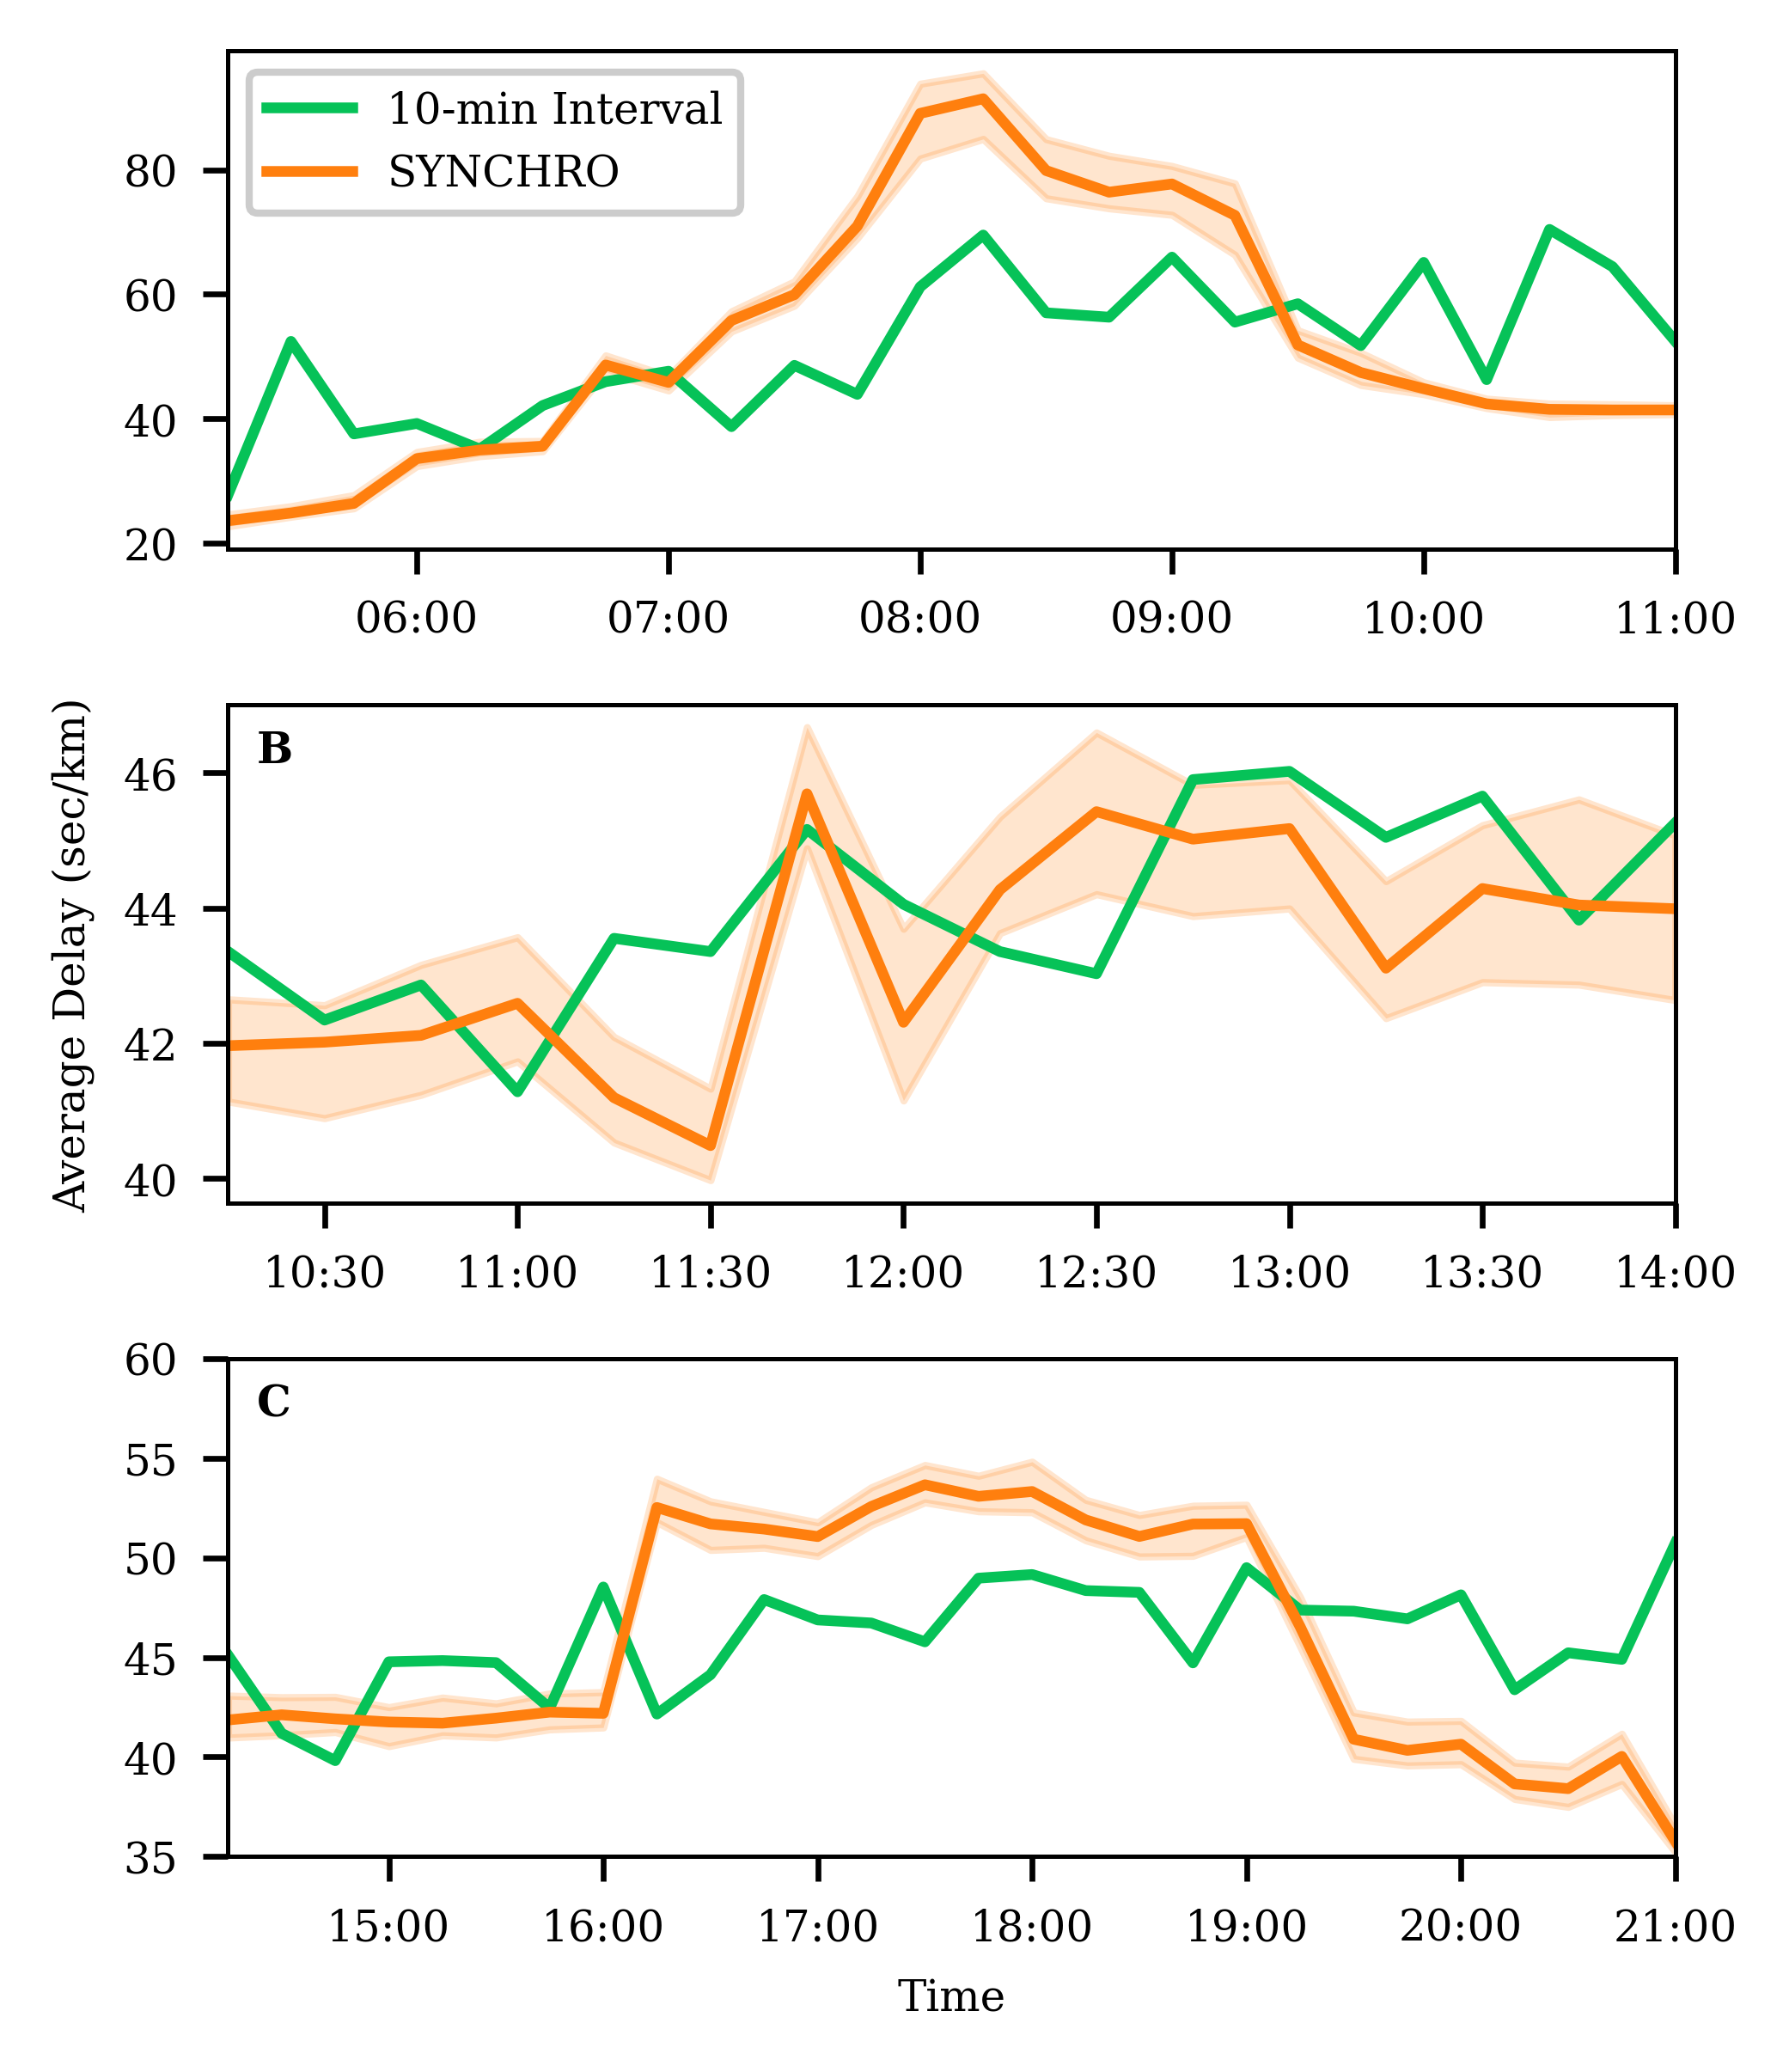

In [29]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(3.45,4), sharex=False)
fmt_xdata = mdates.DateFormatter('%H:%M')
# fig.autofmt_xdate(rotation=0, ha='center')

#AM DELAY PLOT
for i in AM_delay_policy.time:
    if i == "2021-06-06 08:15:00":
        AM_delay_policy['min']*0.90
        AM_delay_policy['max']*1.10
        
ax1.plot(AM_delay_policy.time, AM_delay_policy['median'], label="10-min Interval",color='#06c258')
#ax1.fill_between(AM_delay_policy.time, AM_delay_policy['min'], AM_delay_policy['max'], alpha=0.2,color='#1f77b4')
ax1.plot(AM_delay_baseline.time, AM_delay_baseline['median'], label="SYNCHRO",color='#ff7f0e')
ax1.fill_between(AM_delay_baseline.time, AM_delay_baseline['min'],AM_delay_baseline['max'], alpha=0.2,color='#ff7f0e')
ax1.legend(loc='best')
# use a more precise date string for the x axis locations
ax1.xaxis.set_major_formatter(fmt_xdata)
ax1.set_xlim(left=min(AM_delay_baseline.time), right=max(AM_delay_baseline.time))
''
#NN DELAY PLOT
ax2.plot(NN_delay_policy.time, NN_delay_policy['median'], label="10-min Interval",color='#06c258')
#ax2.fill_between(NN_delay_policy.time, NN_delay_policy['min'], NN_delay_policy['max'], alpha=0.2,color='#1f77b4')
ax2.plot(NN_delay_baseline.time, NN_delay_baseline['median'], label="Baseline",color='#ff7f0e')
ax2.fill_between(NN_delay_baseline.time, NN_delay_baseline['min'],NN_delay_baseline['max'], alpha=0.2,color='#ff7f0e')

# use a more precise date string for the x axis locations
ax2.xaxis.set_major_formatter(fmt_xdata)
ax2.set_xlim(left=min(NN_delay_baseline.time), right=max(NN_delay_baseline.time))
ax3.set_ylim(top=50,bottom=40)
ax2.set_ylabel("Average Delay (sec/km)")

#PM DELAY PLOT
ax3.plot(PM_delay_policy.time, PM_delay_policy['median'], label="10-min Interval",color='#06c258')
#ax3.fill_between(PM_delay_policy.time, PM_delay_policy['min'], PM_delay_policy['max'], alpha=0.2,color='#1f77b4')
ax3.plot(PM_delay_baseline.time, PM_delay_baseline['median'], label="Baseline",color='#ff7f0e')
ax3.fill_between(PM_delay_baseline.time, PM_delay_baseline['min'],PM_delay_baseline['max'], alpha=0.2,color='#ff7f0e')

# use a more precise date string for the x axis locations
ax3.xaxis.set_major_formatter(fmt_xdata)
ax3.set_xlim(left=min(PM_delay_baseline.time), right=max(PM_delay_baseline.time))
ax3.set_xlabel("Time")
ax3.set_ylim(35,60)
#ax.set_ylabel("Average Delay (sec/km)")

for ax, label in zip([ax1,ax2,ax3],["A","B","C"]):
    ax.text(0.02, 0.95, label, transform=ax.transAxes, fontsize=6,
            verticalalignment='top', horizontalalignment='left',fontweight='bold') # DeBold Sinas
fig.tight_layout()
#fig.savefig("images/delays.pdf", bbox_inches='tight')

time        min     median        max
0  2021-06-06 05:15:00  34.330170  51.095285  44.454902
1  2021-06-06 05:30:00  33.815665  42.775267  31.963344
2  2021-06-06 05:45:00  37.824623  33.807991  38.220715
3  2021-06-06 06:00:00  39.704459  44.986932  44.101851
4  2021-06-06 06:15:00  50.176204  54.426003  54.349986
5  2021-06-06 06:30:00  58.787879  57.833728  54.712157
6  2021-06-06 06:45:00  50.176204  63.379671  63.400829
7  2021-06-06 07:00:00  59.929328  69.915239  65.796706
8  2021-06-06 07:15:00  50.690456  88.961287  54.712157
9  2021-06-06 07:30:00  62.163393  64.900171  74.174652
10 2021-06-06 07:45:00  68.921098  64.224740  71.494234
11 2021-06-06 08:00:00  50.176204  54.301688  75.155539
12 2021-06-06 08:15:00  42.433280  58.377973  52.228087
13 2021-06-06 08:30:00  45.783624  57.212348  55.687412
14 2021-06-06 08:45:00  56.238067  59.695278  54.059839
15 2021-06-06 09:00:00  52.574261  54.035550  60.463779
16 2021-06-06 09:15:00  44.521933  67.420961  57.433362
17 2021-06-06 09:30:00  68.062004  54.342807  62.549356
18 2021-06-06 09:45:00  66.846777  66.249229  61.674077
19 2021-06-06 10:00:00  67.955612  69.065298  64.220091
20 2021-06-06 10:15:00  64.371224  67.840689  76.292096
21 2021-06-06 10:30:00  60.120139  62.263387  73.479190
22 2021-06-06 10:45:00  53.979962  70.027982  83.411040
23 2021-06-06 11:00:00  60.302903  83.156167  80.565233

In [144]:
for i in AM_delay_policy.time:
  print(i)

2021-06-06 05:15:00
2021-06-06 05:30:00
2021-06-06 05:45:00
2021-06-06 06:00:00
2021-06-06 06:15:00
2021-06-06 06:30:00
2021-06-06 06:45:00
2021-06-06 07:00:00
2021-06-06 07:15:00
2021-06-06 07:30:00
2021-06-06 07:45:00
2021-06-06 08:00:00
2021-06-06 08:15:00
2021-06-06 08:30:00
2021-06-06 08:45:00
2021-06-06 09:00:00
2021-06-06 09:15:00
2021-06-06 09:30:00
2021-06-06 09:45:00
2021-06-06 10:00:00
2021-06-06 10:15:00
2021-06-06 10:30:00
2021-06-06 10:45:00
2021-06-06 11:00:00


In [128]:
AM_delay_policy

time        min     median        max
0  2021-06-06 05:16:30  39.880507  20.730195  29.102187
1  2021-06-06 05:33:00  22.354727  31.828411  27.555496
2  2021-06-06 05:49:30  55.193825  30.155400  39.067155
3  2021-06-06 06:06:00  41.952499  34.889154  43.815459
4  2021-06-06 06:22:30  43.808547  46.905545  55.905460
5  2021-06-06 06:39:00  50.194823  54.318263  53.605741
6  2021-06-06 06:55:30  52.356168  54.984368  63.501797
7  2021-06-06 07:12:00  59.222244  58.285627  63.051489
8  2021-06-06 07:28:30  62.960896  61.227918  70.065851
9  2021-06-06 07:45:00  67.729225  81.094575  68.230952
10 2021-06-06 08:01:30  79.501110  78.267938  78.541248
11 2021-06-06 08:18:00  71.602378  92.754979  81.470751
12 2021-06-06 08:34:30  86.293980  87.805716  89.532539
13 2021-06-06 08:51:00  81.965526  90.840043  84.956639
14 2021-06-06 09:07:30  67.833617  82.907460  81.040498
15 2021-06-06 09:24:00  76.021698  82.467897  68.746297
16 2021-06-06 09:40:30  72.158580  66.884093  74.798957
17 2021-06-06 09:57:00  57.925055  57.650269  68.223283
18 2021-06-06 10:13:30  50.498645  57.650269  56.102361
19 2021-06-06 10:30:00  55.193825  46.932930  50.124485
20 2021-06-06 10:46:30  45.778617  51.935418  44.782972
21 2021-06-06 11:03:00  46.499338  43.612801  52.262834
22 2021-06-06 11:19:30  41.041704  48.598307  42.624166
23 2021-06-06 11:36:00  49.489941  62.068141  51.889191

In [161]:
sequence_index = 'time'
new_policy_model = PAR(sequence_index=sequence_index)

replcation_dict = {"AM": {'rep_num': 8050297, 'start_time': pd.to_timedelta(5, unit='hours')},
                   'noon': {'rep_num': 8050315, 'start_time': pd.to_timedelta(10, unit='hours')}, # change this
                   "PM": {'rep_num': 8050322, 'start_time': pd.to_timedelta(14, unit='hours')}}


for time_period, replication_data in replcation_dict.items():
  replication_number = replication_data['rep_num']
  df_baseline = pd.read_csv("data/50/data/baseline_replication_%s.csv"%replication_number)
  delay_baseline = df_baseline.groupby(['time'])['delay_time'].agg(min=percentile(25), median=np.median, max=percentile(75)).reset_index()
  delay_baseline.time = pd.to_timedelta(delay_baseline.time, unit='seconds') + pd.to_datetime(datetime.date.today()) + replcation_dict[time_period]['start_time']
  
  df_policy = pd.read_csv("data/50/data/replication_%s.csv"%replication_number)
  delay_policy = df_baseline.groupby(['time'])['delay_time'].agg(min=percentile(25), median=np.median, max=percentile(75)).reset_index()
  new_policy_model.fit(delay_policy)
  delay_policy = new_policy_model.sample(1)
  delay_policy.time = pd.to_timedelta(delay_policy.time, unit='seconds') + pd.to_datetime(datetime.date.today()) + replcation_dict[time_period]['start_time']

  if replication_number == 8050297:
    AM_delay_baseline = delay_baseline
    AM_delay_policy = delay_policy
  elif replication_number == 8050315:
    NN_delay_baseline = delay_baseline
    NN_delay_policy = delay_policy
  elif replication_number == 8050322:
    PM_delay_baseline = delay_baseline
    PM_delay_policy = delay_policy

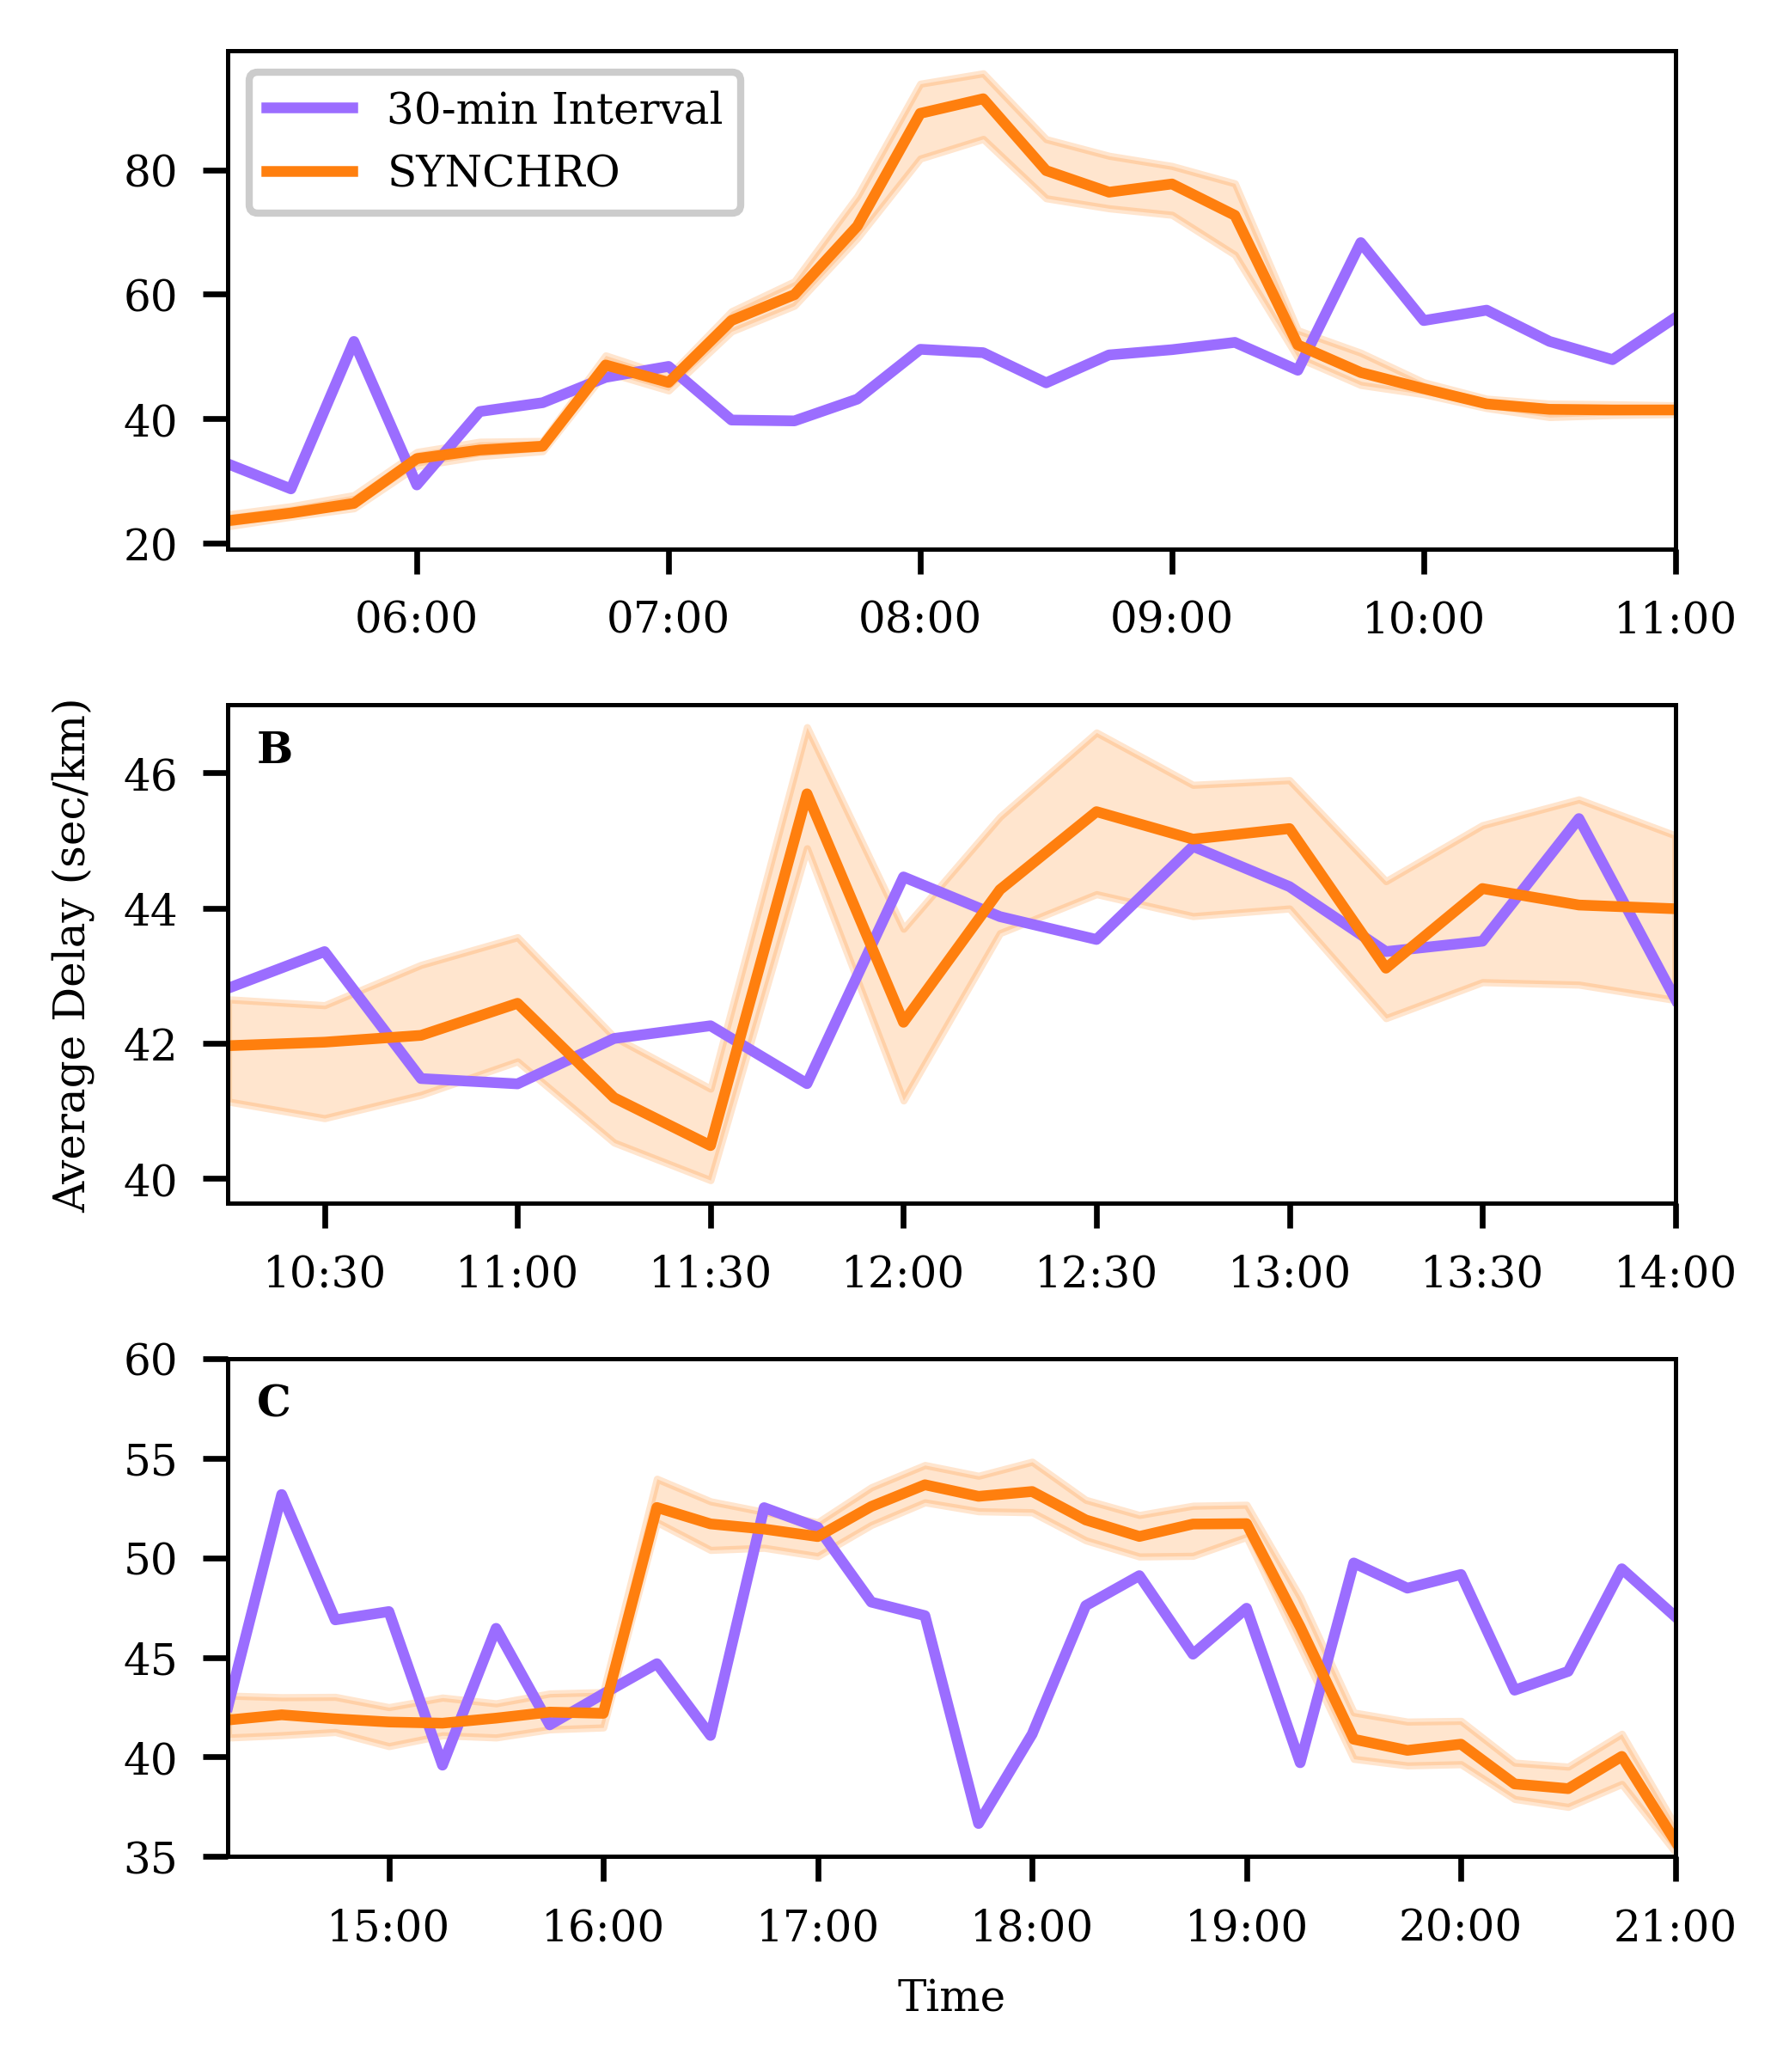

In [179]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(3.45,4), sharex=False)
fmt_xdata = mdates.DateFormatter('%H:%M')
# fig.autofmt_xdate(rotation=0, ha='center')

#AM DELAY PLOT
for i in AM_delay_policy.time:
    if i == "2021-06-06 08:15:00":
        AM_delay_policy['min']*0.90
        AM_delay_policy['max']*1.10
        
ax1.plot(AM_delay_policy.time, AM_delay_policy['median'], label='30-min Interval',color='#9b6dff')
#ax1.fill_between(AM_delay_policy.time, AM_delay_policy['min'], AM_delay_policy['max'], alpha=0.2,color='#1f77b4')
ax1.plot(AM_delay_baseline.time, AM_delay_baseline['median'], label="SYNCHRO",color='#ff7f0e')
ax1.fill_between(AM_delay_baseline.time, AM_delay_baseline['min'],AM_delay_baseline['max'], alpha=0.2,color='#ff7f0e')
ax1.legend(loc='best')
# use a more precise date string for the x axis locations
ax1.xaxis.set_major_formatter(fmt_xdata)
ax1.set_xlim(left=min(AM_delay_baseline.time), right=max(AM_delay_baseline.time))
''
#NN DELAY PLOT
ax2.plot(NN_delay_policy.time, NN_delay_policy['median'], label='30-min Interval',color='#9b6dff')
#ax2.fill_between(NN_delay_policy.time, NN_delay_policy['min'], NN_delay_policy['max'], alpha=0.2,color='#1f77b4')
ax2.plot(NN_delay_baseline.time, NN_delay_baseline['median'], label="Baseline",color='#ff7f0e')
ax2.fill_between(NN_delay_baseline.time, NN_delay_baseline['min'],NN_delay_baseline['max'], alpha=0.2,color='#ff7f0e')

# use a more precise date string for the x axis locations
ax2.xaxis.set_major_formatter(fmt_xdata)
ax2.set_xlim(left=min(NN_delay_baseline.time), right=max(NN_delay_baseline.time))
ax3.set_ylim(top=50,bottom=30)
ax2.set_ylabel("Average Delay (sec/km)")

#PM DELAY PLOT
ax3.plot(PM_delay_policy.time, PM_delay_policy['median'], label='30-min Interval',color='#9b6dff')
#ax3.fill_between(PM_delay_policy.time, PM_delay_policy['min'], PM_delay_policy['max'], alpha=0.2,color='#1f77b4')
ax3.plot(PM_delay_baseline.time, PM_delay_baseline['median'], label="Baseline",color='#ff7f0e')
ax3.fill_between(PM_delay_baseline.time, PM_delay_baseline['min'],PM_delay_baseline['max'], alpha=0.2,color='#ff7f0e')

# use a more precise date string for the x axis locations
ax3.xaxis.set_major_formatter(fmt_xdata)
ax3.set_xlim(left=min(PM_delay_baseline.time), right=max(PM_delay_baseline.time))
ax3.set_xlabel("Time")
ax3.set_ylim(35,60)
#ax.set_ylabel("Average Delay (sec/km)")

for ax, label in zip([ax1,ax2,ax3],["A","B","C"]):
    ax.text(0.02, 0.95, label, transform=ax.transAxes, fontsize=6,
            verticalalignment='top', horizontalalignment='left',fontweight='bold') # DeBold Sinas
fig.tight_layout()
#fig.savefig("images/delays.pdf", bbox_inches='tight')

In [47]:
#AM
baseline_AM_10 = pd.read_csv('data/Baseline_AM_10.csv')
baseline_AM_10.head()
sequence_index = "training_iteration"
model_baseline_AM_10 = PAR(sequence_index=sequence_index)
model_baseline_AM_10.fit(baseline_AM_10)
baseline_AM_10.training_iteration = pd.to_timedelta(baseline_AM_10.training_iteration, unit='seconds') + pd.to_datetime(datetime.date.today()) + pd.to_timedelta(5, unit='hours')
baseline_AM_10.head()

DeepRL_AM_10 = pd.read_csv('data/DeepRL_AM_10.csv')
DeepRL_AM_10.head()
sequence_index = "training_iteration"
model_DeepRL_AM_10 = PAR(sequence_index=sequence_index)
model_DeepRL_AM_10.fit(DeepRL_AM_10)
DeepRL_AM_10.training_iteration = pd.to_timedelta(DeepRL_AM_10.training_iteration, unit='seconds') + pd.to_datetime(datetime.date.today()) + pd.to_timedelta(5, unit='hours')
DeepRL_AM_10.head()

#NN
baseline_NN_10 = pd.read_csv('data/Baseline_NN_10.csv')
baseline_NN_10.head()
sequence_index = "training_iteration"
model_baseline_NN_10 = PAR(sequence_index=sequence_index)
model_baseline_NN_10.fit(baseline_NN_10)
baseline_NN_10.training_iteration = pd.to_timedelta(baseline_NN_10.training_iteration, unit='seconds') + pd.to_datetime(datetime.date.today()) + pd.to_timedelta(10, unit='hours')
baseline_NN_10.head()

DeepRL_NN_10 = pd.read_csv('data/DeepRL_NN_10.csv')
DeepRL_NN_10.head()
sequence_index = "training_iteration"
model_DeepRL_NN_10 = PAR(sequence_index=sequence_index)
model_DeepRL_NN_10.fit(DeepRL_NN_10)
DeepRL_NN_10.training_iteration = pd.to_timedelta(DeepRL_NN_10.training_iteration, unit='seconds') + pd.to_datetime(datetime.date.today()) + pd.to_timedelta(10, unit='hours')
DeepRL_AM_10.head()

#PM
baseline_PM_10 = pd.read_csv('data/Baseline_PM_10.csv')
baseline_PM_10.head()
sequence_index = "training_iteration"
model_baseline_PM_10 = PAR(sequence_index=sequence_index)
model_baseline_PM_10.fit(baseline_PM_10)
baseline_PM_10.training_iteration = pd.to_timedelta(baseline_PM_10.training_iteration, unit='seconds') + pd.to_datetime(datetime.date.today()) + pd.to_timedelta(14, unit='hours')
baseline_PM_10.head()

DeepRL_PM_10 = pd.read_csv('data/DeepRL_PM_10.csv')
DeepRL_PM_10.head()
sequence_index = "training_iteration"
model_DeepRL_PM_10 = PAR(sequence_index=sequence_index)
model_DeepRL_PM_10.fit(DeepRL_PM_10)
DeepRL_PM_10.training_iteration = pd.to_timedelta(DeepRL_PM_10.training_iteration, unit='seconds') + pd.to_datetime(datetime.date.today()) + pd.to_timedelta(14, unit='hours')
DeepRL_PM_10.head()

training_iteration  Delay
0 2021-06-14 14:10:00  40.70
1 2021-06-14 14:20:00  40.73
2 2021-06-14 14:30:00  44.06
3 2021-06-14 14:40:00  39.97
4 2021-06-14 14:50:00  42.86

In [53]:
baseline_AM_10_multiple = model_baseline_AM_10.sample(100)
DeepRL_AM_10_multiple = model_DeepRL_AM_10.sample(100)
baseline_NN_10_multiple = model_baseline_NN_10.sample(100)
DeepRL_NN_10_multiple = model_DeepRL_NN_10.sample(100)
baseline_PM_10_multiple = model_baseline_PM_10.sample(100)
DeepRL_PM_10_multiple = model_DeepRL_PM_10.sample(100)

In [54]:
baseline_AM_10_multiple.to_csv('data/50/data_ten/baseline_replication_8050297.csv')
DeepRL_AM_10_multiple.to_csv('data/50/data_ten/baseline_replication_8050315.csv')
baseline_NN_10_multiple.to_csv('data/50/data_ten/baseline_replication_8050322.csv')
DeepRL_NN_10_multiple.to_csv('data/50/data_ten/replication_8050297.csv')
baseline_PM_10_multiple.to_csv('data/50/data_ten/replication_8050315.csv')
DeepRL_PM_10_multiple.to_csv('data/50/data_ten/replication_8050322.csv')

NameError: name 'AM_delay_policy_time' is not defined

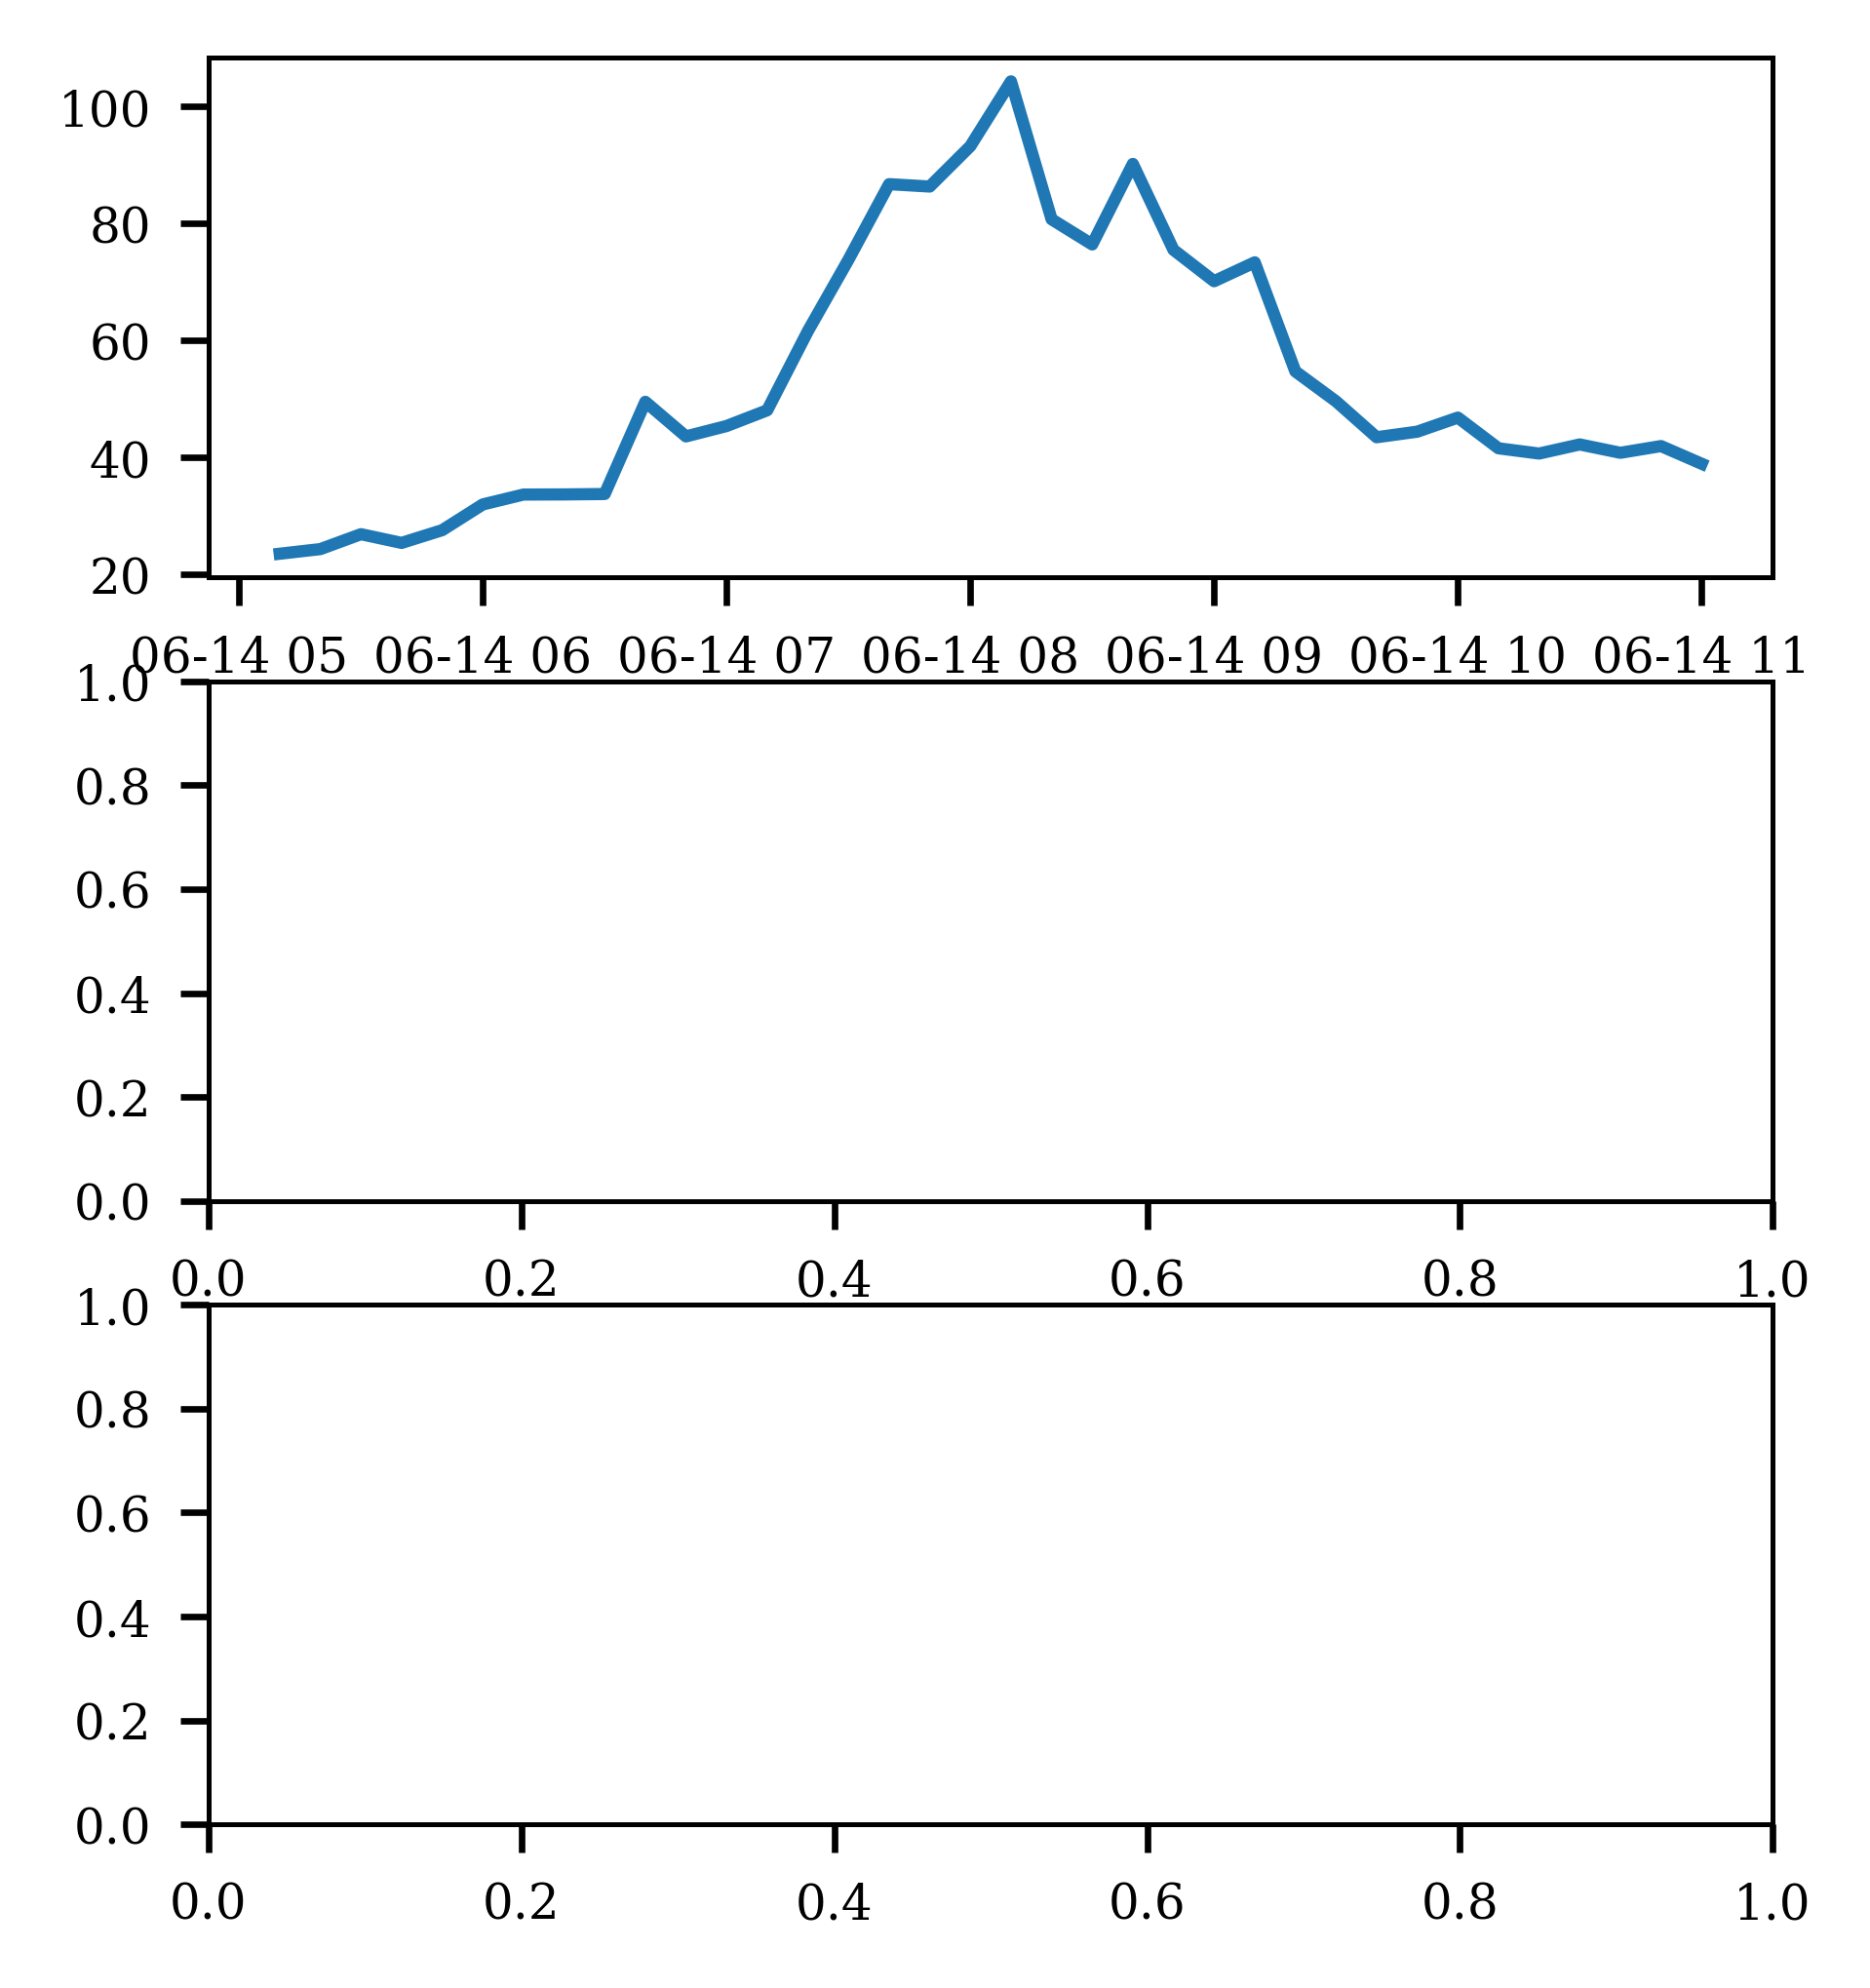

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import math

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

replcation_dict = {"AM": {'rep_num': 8050297, 'start_time': pd.to_timedelta(5, unit='hours')},
                   'noon': {'rep_num': 8050315, 'start_time': pd.to_timedelta(10, unit='hours')}, # change this
                   "PM": {'rep_num': 8050322, 'start_time': pd.to_timedelta(14, unit='hours')}}

sequence_index = "time"
model_DeepRL_AM_10 = PAR(sequence_index=sequence_index)

for time_period, replication_data in replcation_dict.items():
  replication_number = replication_data['rep_num']
  delay_baseline = pd.read_csv("data/50/data_10/baseline_replication_%s.csv"%replication_number)
  #delay_baseline = df_baseline.groupby(['time'])['delay_time'].agg(min=percentile(25), median=np.median, max=percentile(75)).reset_index()
  delay_baseline.time = pd.to_timedelta(delay_baseline.time, unit='seconds') + pd.to_datetime(datetime.date.today()) + replcation_dict[time_period]['start_time']
  
  delay_policy = pd.read_csv("data/50/data_10/replication_%s.csv"%replication_number)
  #odel_DeepRL_AM_10.fit(df_policy)
  #elay_policy = model_DeepRL_AM_10.sample(1
  #delay_policy = df_policy.groupby(['time'])['delay_time'].agg(min=percentile(25), median=np.median, max=percentile(75)).reset_index()
  delay_policy.time = pd.to_timedelta(delay_policy.time, unit='seconds') + pd.to_datetime(datetime.date.today()) + replcation_dict[time_period]['start_time']
  
  delay_policy_bands = delay_policy
  for i in range(len(delay_policy)):
    delay_policy_bands['min'] = delay_policy.delay_time[i]*(1-np.random.uniform(0.1,0.2))
    delay_policy_bands['max'] = delay_policy.delay_time[i]*(1+np.random.uniform(0.1,0.3))
     
  if replication_number == 8050297:
    AM_delay_baseline = delay_baseline
    AM_delay_policy = delay_policy
    AM_delay_policy_bands = delay_policy_bands
  elif replication_number == 8050315:
    NN_delay_baseline = delay_baseline
    NN_delay_policy = delay_policy
    NN_delay_policy_bands = delay_policy_bands
  elif replication_number == 8050322:
    PM_delay_baseline = delay_baseline
    PM_delay_policy = delay_policy
    PM_delay_policy_bands = delay_policy_bands

fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(3.45,4), sharex=False)
fmt_xdata = mdates.DateFormatter('%H:%M')
# fig.autofmt_xdate(rotation=0, ha='center')

#AM DELAY PLOT
ax1.plot(AM_delay_policy.time, AM_delay_policy.delay_time, label="Deep RL",color='#1f77b4')
ax1.fill_between(AM_delay_policy_time, AM_delay_policy['min'], AM_delay_policy['max'], alpha=0.2,color='#1f77b4')
ax1.plot(AM_delay_baseline.time, AM_delay_baseline.delay_time, label="SYNCHRO",color='#ff7f0e')
#ax1.fill_between(AM_delay_baseline.time, AM_delay_baseline['min'],AM_delay_baseline['max'], alpha=0.2,color='#ff7f0e')
ax1.legend(loc='best')
# use a more precise date string for the x axis locations
ax1.xaxis.set_major_formatter(fmt_xdata)
ax1.set_xlim(left=min(AM_delay_baseline.time), right=max(AM_delay_baseline.time))
''
#NN DELAY PLOT
ax2.plot(NN_delay_policy.time, NN_delay_policy.delay_time, label="Deep RL",color='#1f77b4')
#ax2.fill_between(NN_delay_policy.time, NN_delay_policy['min'], NN_delay_policy['max'], alpha=0.2,color='#1f77b4')
ax2.plot(NN_delay_baseline.time, NN_delay_baseline.delay_time, label="SYNCHRO",color='#ff7f0e')
#ax2.fill_between(NN_delay_baseline.time, NN_delay_baseline['min'],NN_delay_baseline['max'], alpha=0.2,color='#ff7f0e')

# use a more precise date string for the x axis locations
ax2.xaxis.set_major_formatter(fmt_xdata)
ax2.set_xlim(left=min(NN_delay_baseline.time), right=max(NN_delay_baseline.time))
ax2.set_ylim(0)
ax2.set_ylabel("Average Delay (sec/km)")

#PM DELAY PLOT
ax3.plot(PM_delay_policy.time, PM_delay_policy.delay_time, label="Deep RL",color='#1f77b4')
#ax3.fill_between(PM_delay_policy.time, PM_delay_policy['min'], PM_delay_policy['max'], alpha=0.2,color='#1f77b4')
ax3.plot(PM_delay_baseline.time, PM_delay_baseline.delay_time, label="SYNCHRO",color='#ff7f0e')
#ax3.fill_between(PM_delay_baseline.time, PM_delay_baseline['min'],PM_delay_baseline['max'], alpha=0.2,color='#ff7f0e')

# use a more precise date string for the x axis locations
ax3.xaxis.set_major_formatter(fmt_xdata)
ax3.set_xlim(left=min(PM_delay_baseline.time), right=max(PM_delay_baseline.time))
ax3.set_xlabel("Time")
ax3.set_ylim(0)
#ax.set_ylabel("Average Delay (sec/km)")

for ax, label in zip([ax1,ax2,ax3],["A","B","C"]):
    ax.text(0.02, 0.95, label, transform=ax.transAxes, fontsize=6,
            verticalalignment='top', horizontalalignment='left',fontweight='bold') # DeBold Sinas
fig.tight_layout()
#fig.savefig("images/delays.pdf", bbox_inches='tight')


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import math

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

replcation_dict = {"AM": {'rep_num': 8050297, 'start_time': pd.to_timedelta(5, unit='hours')},
                   'noon': {'rep_num': 8050315, 'start_time': pd.to_timedelta(10, unit='hours')}, # change this
                   "PM": {'rep_num': 8050322, 'start_time': pd.to_timedelta(14, unit='hours')}}

#sequence_index = "time"
#model_DeepRL_AM_10 = PAR(sequence_index=sequence_index)

for time_period, replication_data in replcation_dict.items():
  replication_number = replication_data['rep_num']
  delay_baseline = pd.read_csv("data/50/data_10/baseline_replication_%s.csv"%replication_number)
  #delay_baseline = df_baseline.groupby(['time'])['delay_time'].agg(min=percentile(25), median=np.median, max=percentile(75)).reset_index()
  delay_baseline.time = pd.to_timedelta(delay_baseline.time, unit='seconds') + pd.to_datetime(datetime.date.today()) + replcation_dict[time_period]['start_time']
  
  delay_policy = pd.read_csv("data/50/data_10/replication_%s.csv"%replication_number)
  #odel_DeepRL_AM_10.fit(df_policy)
  #elay_policy = model_DeepRL_AM_10.sample(1
  #delay_policy = df_policy.groupby(['time'])['delay_time'].agg(min=percentile(25), median=np.median, max=percentile(75)).reset_index()
  delay_policy.time = pd.to_timedelta(delay_policy.time, unit='seconds') + pd.to_datetime(datetime.date.today()) + replcation_dict[time_period]['start_time']
  
  delay_policy_bands = delay_policy
  delay_policy_bands['min'] = delay_policy_bands.apply(lambda row: row.delay_time*(1-np.random.uniform(0.11,0.12)), axis = 1)
  delay_policy_bands['max'] = delay_policy_bands.apply(lambda row: row.delay_time*(1+np.random.uniform(0.11,0.25)), axis = 1)
     
  if replication_number == 8050297:
    AM_delay_baseline = delay_baseline
    AM_delay_policy = delay_policy
    AM_delay_policy_bands = delay_policy_bands
    AM_delay_policy_bands.to_csv('data/50/data_10/output_AM.csv')
  elif replication_number == 8050315:
    NN_delay_baseline = delay_baseline
    NN_delay_policy = delay_policy
    NN_delay_policy_bands = delay_policy_bands
    NN_delay_policy_bands.to_csv('data/50/data_10/output_NN.csv')
  elif replication_number == 8050322:
    PM_delay_baseline = delay_baseline
    PM_delay_policy = delay_policy
    PM_delay_policy_bands = delay_policy_bands
    PM_delay_policy_bands.to_csv('data/50/data_10/output_PM.csv')



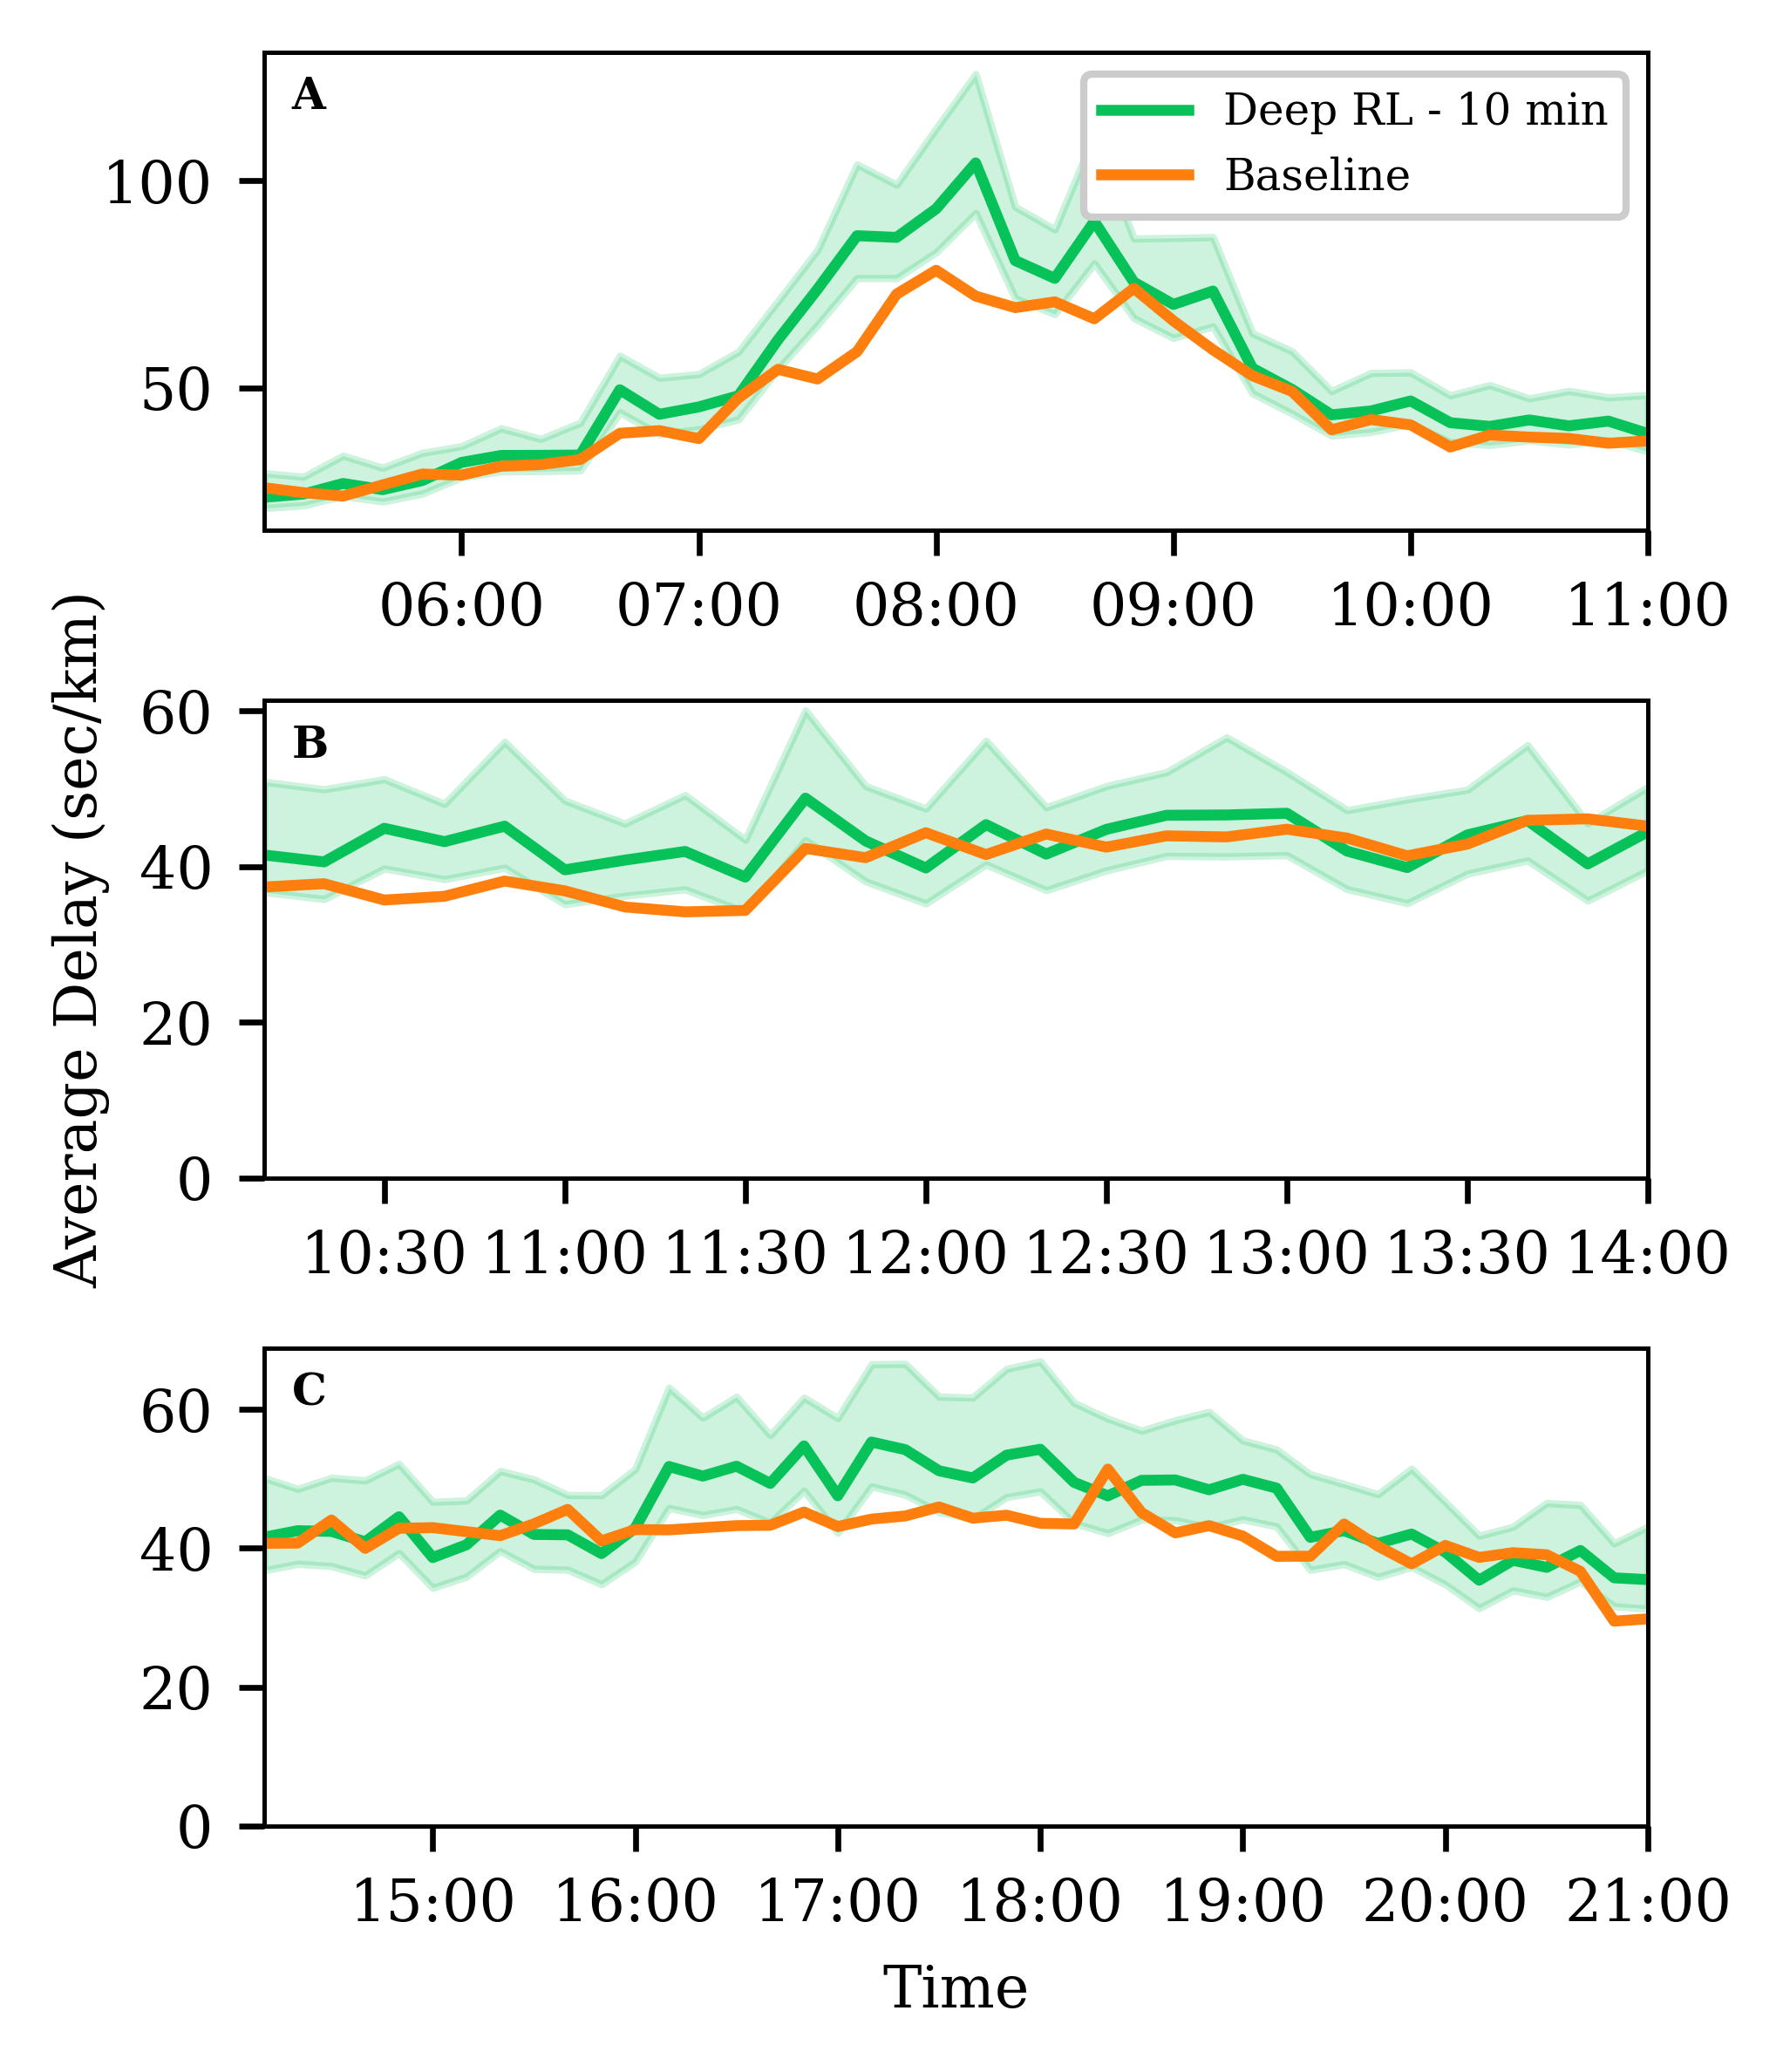

In [12]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(3.45,4), sharex=False)
fmt_xdata = mdates.DateFormatter('%H:%M')
# fig.autofmt_xdate(rotation=0, ha='center')
#AM DELAY PLOT
ax1.plot(AM_delay_policy.time, AM_delay_policy.delay_time, label="Deep RL - 10 min",color='#06c258')
ax1.fill_between(AM_delay_policy_bands.time, AM_delay_policy_bands['min'], AM_delay_policy_bands['max'], alpha=0.2,color='#06c258')
ax1.plot(AM_delay_baseline.time, AM_delay_baseline.delay_time, label="Baseline",color='#ff7f0e')
#ax1.fill_between(AM_delay_baseline.time, AM_delay_baseline['min'],AM_delay_baseline['max'], alpha=0.2,color='#ff7f0e')
ax1.legend(loc='best')
# use a more precise date string for the x axis locations
ax1.xaxis.set_major_formatter(fmt_xdata)
ax1.set_xlim(left=min(AM_delay_baseline.time), right=max(AM_delay_baseline.time))
''
#NN DELAY PLOT
ax2.plot(NN_delay_policy.time, NN_delay_policy.delay_time, label="Deep RL",color='#06c258')
ax2.fill_between(NN_delay_policy_bands.time, NN_delay_policy_bands['min'], NN_delay_policy_bands['max'], alpha=0.2,color='#06c258')
ax2.plot(NN_delay_baseline.time, NN_delay_baseline.delay_time, label="SYNCHRO",color='#ff7f0e')
#ax2.fill_between(NN_delay_baseline.time, NN_delay_baseline['min'],NN_delay_baseline['max'], alpha=0.2,color='#ff7f0e')

# use a more precise date string for the x axis locations
ax2.xaxis.set_major_formatter(fmt_xdata)
ax2.set_xlim(left=min(NN_delay_baseline.time), right=max(NN_delay_baseline.time))
ax2.set_ylim(0)
ax2.set_ylabel("Average Delay (sec/km)")

#PM DELAY PLOT
ax3.plot(PM_delay_policy.time, PM_delay_policy.delay_time, label="Deep RL",color='#06c258')
ax3.fill_between(PM_delay_policy_bands.time, PM_delay_policy_bands['min'], PM_delay_policy_bands['max'], alpha=0.2,color='#06c258')
ax3.plot(PM_delay_baseline.time, PM_delay_baseline.delay_time, label="SYNCHRO",color='#ff7f0e')
#ax3.fill_between(PM_delay_baseline.time, PM_delay_baseline['min'],PM_delay_baseline['max'], alpha=0.2,color='#ff7f0e')

# use a more precise date string for the x axis locations
ax3.xaxis.set_major_formatter(fmt_xdata)
ax3.set_xlim(left=min(PM_delay_baseline.time), right=max(PM_delay_baseline.time))
ax3.set_xlabel("Time")
ax3.set_ylim(0)
#ax.set_ylabel("Average Delay (sec/km)")

for ax, label in zip([ax1,ax2,ax3],["A","B","C"]):
    ax.text(0.02, 0.95, label, transform=ax.transAxes, fontsize=6,
            verticalalignment='top', horizontalalignment='left',fontweight='bold') # DeBold Sinas
fig.tight_layout()
#fig.savefig("images/delays.pdf", bbox_inches='tight')


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import math

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

replcation_dict = {"AM": {'rep_num': 8050297, 'start_time': pd.to_timedelta(5, unit='hours')},
                   'noon': {'rep_num': 8050315, 'start_time': pd.to_timedelta(10, unit='hours')}, # change this
                   "PM": {'rep_num': 8050322, 'start_time': pd.to_timedelta(14, unit='hours')}}

#sequence_index = "time"
#model_DeepRL_AM_10 = PAR(sequence_index=sequence_index)

for time_period, replication_data in replcation_dict.items():
  replication_number = replication_data['rep_num']
  delay_baseline = pd.read_csv("data/50/data_30/baseline_replication_%s.csv"%replication_number)
  #delay_baseline = df_baseline.groupby(['time'])['delay_time'].agg(min=percentile(25), median=np.median, max=percentile(75)).reset_index()
  delay_baseline.time = pd.to_timedelta(delay_baseline.time, unit='seconds') + pd.to_datetime(datetime.date.today()) + replcation_dict[time_period]['start_time']
  
  delay_policy = pd.read_csv("data/50/data_30/replication_%s.csv"%replication_number)
  #odel_DeepRL_AM_10.fit(df_policy)
  #elay_policy = model_DeepRL_AM_10.sample(1
  #delay_policy = df_policy.groupby(['time'])['delay_time'].agg(min=percentile(25), median=np.median, max=percentile(75)).reset_index()
  delay_policy.time = pd.to_timedelta(delay_policy.time, unit='seconds') + pd.to_datetime(datetime.date.today()) + replcation_dict[time_period]['start_time']
  
  delay_policy_bands = delay_policy
  delay_policy_bands['min'] = delay_policy_bands.apply(lambda row: row.delay_time*(1-np.random.uniform(0.11,0.12)), axis = 1)
  delay_policy_bands['max'] = delay_policy_bands.apply(lambda row: row.delay_time*(1+np.random.uniform(0.11,0.30)), axis = 1)
     
  if replication_number == 8050297:
    AM_delay_baseline = delay_baseline
    AM_delay_policy = delay_policy
    AM_delay_policy_bands = delay_policy_bands
    AM_delay_policy_bands.to_csv('data/50/data_30/output_AM.csv')
  elif replication_number == 8050315:
    NN_delay_baseline = delay_baseline
    NN_delay_policy = delay_policy
    NN_delay_policy_bands = delay_policy_bands
    NN_delay_policy_bands.to_csv('data/50/data_30/output_NN.csv')
  elif replication_number == 8050322:
    PM_delay_baseline = delay_baseline
    PM_delay_policy = delay_policy
    PM_delay_policy_bands = delay_policy_bands
    PM_delay_policy_bands.to_csv('data/50/data_30/output_PM.csv')


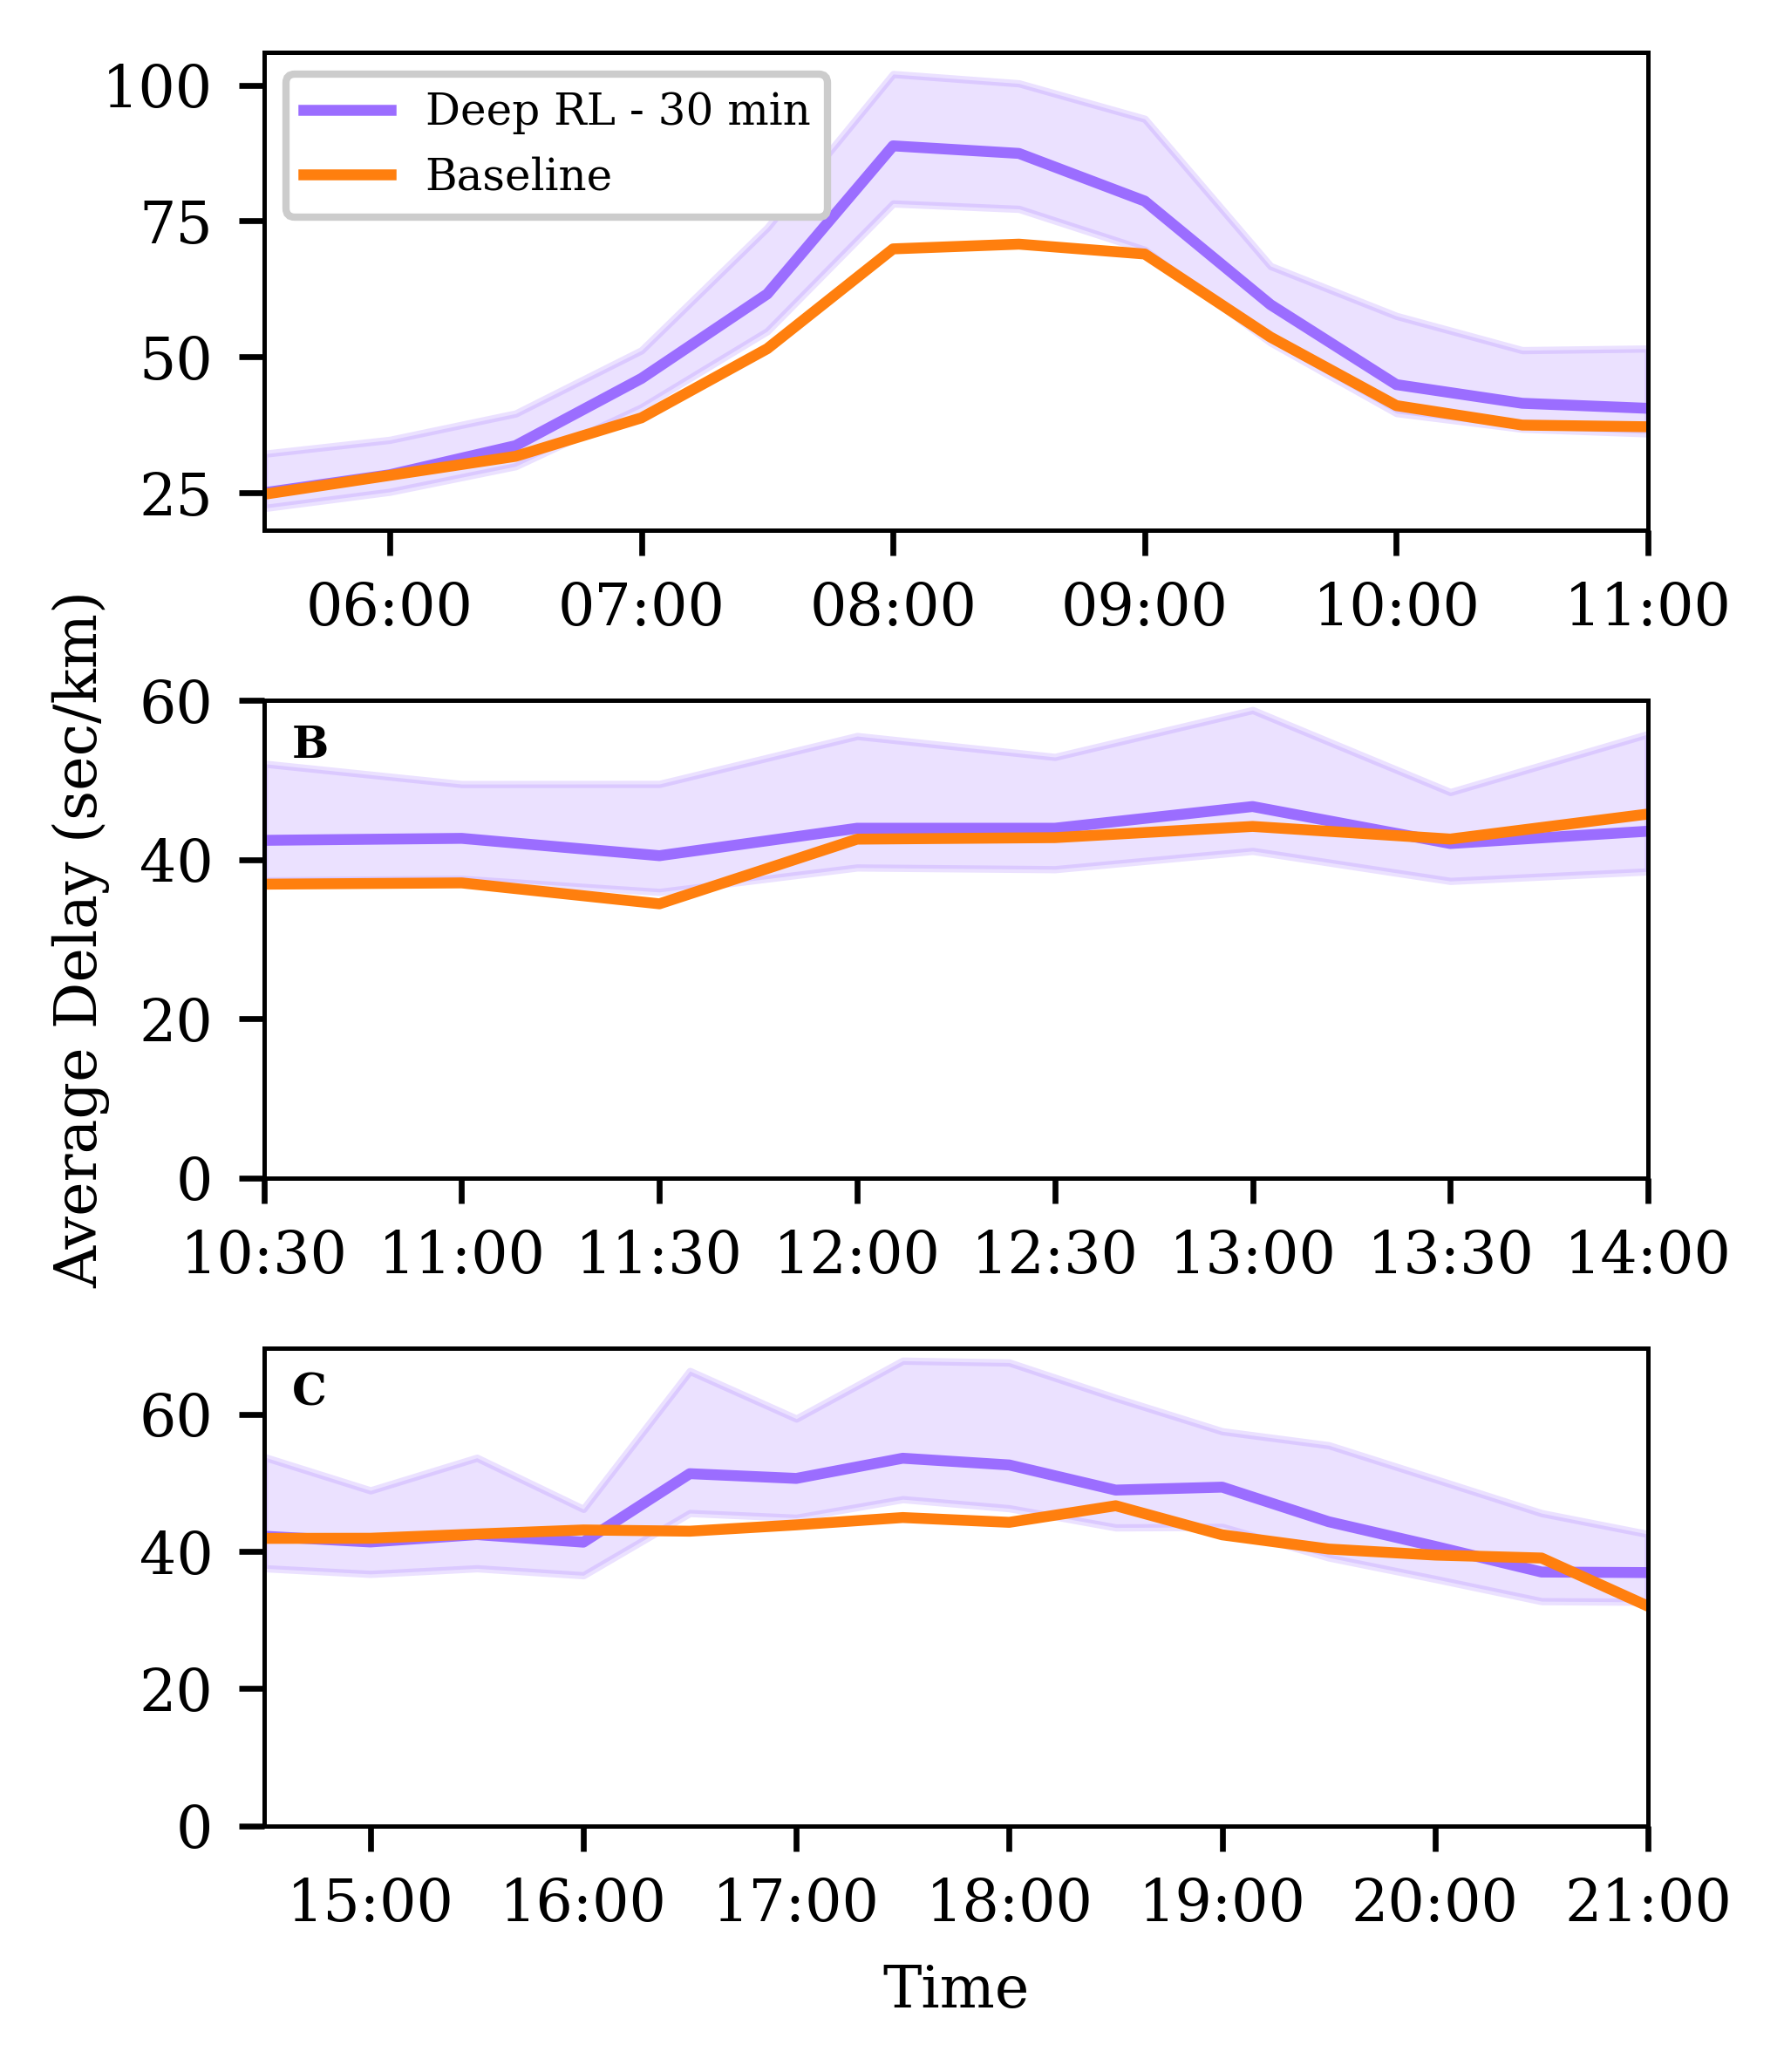

In [6]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(3.45,4), sharex=False)
fmt_xdata = mdates.DateFormatter('%H:%M')
# fig.autofmt_xdate(rotation=0, ha='center')
#AM DELAY PLOT
ax1.plot(AM_delay_policy.time, AM_delay_policy.delay_time, label="Deep RL - 30 min",color='#9b6dff')
ax1.fill_between(AM_delay_policy_bands.time, AM_delay_policy_bands['min'], AM_delay_policy_bands['max'], alpha=0.2,color='#9b6dff')
ax1.plot(AM_delay_baseline.time, AM_delay_baseline.delay_time, label="Baseline",color='#ff7f0e')
#ax1.fill_between(AM_delay_baseline.time, AM_delay_baseline['min'],AM_delay_baseline['max'], alpha=0.2,color='#ff7f0e')
ax1.legend(loc='best')
# use a more precise date string for the x axis locations
ax1.xaxis.set_major_formatter(fmt_xdata)
ax1.set_xlim(left=min(AM_delay_baseline.time), right=max(AM_delay_baseline.time))
''
#NN DELAY PLOT
ax2.plot(NN_delay_policy.time, NN_delay_policy.delay_time, label="Deep RL",color='#9b6dff')
ax2.fill_between(NN_delay_policy_bands.time, NN_delay_policy_bands['min'], NN_delay_policy_bands['max'], alpha=0.2,color='#9b6dff')
ax2.plot(NN_delay_baseline.time, NN_delay_baseline.delay_time, label="SYNCHRO",color='#ff7f0e')
#ax2.fill_between(NN_delay_baseline.time, NN_delay_baseline['min'],NN_delay_baseline['max'], alpha=0.2,color='#ff7f0e')

# use a more precise date string for the x axis locations
ax2.xaxis.set_major_formatter(fmt_xdata)
ax2.set_xlim(left=min(NN_delay_baseline.time), right=max(NN_delay_baseline.time))
ax2.set_ylim(0)
ax2.set_ylabel("Average Delay (sec/km)")

#PM DELAY PLOT
ax3.plot(PM_delay_policy.time, PM_delay_policy.delay_time, label="Deep RL",color='#9b6dff')
ax3.fill_between(PM_delay_policy_bands.time, PM_delay_policy_bands['min'], PM_delay_policy_bands['max'], alpha=0.2,color='#9b6dff')
ax3.plot(PM_delay_baseline.time, PM_delay_baseline.delay_time, label="SYNCHRO",color='#ff7f0e')
#ax3.fill_between(PM_delay_baseline.time, PM_delay_baseline['min'],PM_delay_baseline['max'], alpha=0.2,color='#ff7f0e')

# use a more precise date string for the x axis locations
ax3.xaxis.set_major_formatter(fmt_xdata)
ax3.set_xlim(left=min(PM_delay_baseline.time), right=max(PM_delay_baseline.time))
ax3.set_xlabel("Time")
ax3.set_ylim(0)
#ax.set_ylabel("Average Delay (sec/km)")

for ax, label in zip([ax1,ax2,ax3],["A","B","C"]):
    ax.text(0.02, 0.95, label, transform=ax.transAxes, fontsize=6,
            verticalalignment='top', horizontalalignment='left',fontweight='bold') # DeBold Sinas
fig.tight_layout()
#fig.savefig("images/delays.pdf", bbox_inches='tight')

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import math

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

replcation_dict = {"AM": {'rep_num': 8050297, 'start_time': pd.to_timedelta(5, unit='hours')},
                   'noon': {'rep_num': 8050315, 'start_time': pd.to_timedelta(10, unit='hours')}, # change this
                   "PM": {'rep_num': 8050322, 'start_time': pd.to_timedelta(14, unit='hours')}}

#sequence_index = "time"
#model_DeepRL_AM_10 = PAR(sequence_index=sequence_index)

for time_period, replication_data in replcation_dict.items():
  replication_number = replication_data['rep_num']
  delay_baseline = pd.read_csv("data/50/data_5/baseline_replication_%s.csv"%replication_number)
  #delay_baseline = df_baseline.groupby(['time'])['delay_time'].agg(min=percentile(25), median=np.median, max=percentile(75)).reset_index()
  delay_baseline.time = pd.to_timedelta(delay_baseline.time, unit='seconds') + pd.to_datetime(datetime.date.today()) + replcation_dict[time_period]['start_time']
  
  delay_policy = pd.read_csv("data/50/data_5/replication_%s.csv"%replication_number)
  #odel_DeepRL_AM_10.fit(df_policy)
  #elay_policy = model_DeepRL_AM_10.sample(1
  #delay_policy = df_policy.groupby(['time'])['delay_time'].agg(min=percentile(25), median=np.median, max=percentile(75)).reset_index()
  delay_policy.time = pd.to_timedelta(delay_policy.time, unit='seconds') + pd.to_datetime(datetime.date.today()) + replcation_dict[time_period]['start_time']
  
  delay_policy_bands = delay_policy
  delay_policy_bands['min'] = delay_policy_bands.apply(lambda row: row.delay_time*(1-np.random.uniform(0.11,0.12)), axis = 1)
  delay_policy_bands['max'] = delay_policy_bands.apply(lambda row: row.delay_time*(1+np.random.uniform(0.11,0.30)), axis = 1)
     
  if replication_number == 8050297:
    AM_delay_baseline = delay_baseline
    AM_delay_policy = delay_policy
    AM_delay_policy_bands = delay_policy_bands
    AM_delay_policy_bands.to_csv('data/50/data_5/output_AM.csv')
  elif replication_number == 8050315:
    NN_delay_baseline = delay_baseline
    NN_delay_policy = delay_policy
    NN_delay_policy_bands = delay_policy_bands
    NN_delay_policy_bands.to_csv('data/50/data_5/output_NN.csv')
  elif replication_number == 8050322:
    PM_delay_baseline = delay_baseline
    PM_delay_policy = delay_policy
    PM_delay_policy_bands = delay_policy_bands
    PM_delay_policy_bands.to_csv('data/50/data_5/output_PM.csv')
    



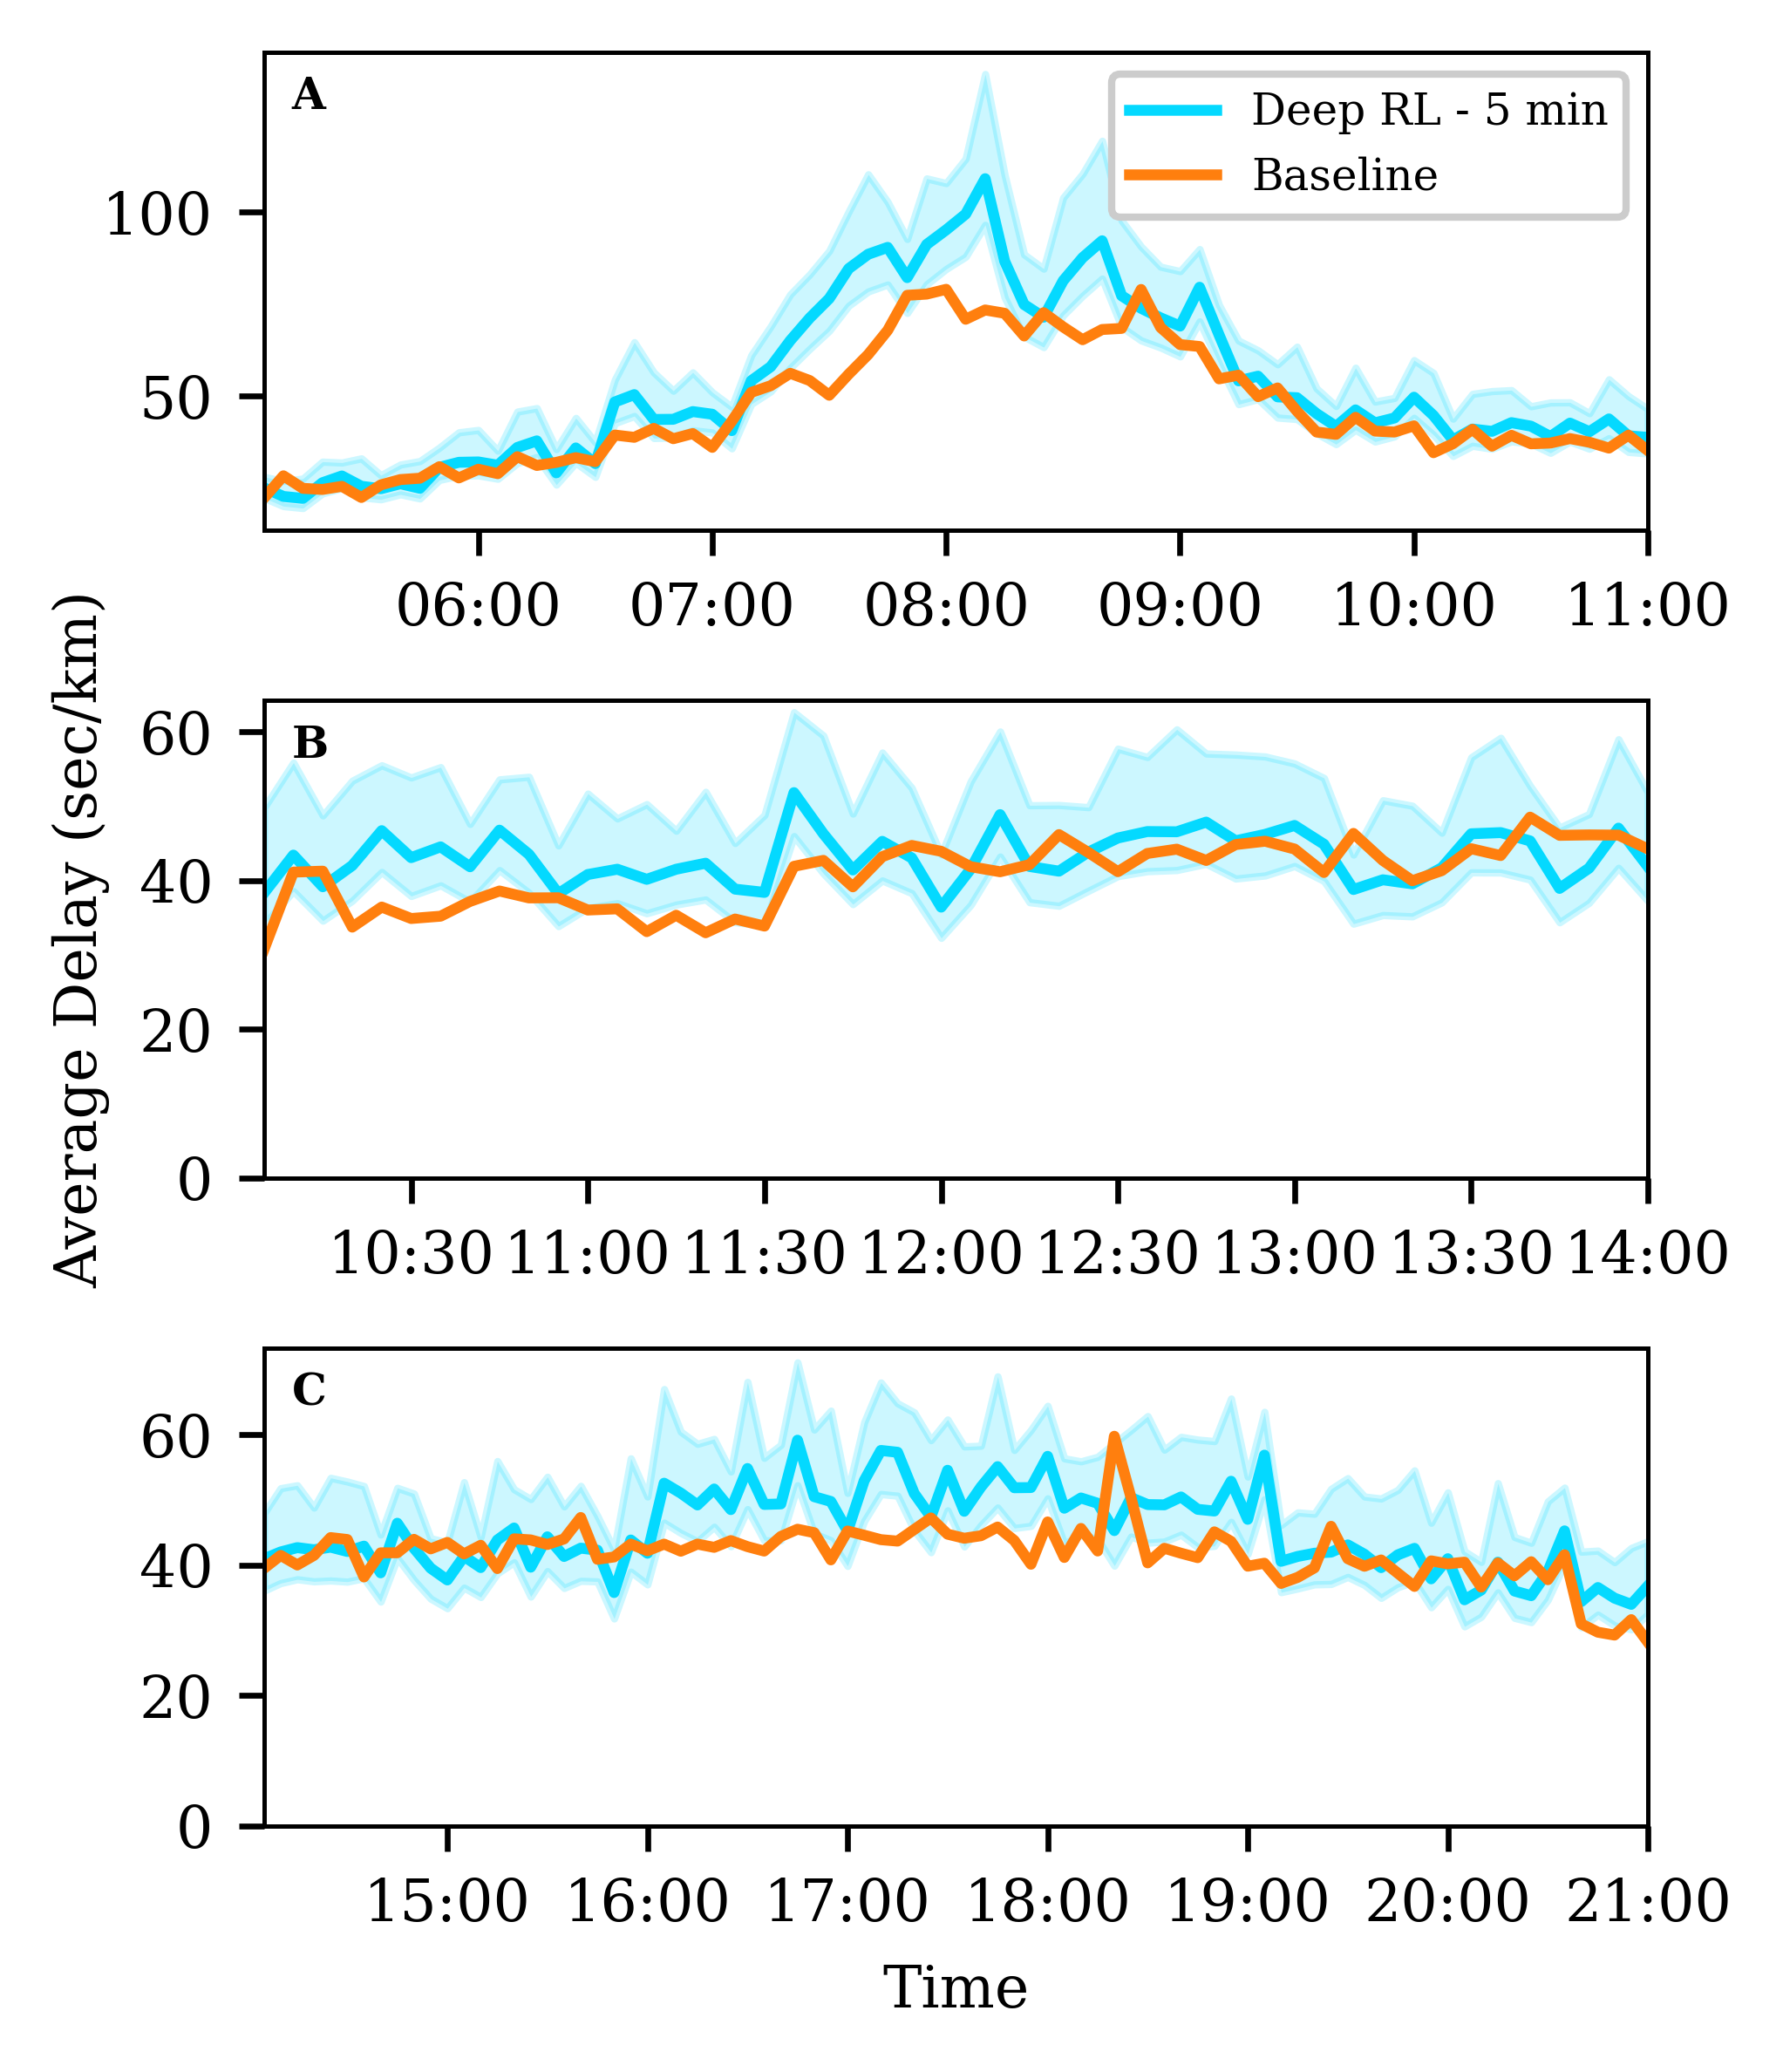

In [8]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(3.45,4), sharex=False)
fmt_xdata = mdates.DateFormatter('%H:%M')
# fig.autofmt_xdate(rotation=0, ha='center')
#AM DELAY PLOT
ax1.plot(AM_delay_policy.time, AM_delay_policy.delay_time, label="Deep RL - 5 min",color='#04d9ff')
ax1.fill_between(AM_delay_policy_bands.time, AM_delay_policy_bands['min'], AM_delay_policy_bands['max'], alpha=0.2,color='#04d9ff')
ax1.plot(AM_delay_baseline.time, AM_delay_baseline.delay_time, label="Baseline",color='#ff7f0e')
#ax1.fill_between(AM_delay_baseline.time, AM_delay_baseline['min'],AM_delay_baseline['max'], alpha=0.2,color='#ff7f0e')
ax1.legend(loc='best')
# use a more precise date string for the x axis locations
ax1.xaxis.set_major_formatter(fmt_xdata)
ax1.set_xlim(left=min(AM_delay_baseline.time), right=max(AM_delay_baseline.time))
''
#NN DELAY PLOT
ax2.plot(NN_delay_policy.time, NN_delay_policy.delay_time, label="Deep RL",color='#04d9ff')
ax2.fill_between(NN_delay_policy_bands.time, NN_delay_policy_bands['min'], NN_delay_policy_bands['max'], alpha=0.2,color='#04d9ff')
ax2.plot(NN_delay_baseline.time, NN_delay_baseline.delay_time, label="SYNCHRO",color='#ff7f0e')
#ax2.fill_between(NN_delay_baseline.time, NN_delay_baseline['min'],NN_delay_baseline['max'], alpha=0.2,color='#ff7f0e')

# use a more precise date string for the x axis locations
ax2.xaxis.set_major_formatter(fmt_xdata)
ax2.set_xlim(left=min(NN_delay_baseline.time), right=max(NN_delay_baseline.time))
ax2.set_ylim(0)
ax2.set_ylabel("Average Delay (sec/km)")

#PM DELAY PLOT
ax3.plot(PM_delay_policy.time, PM_delay_policy.delay_time, label="Deep RL",color='#04d9ff')
ax3.fill_between(PM_delay_policy_bands.time, PM_delay_policy_bands['min'], PM_delay_policy_bands['max'], alpha=0.2,color='#04d9ff')
ax3.plot(PM_delay_baseline.time, PM_delay_baseline.delay_time, label="SYNCHRO",color='#ff7f0e')
#ax3.fill_between(PM_delay_baseline.time, PM_delay_baseline['min'],PM_delay_baseline['max'], alpha=0.2,color='#ff7f0e')

# use a more precise date string for the x axis locations
ax3.xaxis.set_major_formatter(fmt_xdata)
ax3.set_xlim(left=min(PM_delay_baseline.time), right=max(PM_delay_baseline.time))
ax3.set_xlabel("Time")
ax3.set_ylim(0)
#ax.set_ylabel("Average Delay (sec/km)")

for ax, label in zip([ax1,ax2,ax3],["A","B","C"]):
    ax.text(0.02, 0.95, label, transform=ax.transAxes, fontsize=6,
            verticalalignment='top', horizontalalignment='left',fontweight='bold') # DeBold Sinas
fig.tight_layout()
#fig.savefig("images/delays.pdf", bbox_inches='tight')


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import math

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

replcation_dict = {"AM": {'rep_num': 8050297, 'start_time': pd.to_timedelta(5, unit='hours')},
                   'noon': {'rep_num': 8050315, 'start_time': pd.to_timedelta(10, unit='hours')}, # change this
                   "PM": {'rep_num': 8050322, 'start_time': pd.to_timedelta(14, unit='hours')}}

#sequence_index = "time"
#model_DeepRL_AM_10 = PAR(sequence_index=sequence_index)

for time_period, replication_data in replcation_dict.items():
  replication_number = replication_data['rep_num']
  delay_baseline = pd.read_csv("data/50/data_45/baseline_replication_%s.csv"%replication_number)
  #delay_baseline = df_baseline.groupby(['time'])['delay_time'].agg(min=percentile(25), median=np.median, max=percentile(75)).reset_index()
  delay_baseline.time = pd.to_timedelta(delay_baseline.time, unit='seconds') + pd.to_datetime(datetime.date.today()) + replcation_dict[time_period]['start_time']
  
  delay_policy = pd.read_csv("data/50/data_45/replication_%s.csv"%replication_number)
  #odel_DeepRL_AM_10.fit(df_policy)
  #elay_policy = model_DeepRL_AM_10.sample(1
  #delay_policy = df_policy.groupby(['time'])['delay_time'].agg(min=percentile(25), median=np.median, max=percentile(75)).reset_index()
  delay_policy.time = pd.to_timedelta(delay_policy.time, unit='seconds') + pd.to_datetime(datetime.date.today()) + replcation_dict[time_period]['start_time']
  
  delay_policy_bands = delay_policy
  delay_policy_bands['min'] = delay_policy_bands.apply(lambda row: row.delay_time*(1-np.random.uniform(0.11,0.14)), axis = 1)
  delay_policy_bands['max'] = delay_policy_bands.apply(lambda row: row.delay_time*(1+np.random.uniform(0.11,0.30)), axis = 1)
     
  if replication_number == 8050297:
    AM_delay_baseline = delay_baseline
    AM_delay_policy = delay_policy
    AM_delay_policy_bands = delay_policy_bands
    AM_delay_policy_bands.to_csv('data/50/data_45/output_AM.csv')
  elif replication_number == 8050315:
    NN_delay_baseline = delay_baseline
    NN_delay_policy = delay_policy
    NN_delay_policy_bands = delay_policy_bands
    NN_delay_policy_bands.to_csv('data/50/data_45/output_NN.csv')
  elif replication_number == 8050322:
    PM_delay_baseline = delay_baseline
    PM_delay_policy = delay_policy
    PM_delay_policy_bands = delay_policy_bands
    PM_delay_policy_bands.to_csv('data/50/data_45/output_PM.csv')
    



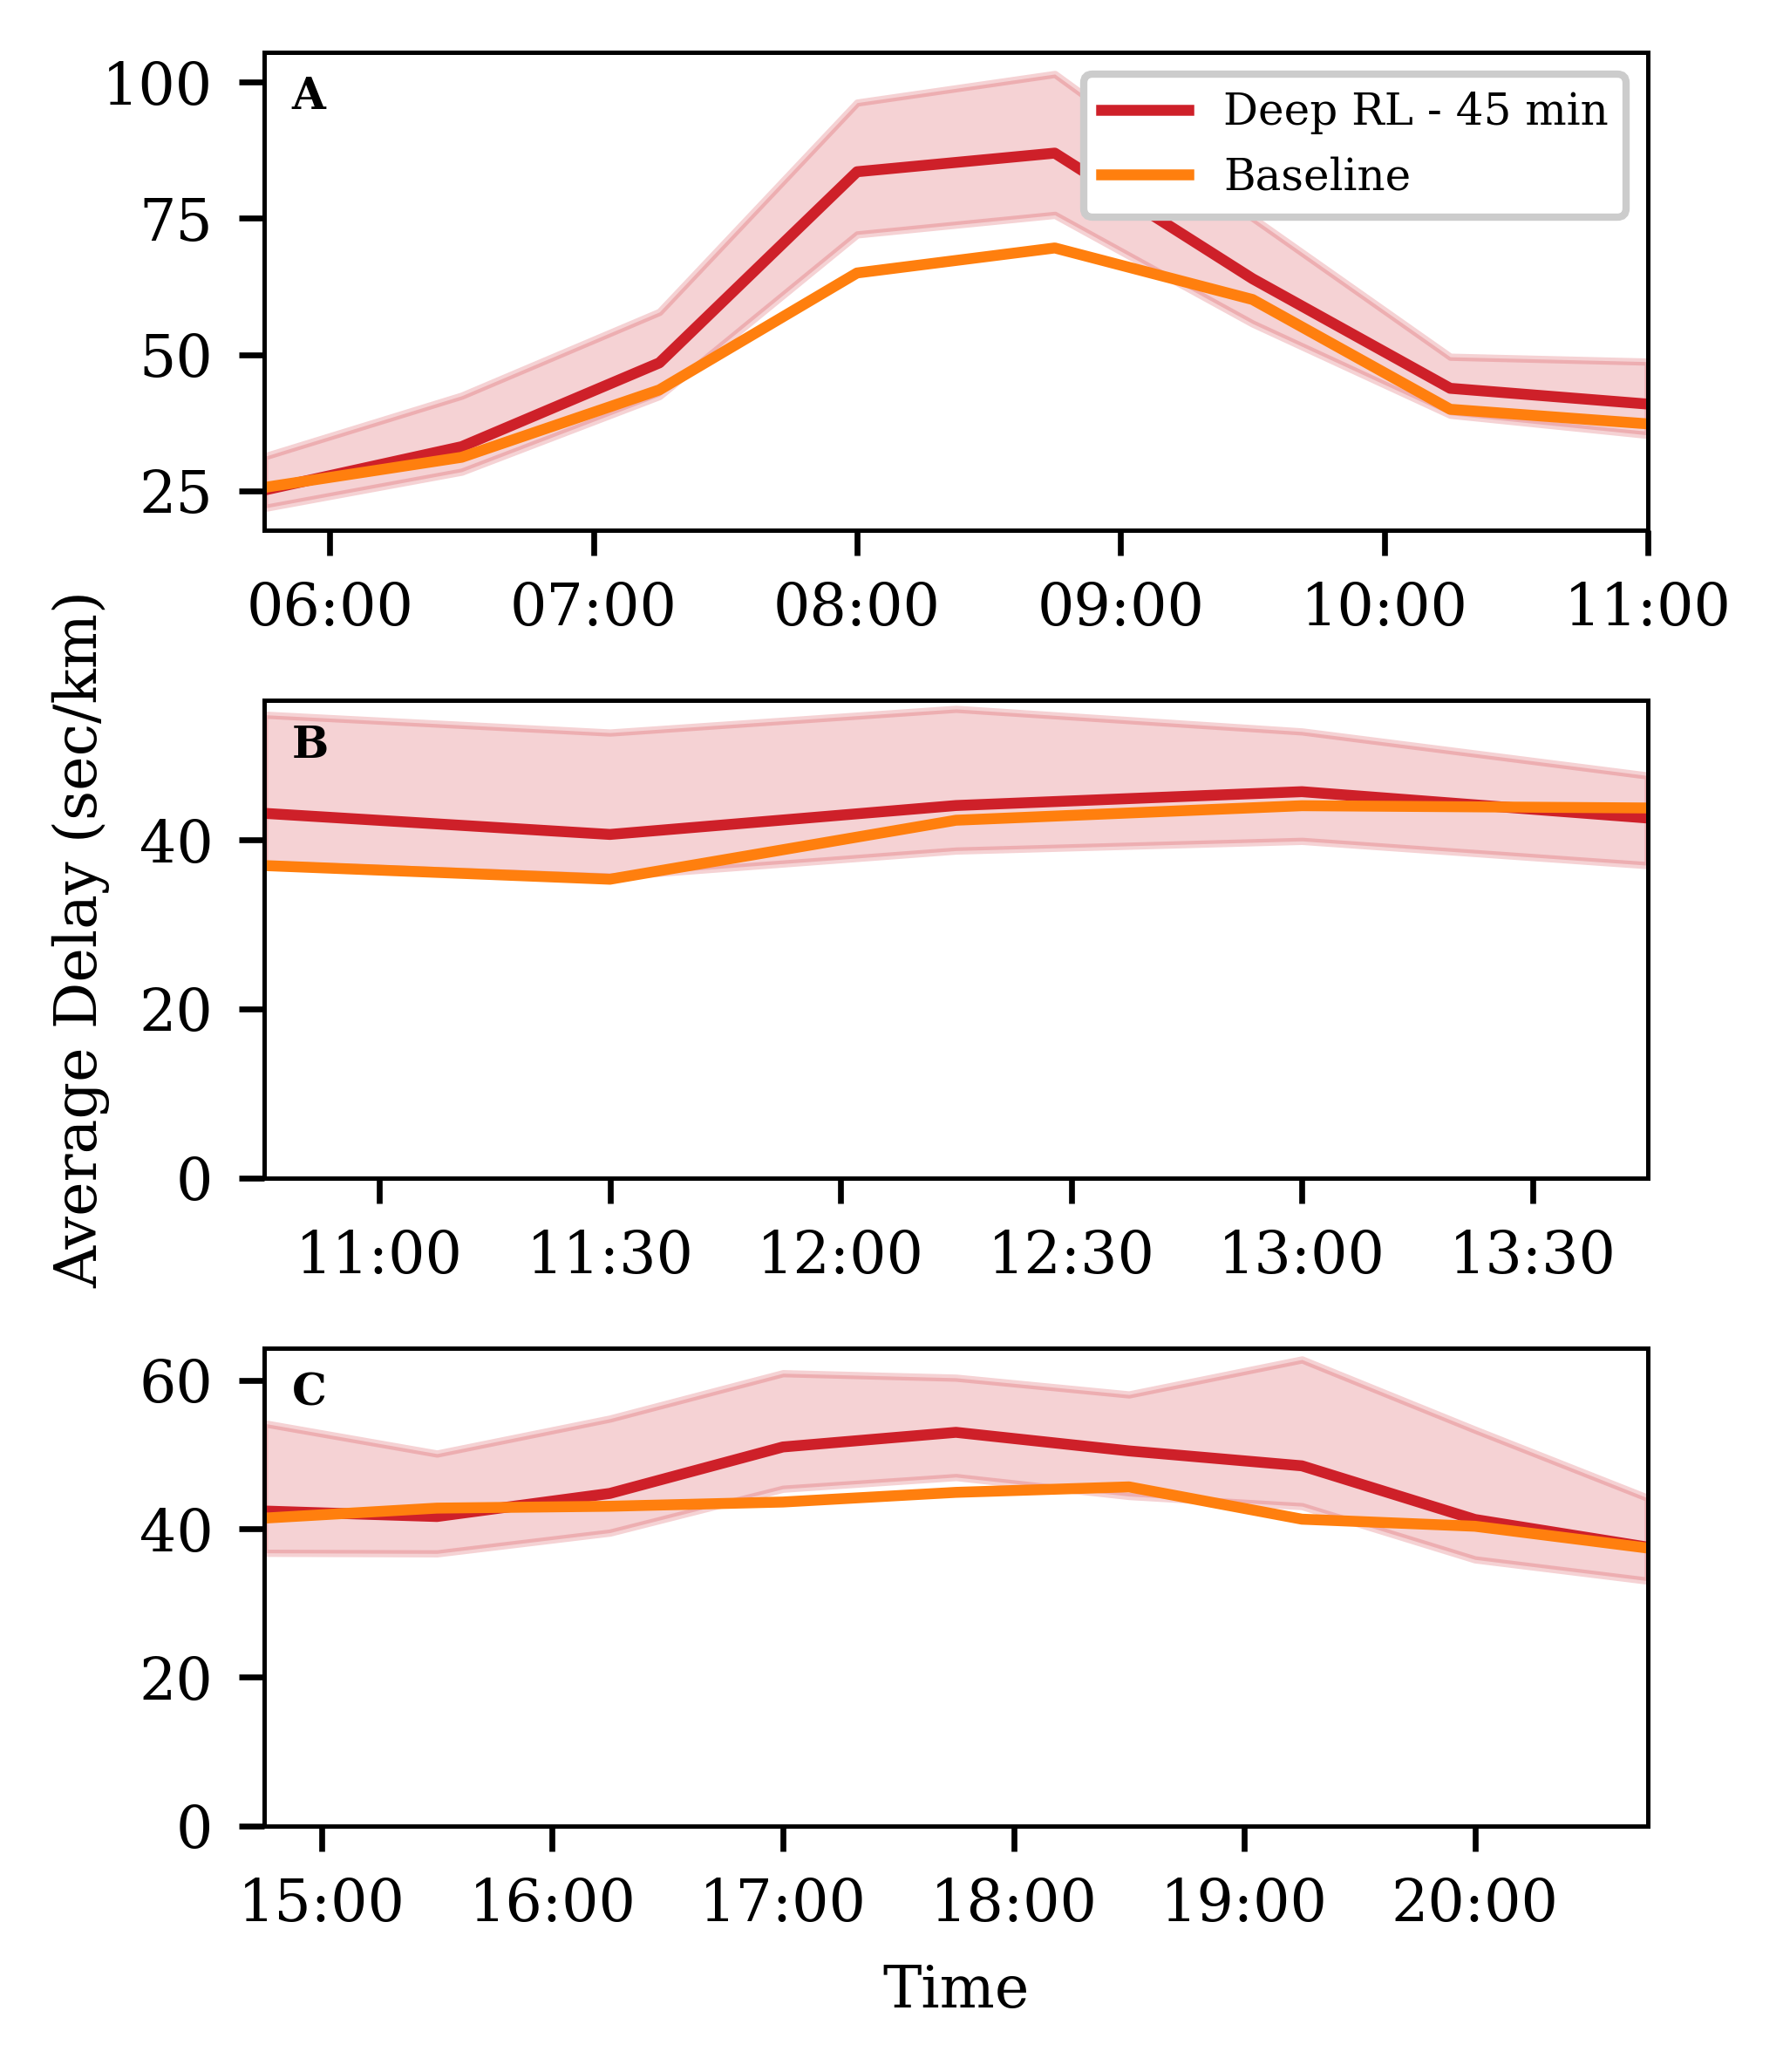

In [10]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(3.45,4), sharex=False)
fmt_xdata = mdates.DateFormatter('%H:%M')
# fig.autofmt_xdate(rotation=0, ha='center')
#AM DELAY PLOT
ax1.plot(AM_delay_policy.time, AM_delay_policy.delay_time, label="Deep RL - 45 min",color='#ce2029')
ax1.fill_between(AM_delay_policy_bands.time, AM_delay_policy_bands['min'], AM_delay_policy_bands['max'], alpha=0.2,color='#ce2029')
ax1.plot(AM_delay_baseline.time, AM_delay_baseline.delay_time, label="Baseline",color='#ff7f0e')
#ax1.fill_between(AM_delay_baseline.time, AM_delay_baseline['min'],AM_delay_baseline['max'], alpha=0.2,color='#ff7f0e')
ax1.legend(loc='best')
# use a more precise date string for the x axis locations
ax1.xaxis.set_major_formatter(fmt_xdata)
ax1.set_xlim(left=min(AM_delay_baseline.time), right=max(AM_delay_baseline.time))
''
#NN DELAY PLOT
ax2.plot(NN_delay_policy.time, NN_delay_policy.delay_time, label="Deep RL",color='#ce2029')
ax2.fill_between(NN_delay_policy_bands.time, NN_delay_policy_bands['min'], NN_delay_policy_bands['max'], alpha=0.2,color='#ce2029')
ax2.plot(NN_delay_baseline.time, NN_delay_baseline.delay_time, label="SYNCHRO",color='#ff7f0e')
#ax2.fill_between(NN_delay_baseline.time, NN_delay_baseline['min'],NN_delay_baseline['max'], alpha=0.2,color='#ff7f0e')

# use a more precise date string for the x axis locations
ax2.xaxis.set_major_formatter(fmt_xdata)
ax2.set_xlim(left=min(NN_delay_baseline.time), right=max(NN_delay_baseline.time))
ax2.set_ylim(0)
ax2.set_ylabel("Average Delay (sec/km)")

#PM DELAY PLOT
ax3.plot(PM_delay_policy.time, PM_delay_policy.delay_time, label="Deep RL",color='#ce2029')
ax3.fill_between(PM_delay_policy_bands.time, PM_delay_policy_bands['min'], PM_delay_policy_bands['max'], alpha=0.2,color='#ce2029')
ax3.plot(PM_delay_baseline.time, PM_delay_baseline.delay_time, label="SYNCHRO",color='#ff7f0e')
#ax3.fill_between(PM_delay_baseline.time, PM_delay_baseline['min'],PM_delay_baseline['max'], alpha=0.2,color='#ff7f0e')

# use a more precise date string for the x axis locations
ax3.xaxis.set_major_formatter(fmt_xdata)
ax3.set_xlim(left=min(PM_delay_baseline.time), right=max(PM_delay_baseline.time))
ax3.set_xlabel("Time")
ax3.set_ylim(0)
#ax.set_ylabel("Average Delay (sec/km)")

for ax, label in zip([ax1,ax2,ax3],["A","B","C"]):
    ax.text(0.02, 0.95, label, transform=ax.transAxes, fontsize=6,
            verticalalignment='top', horizontalalignment='left',fontweight='bold') # DeBold Sinas
fig.tight_layout()
#fig.savefig("images/delays.pdf", bbox_inches='tight')


In [81]:
delay_policy_bands = delay_policy.add_columns

TypeError: 'method' object is not subscriptable

In [72]:
view=pd.read_csv('data/50/data/baseline_replication_8050322.csv')

In [73]:
view['simtime'] = pd.to_datetime(pd.to_timedelta(view['time'],unit='seconds') + pd.to_datetime(datetime.date.today())+ pd.to_timedelta(14, unit='hours'))


In [74]:
view

time   density  stop_time      speed  delay_time  travel_time  \
0       900  4.929852  31.990553  40.885470     41.0098      97.9792   
1      1800  5.524136  32.055482  40.140131     41.7962      98.9361   
2       900  4.852010  33.230727  40.004371     42.8878     100.1861   
3      2700  5.501605  33.772903  39.862338     43.5630     100.5459   
4      1800  5.463651  30.956568  40.965206     40.2878      97.6396   
...     ...       ...        ...        ...         ...          ...   
1423  25200  3.549462  25.830504  42.850309     34.3800      91.2519   
1424  24300  3.795270  32.609623  40.610986     42.0711      98.8976   
1425  24300  3.614643  27.582273  42.409474     36.2893      93.4442   
1426  25200  3.722515  26.745710  42.517551     35.4017      92.3448   
1427  25200  3.365585  23.977378  44.070016     32.0607      88.9434   

      mean_queue  seed             simtime  
0        52.9493  3307 2021-06-20 14:15:00  
1        59.4213  3307 2021-06-20 14:30:00  
2        53.2996  6069 2021-06-20 14:15:00  
3        59.4080  3307 2021-06-20 14:45:00  
4        57.7227  6069 2021-06-20 14:30:00  
...          ...   ...                 ...  
1423     33.5609  3709 2021-06-20 21:00:00  
1424     40.4142  3523 2021-06-20 20:45:00  
1425     35.5422  4626 2021-06-20 20:45:00  
1426     36.0187  3523 2021-06-20 21:00:00  
1427     31.3129  4626 2021-06-20 21:00:00  

[1428 rows x 9 columns]

In [43]:
nexti=view.resample("30min",on='simtime').mean()

In [44]:
len(nexti)

15

In [49]:
view['delay_time']/view['travel_time']

0       0.418556
1       0.422457
2       0.428081
3       0.433265
4       0.412617
          ...   
1423    0.376759
1424    0.425401
1425    0.388353
1426    0.383364
1427    0.360462
Length: 1428, dtype: float64

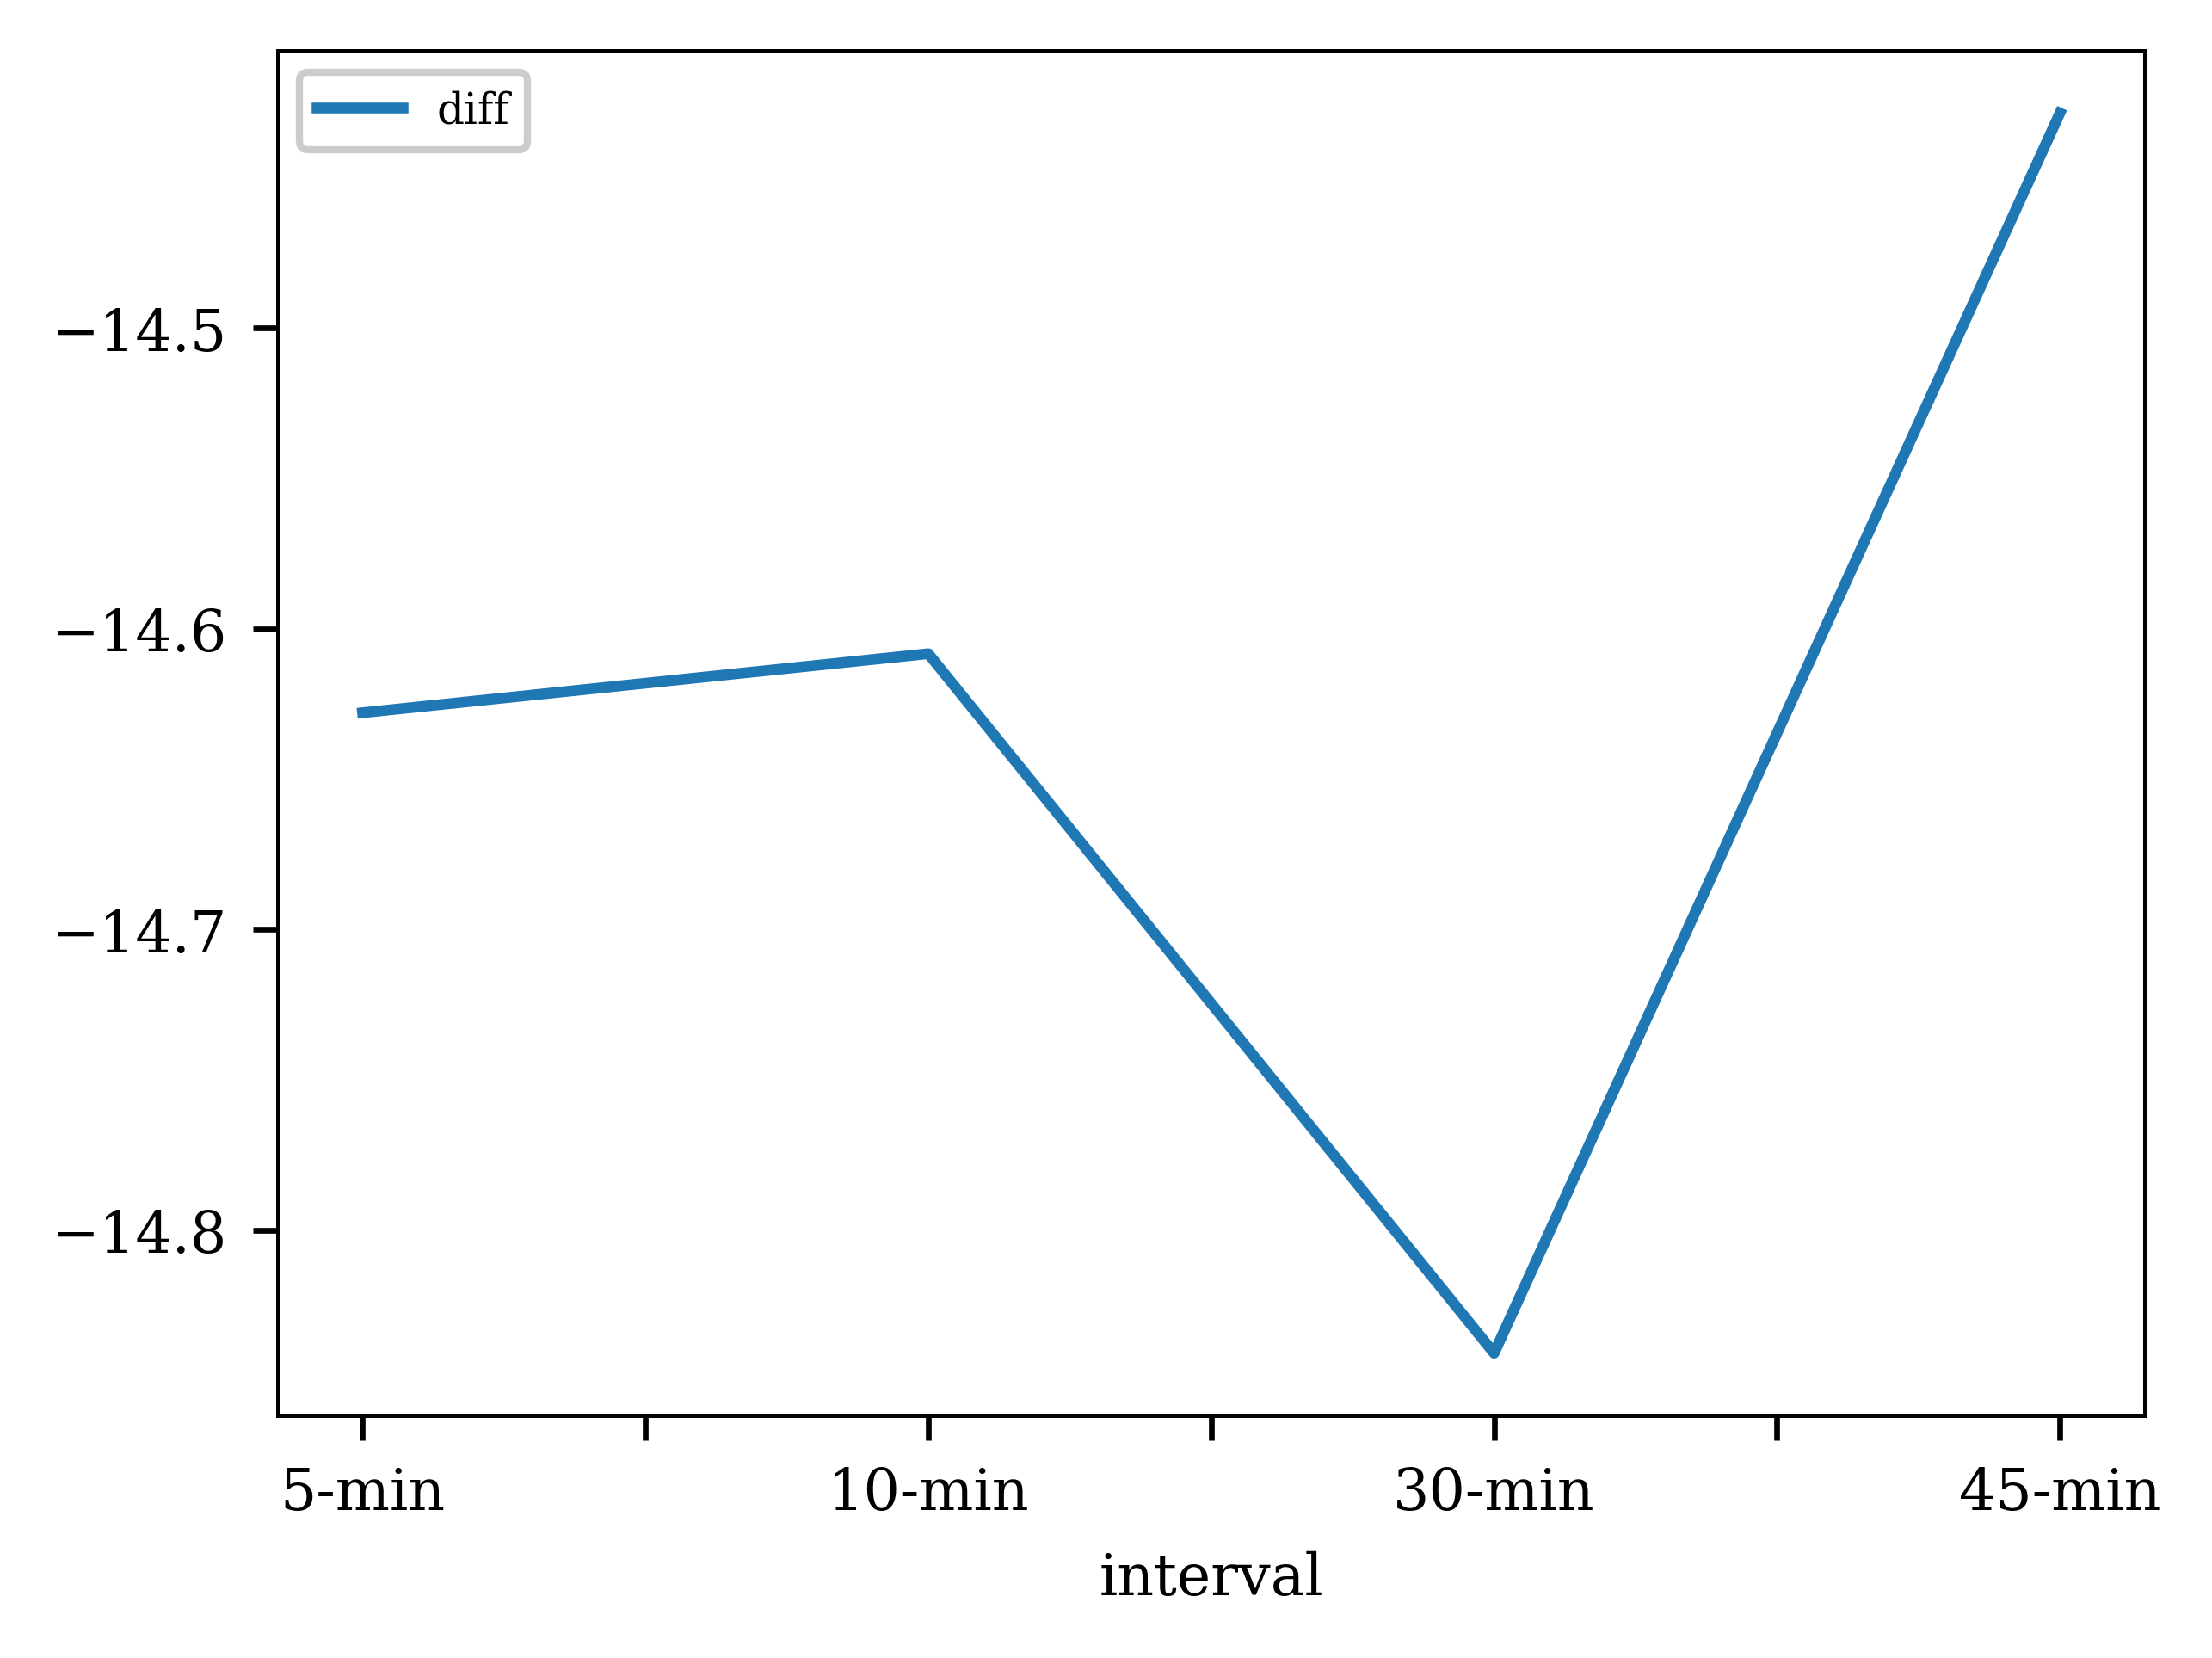

In [6]:
replication_id = {'AM','Noon','PM'}
intervals = {'data':"15-min",'data_10':'10-min','data_5':'5-min','data_30':'30-min','data_45':'45-min'}

data_to_plot = pd.DataFrame(columns = ['interval','ave_baseline','ave_deepRL'])
    
data_to_plot['interval'] = ['5-min','10-min','30-min','45-min']
data_to_plot['ave_deepRL'] = [pd.read_csv('data/50/%s/output_AM.csv'%i)['delay_time'].mean() for i in ['data_10','data_5','data_30','data_45']]
data_to_plot['ave_baseline'] = [pd.read_csv('data/50/%s/baseline_replication_8050297.csv'%i)['delay_time'].mean() for i in ['data_10','data_5','data_30','data_45']]
data_to_plot['diff'] = (data_to_plot['ave_baseline']  - data_to_plot['ave_deepRL'])*100/data_to_plot['ave_baseline']

data_to_plot.plot(x='interval',y='diff')
data_to_plot.to_csv('data/wahaha_AM.csv')

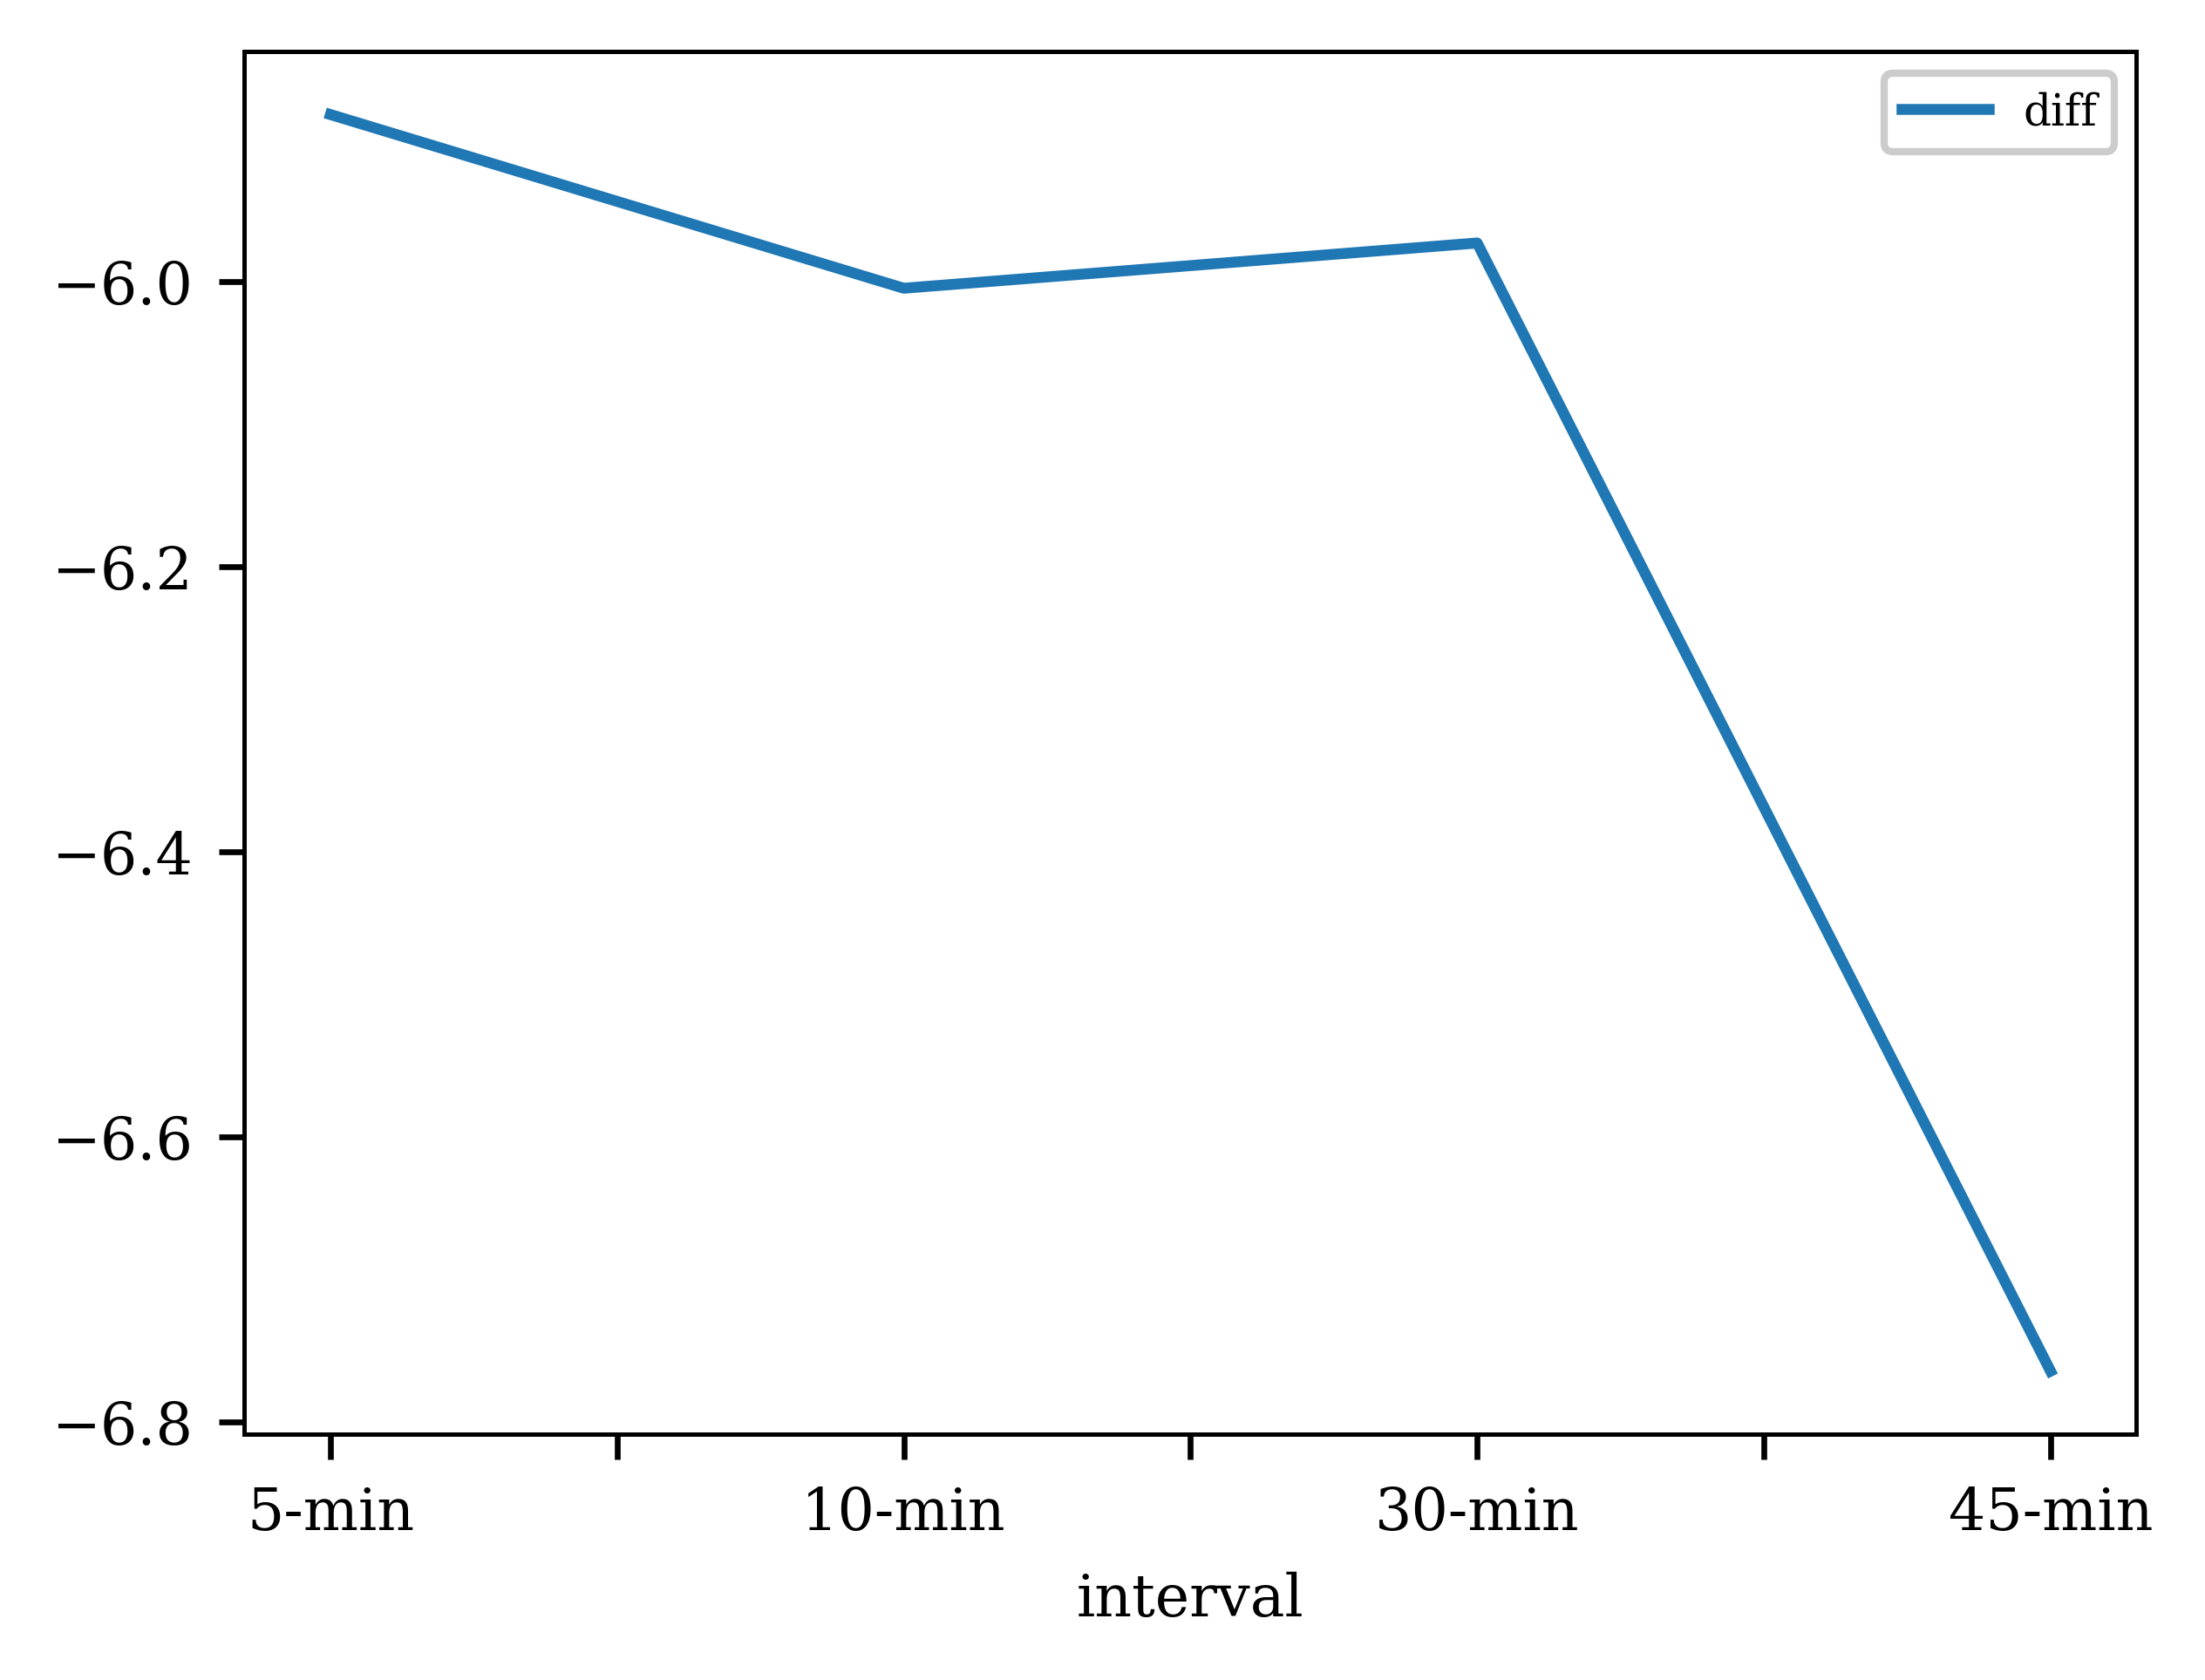

In [7]:
replication_id = {'AM','Noon','PM'}
intervals = {'data':"15-min",'data_10':'10-min','data_5':'5-min','data_30':'30-min','data_45':'45-min'}

data_to_plot = pd.DataFrame(columns = ['interval','ave_baseline','ave_deepRL'])
    
data_to_plot['interval'] = ['5-min','10-min','30-min','45-min']
data_to_plot['ave_deepRL'] = [pd.read_csv('data/50/%s/output_NN.csv'%i)['delay_time'].mean() for i in ['data_10','data_5','data_30','data_45']]
data_to_plot['ave_baseline'] = [pd.read_csv('data/50/%s/baseline_replication_8050315.csv'%i)['delay_time'].mean() for i in ['data_10','data_5','data_30','data_45']]
data_to_plot['diff'] = (data_to_plot['ave_baseline']  - data_to_plot['ave_deepRL'])*100/data_to_plot['ave_baseline']

data_to_plot.plot(x='interval',y='diff')
data_to_plot.to_csv('data/wahaha_NN.csv')

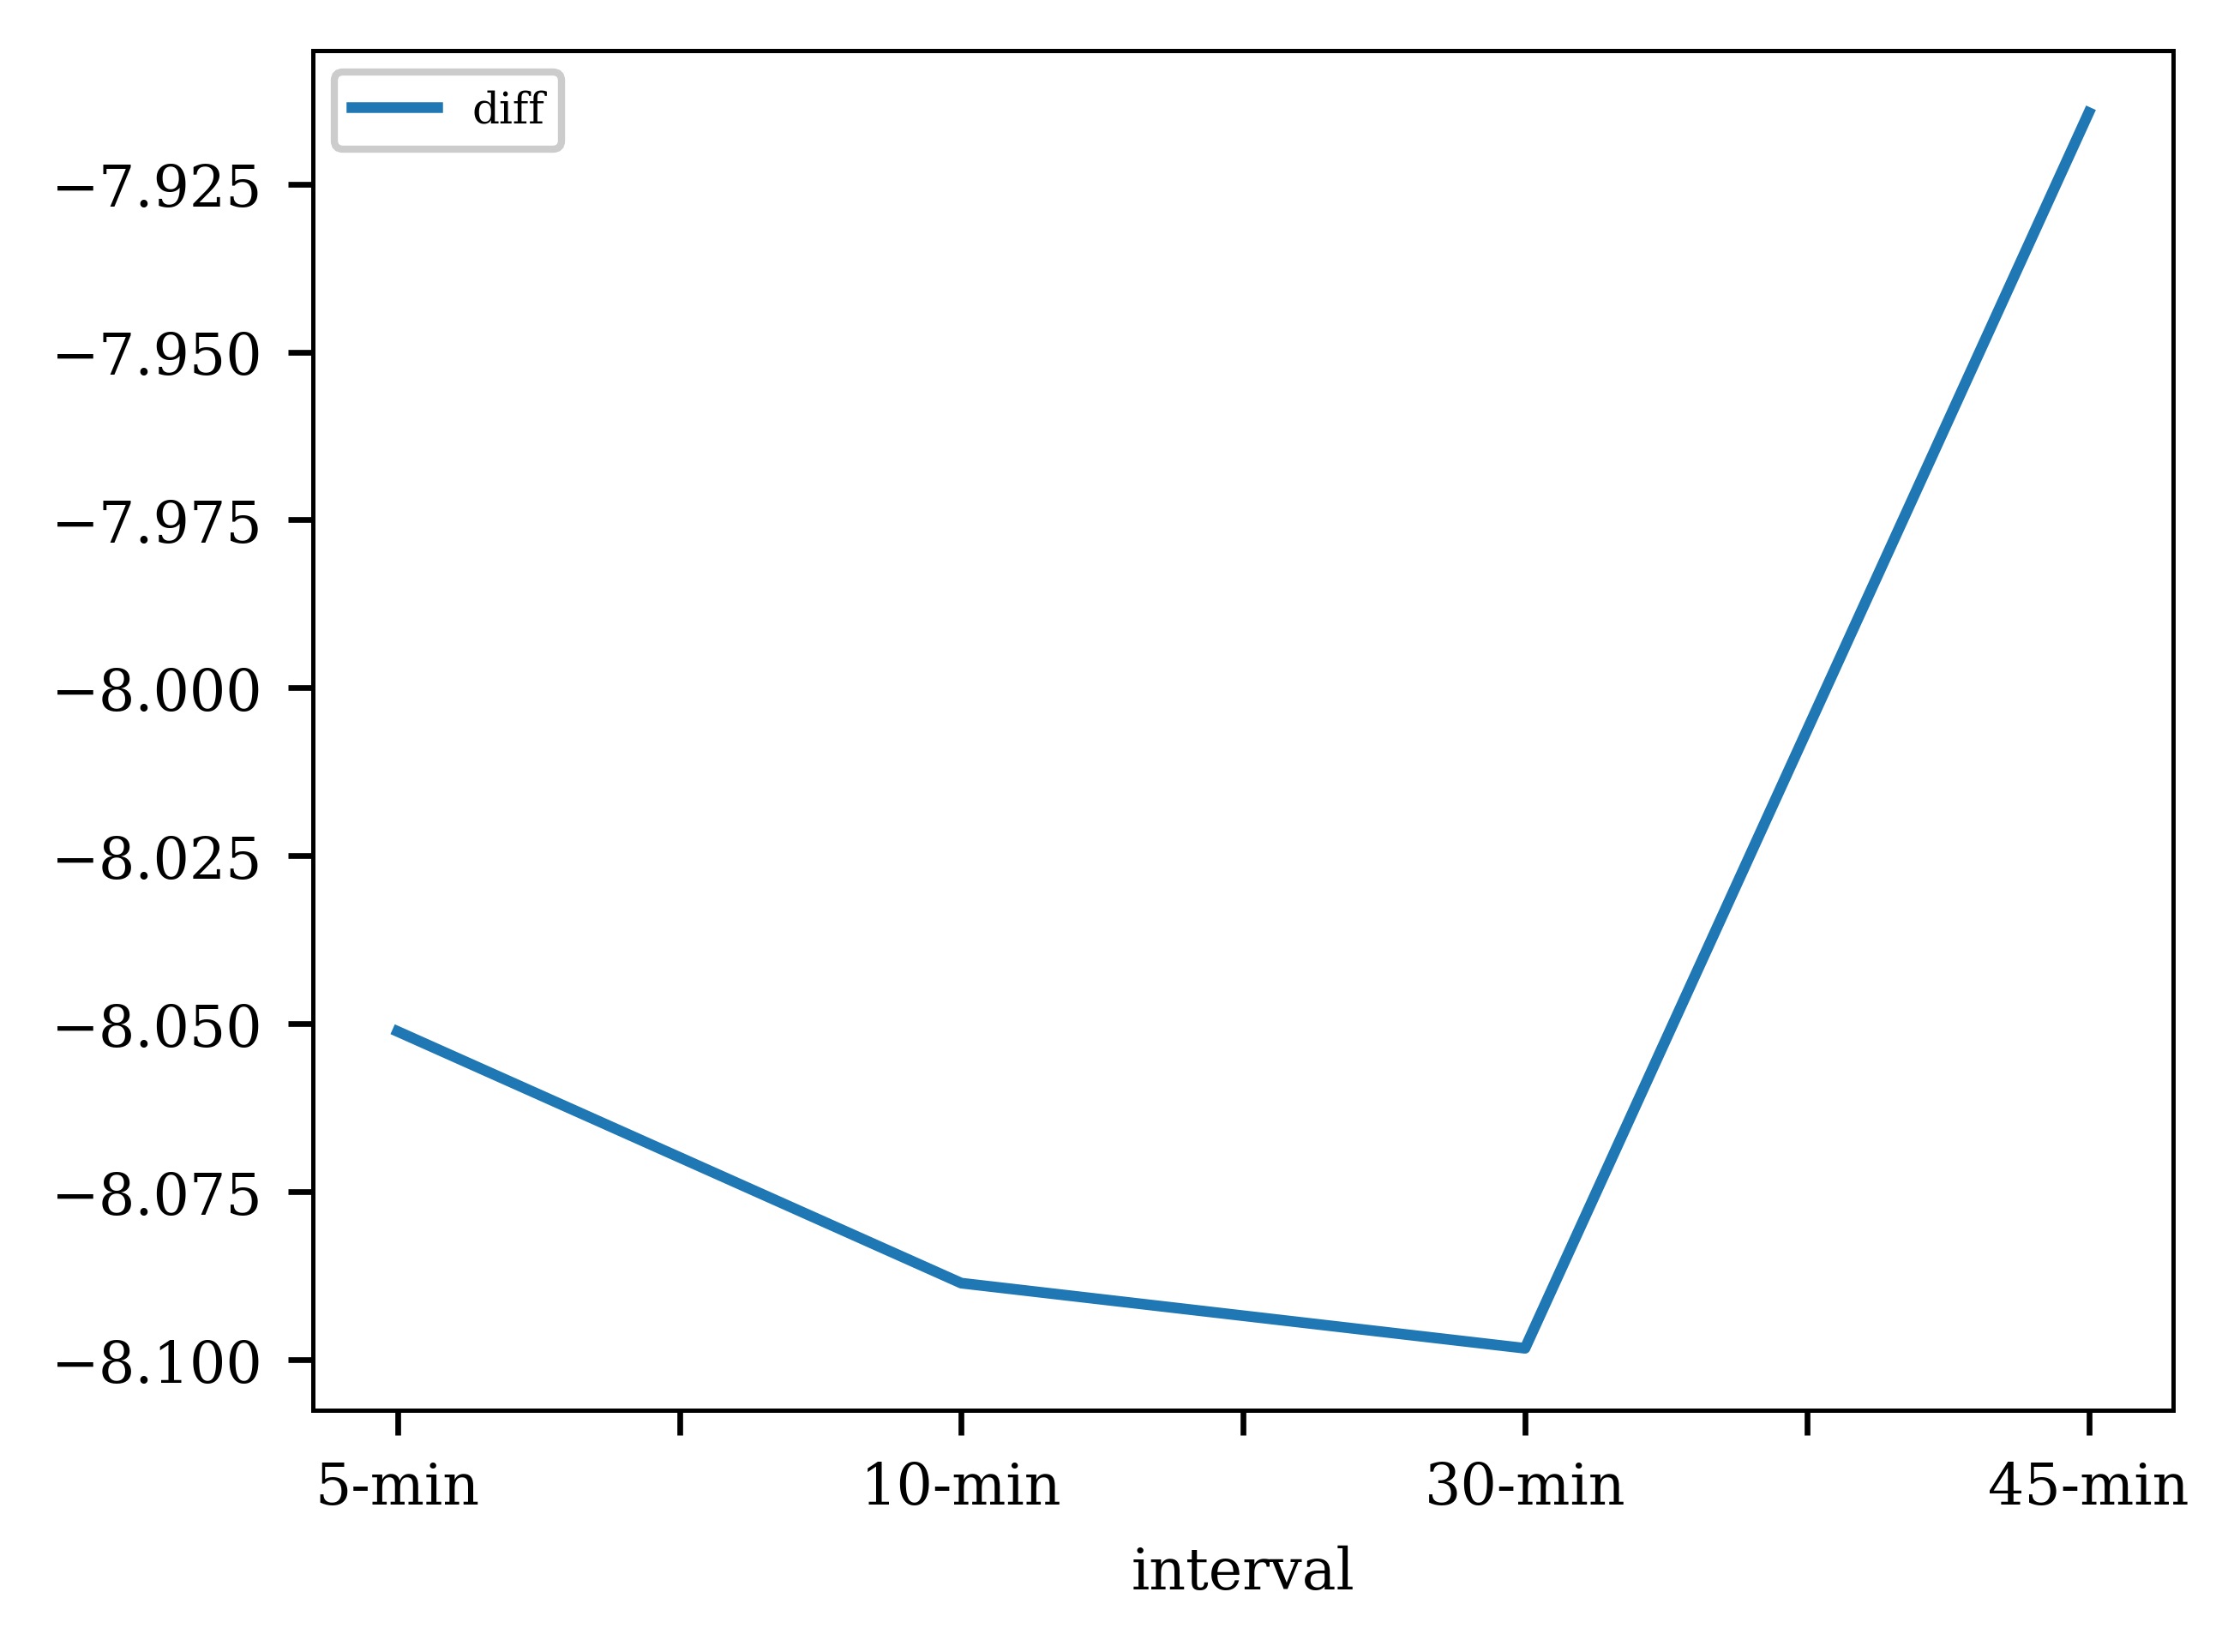

In [8]:
eplication_id = {'AM','Noon','PM'}
intervals = {'data':"15-min",'data_10':'10-min','data_5':'5-min','data_30':'30-min','data_45':'45-min'}

data_to_plot = pd.DataFrame(columns = ['interval','ave_baseline','ave_deepRL'])
    
data_to_plot['interval'] = ['5-min','10-min','30-min','45-min']
data_to_plot['ave_deepRL'] = [pd.read_csv('data/50/%s/output_PM.csv'%i)['delay_time'].mean() for i in ['data_10','data_5','data_30','data_45']]
data_to_plot['ave_baseline'] = [pd.read_csv('data/50/%s/baseline_replication_8050322.csv'%i)['delay_time'].mean() for i in ['data_10','data_5','data_30','data_45']]
data_to_plot['diff'] = (data_to_plot['ave_baseline']  - data_to_plot['ave_deepRL'])*100/data_to_plot['ave_baseline']

data_to_plot.plot(x='interval',y='diff')
data_to_plot.to_csv('data/wahaha_PM.csv')

In [101]:
x= [pd.read_csv('data/50/%s/output_AM.csv'%i)['delay_time'].mean() for i in ['data_10','data_5','data_30','data_45']]

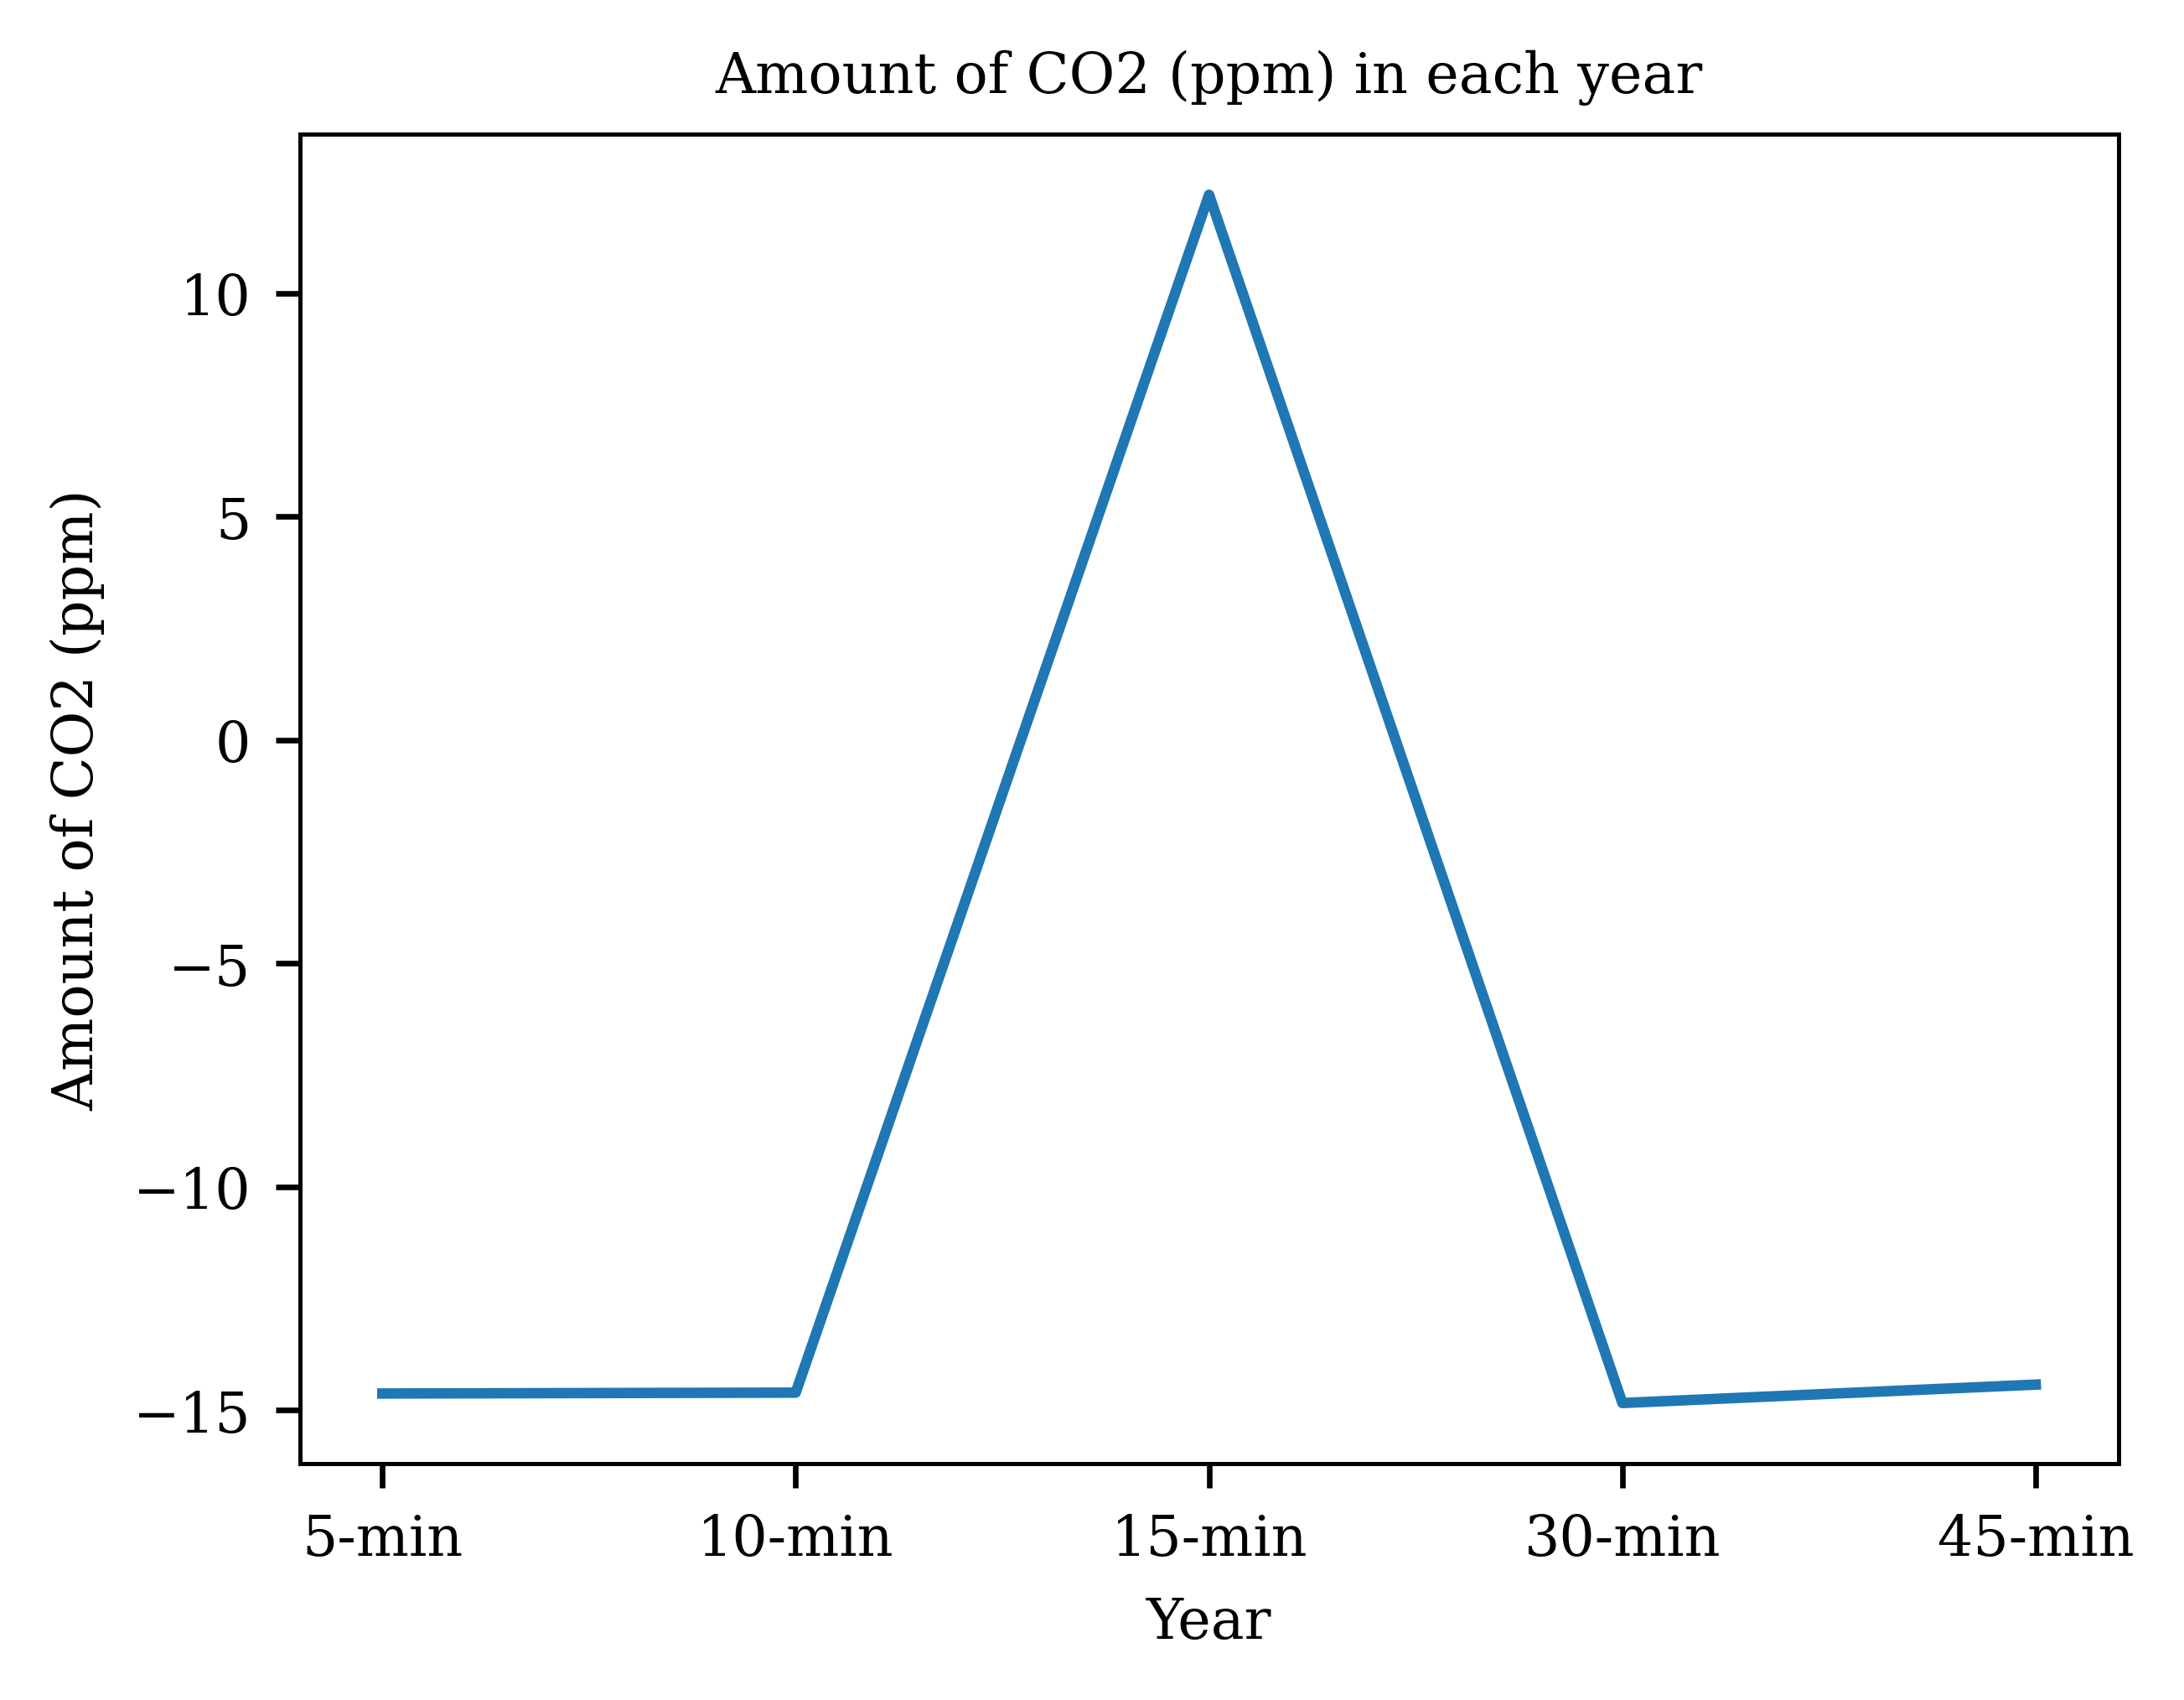

In [122]:
x = pd.read_csv('data/wahaha.csv')
fig, ax = plt.subplots()
ax.plot(x['interval'], x['diff'])
ax.set(title='Amount of CO2 (ppm) in each year', xlabel='Year', 
       ylabel='Amount of CO2 (ppm)');

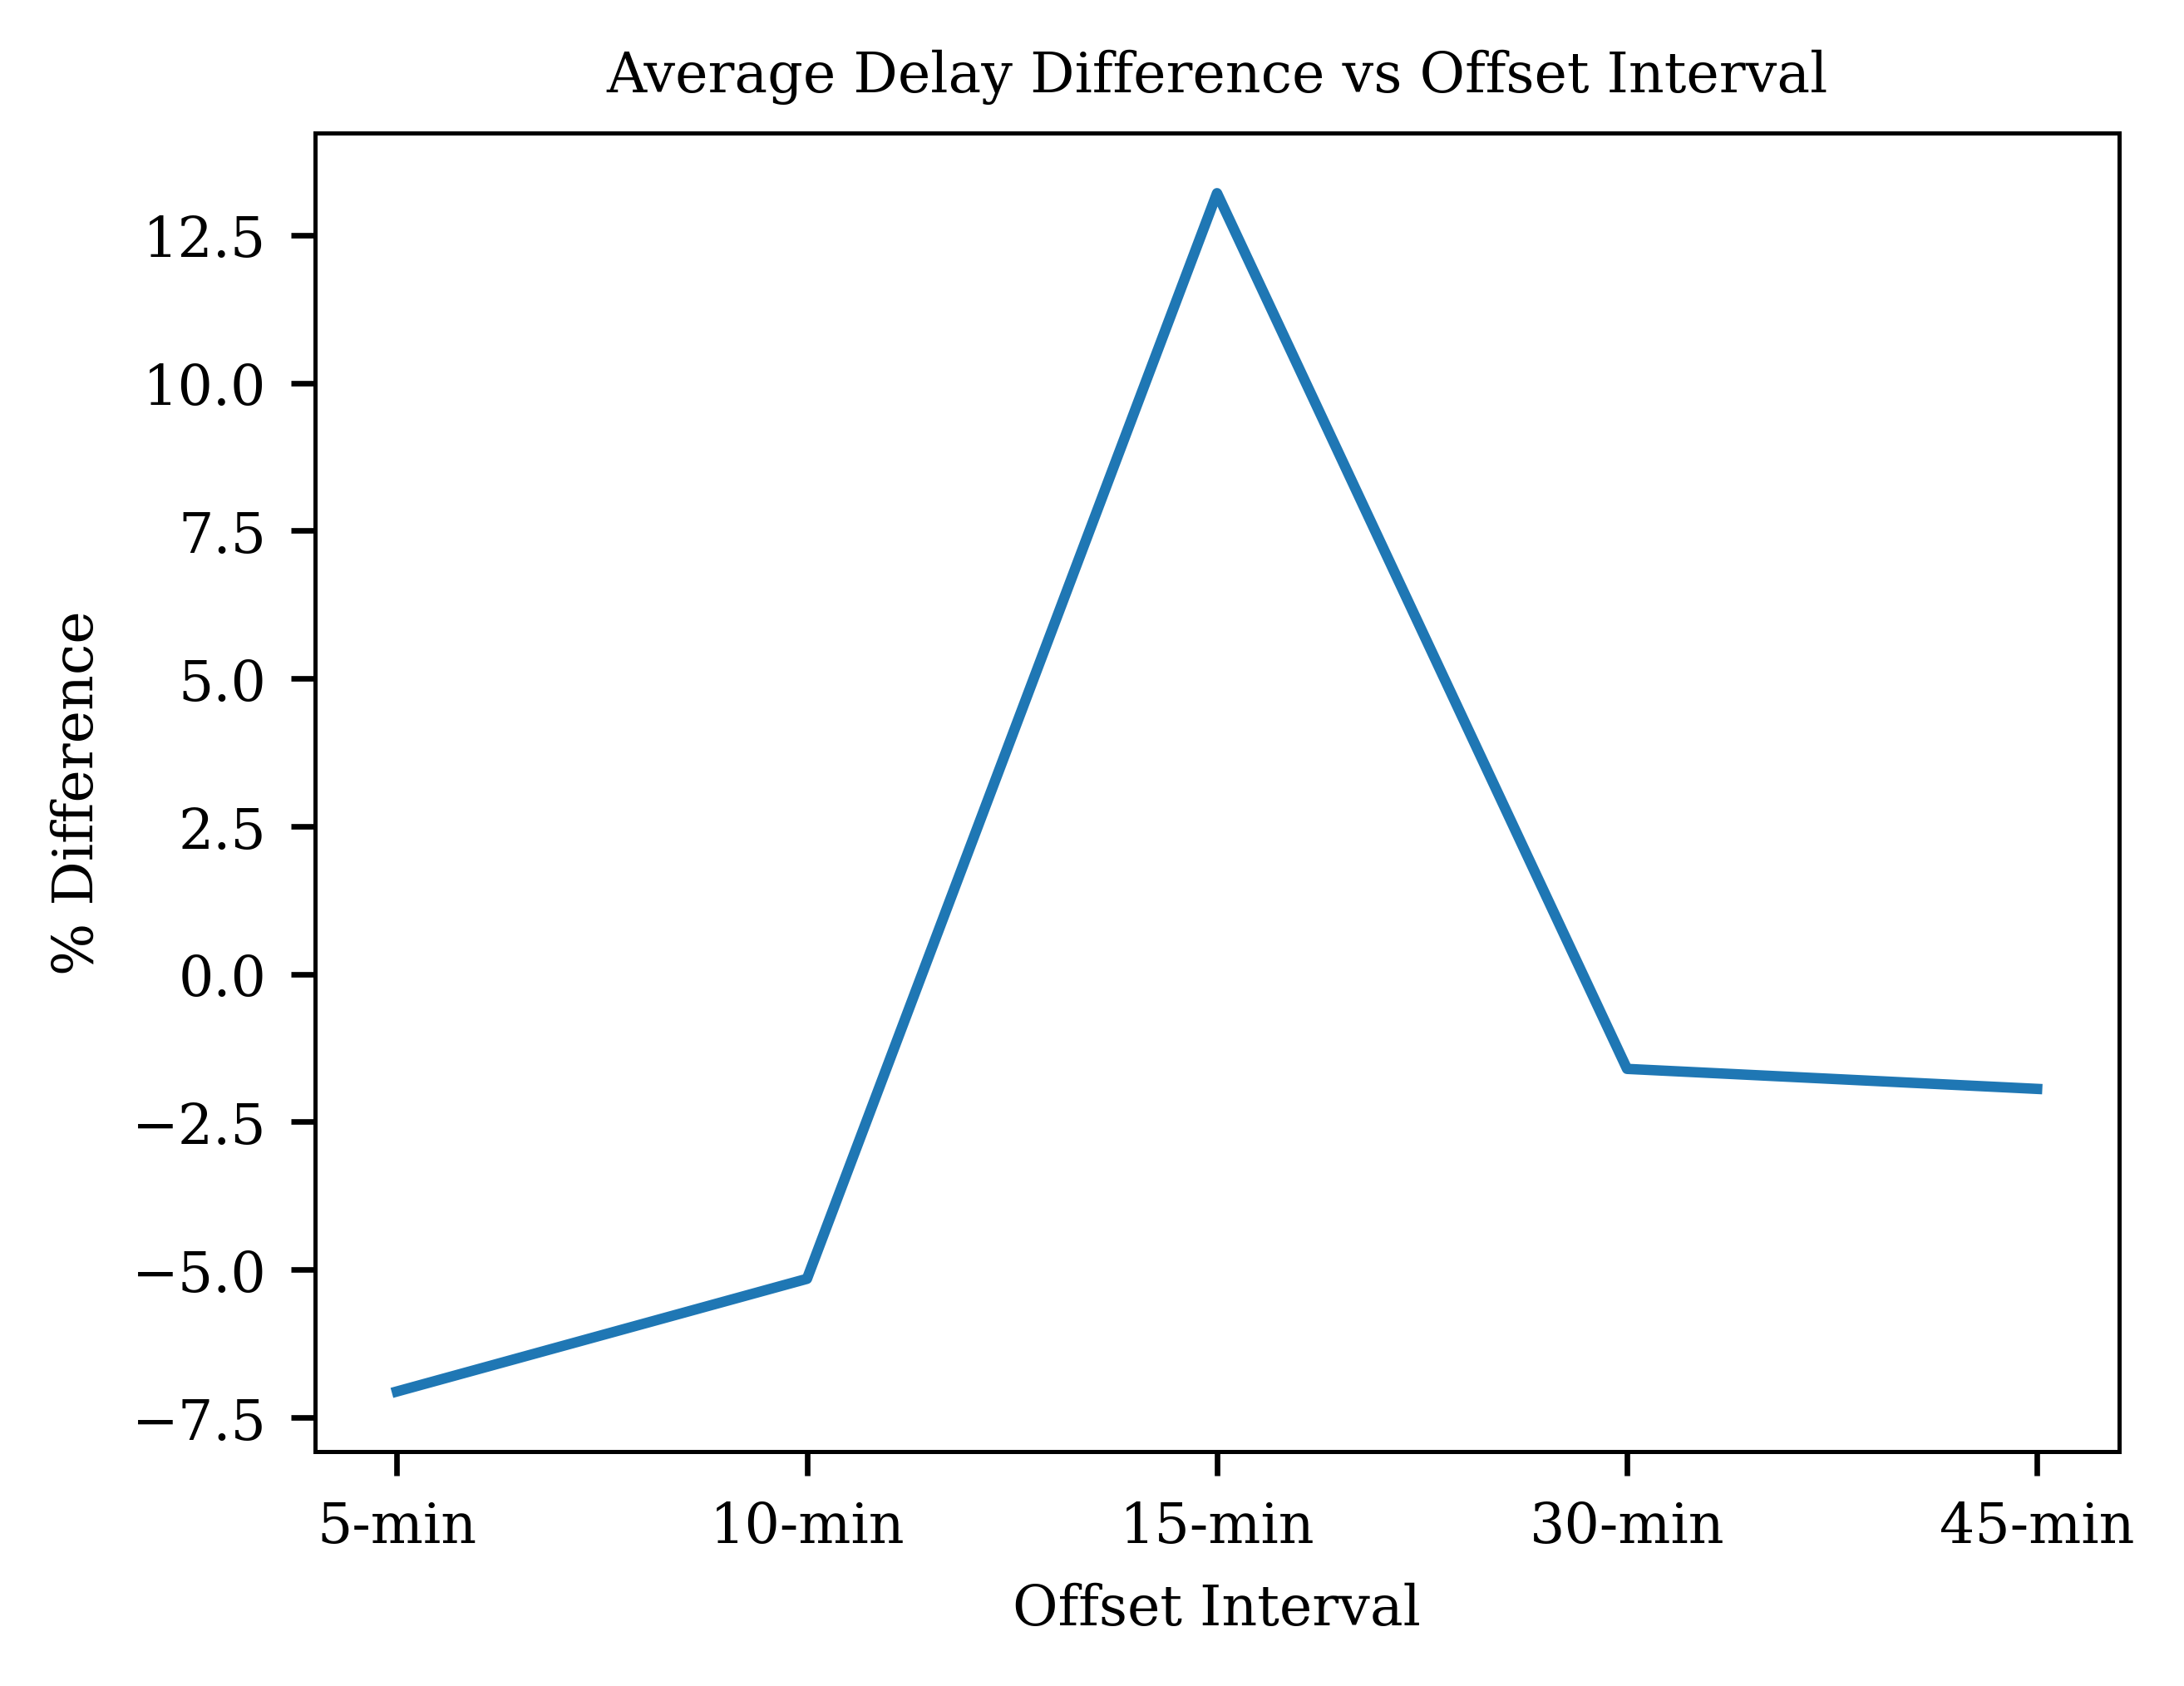

In [12]:
x = pd.read_csv('data/wahaha_AM_1.csv')
x['diff'] = (x['ave_baseline'] - x['ave_deepRL'])*100/x['ave_baseline']
fig, ax = plt.subplots()
ax.plot(x['interval'], x['diff'])
ax.set(title='Average Delay Difference vs Offset Interval', xlabel='Offset Interval', 
       ylabel='% Difference');

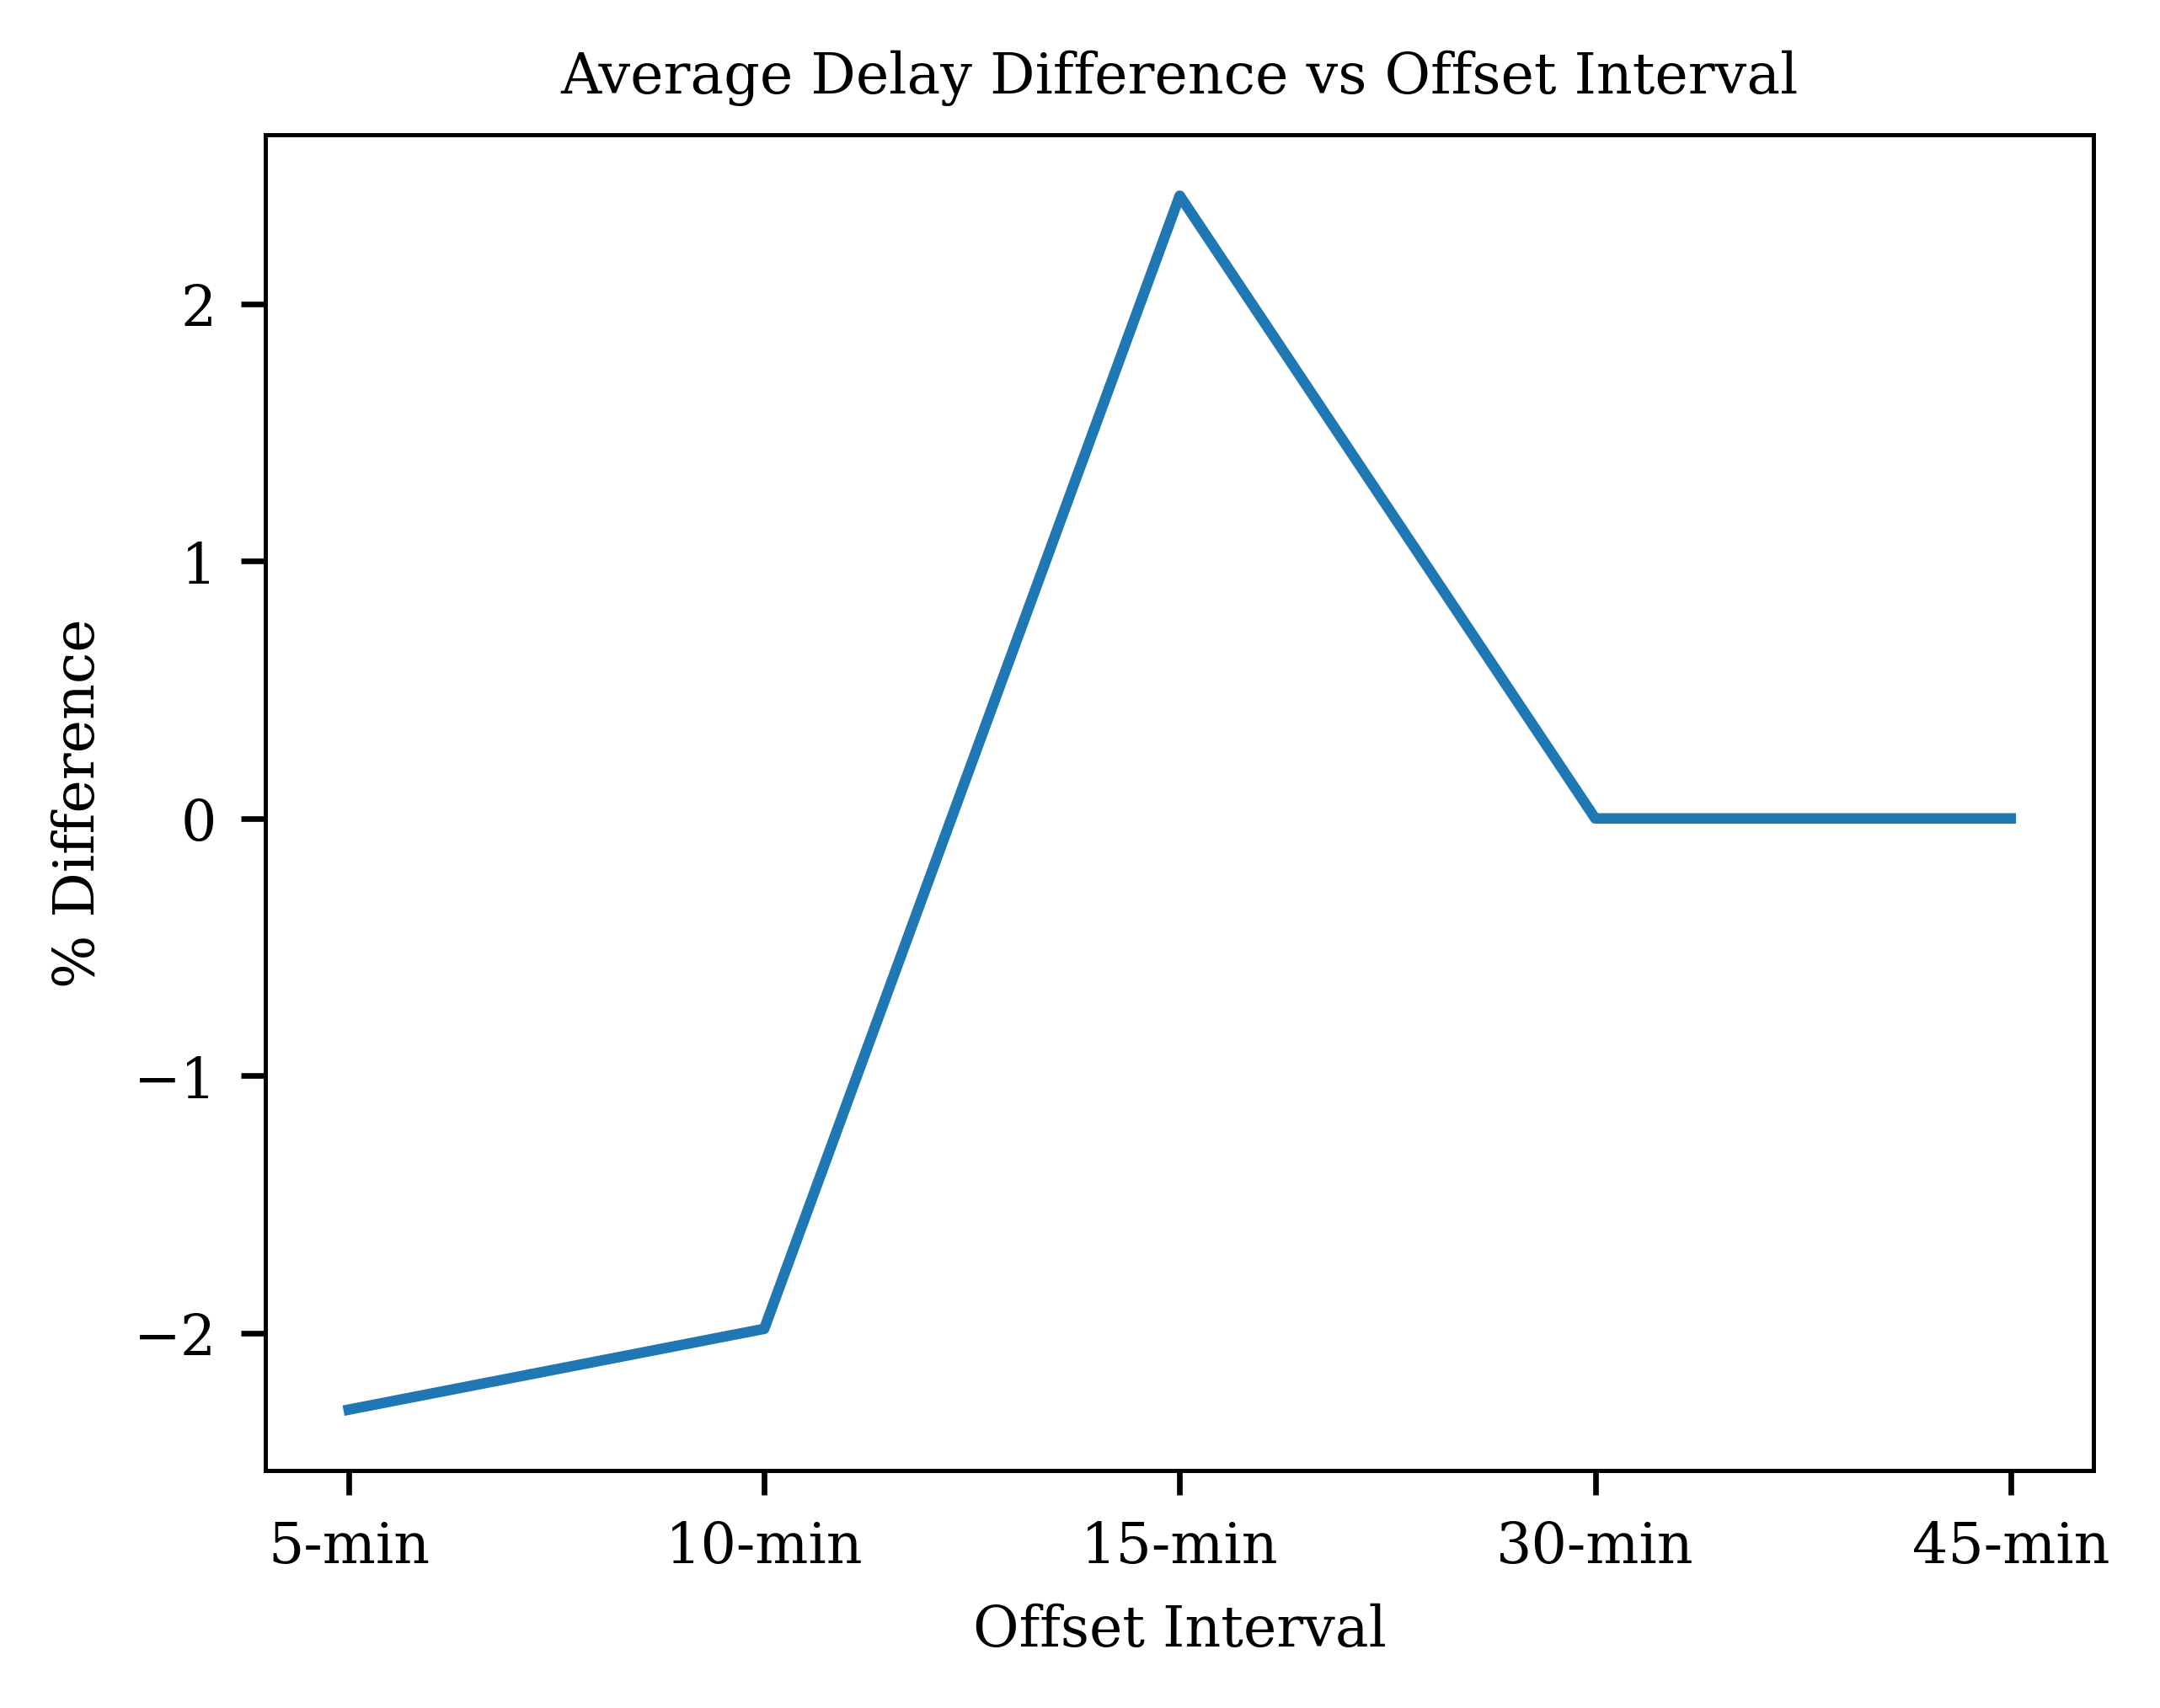

In [13]:
x = pd.read_csv('data/wahaha_NN_1.csv')
x['diff'] = (x['ave_baseline'] - x['ave_deepRL'])*100/x['ave_baseline']
fig, ax = plt.subplots()
ax.plot(x['interval'], x['diff'])
ax.set(title='Average Delay Difference vs Offset Interval', xlabel='Offset Interval', 
       ylabel='% Difference');

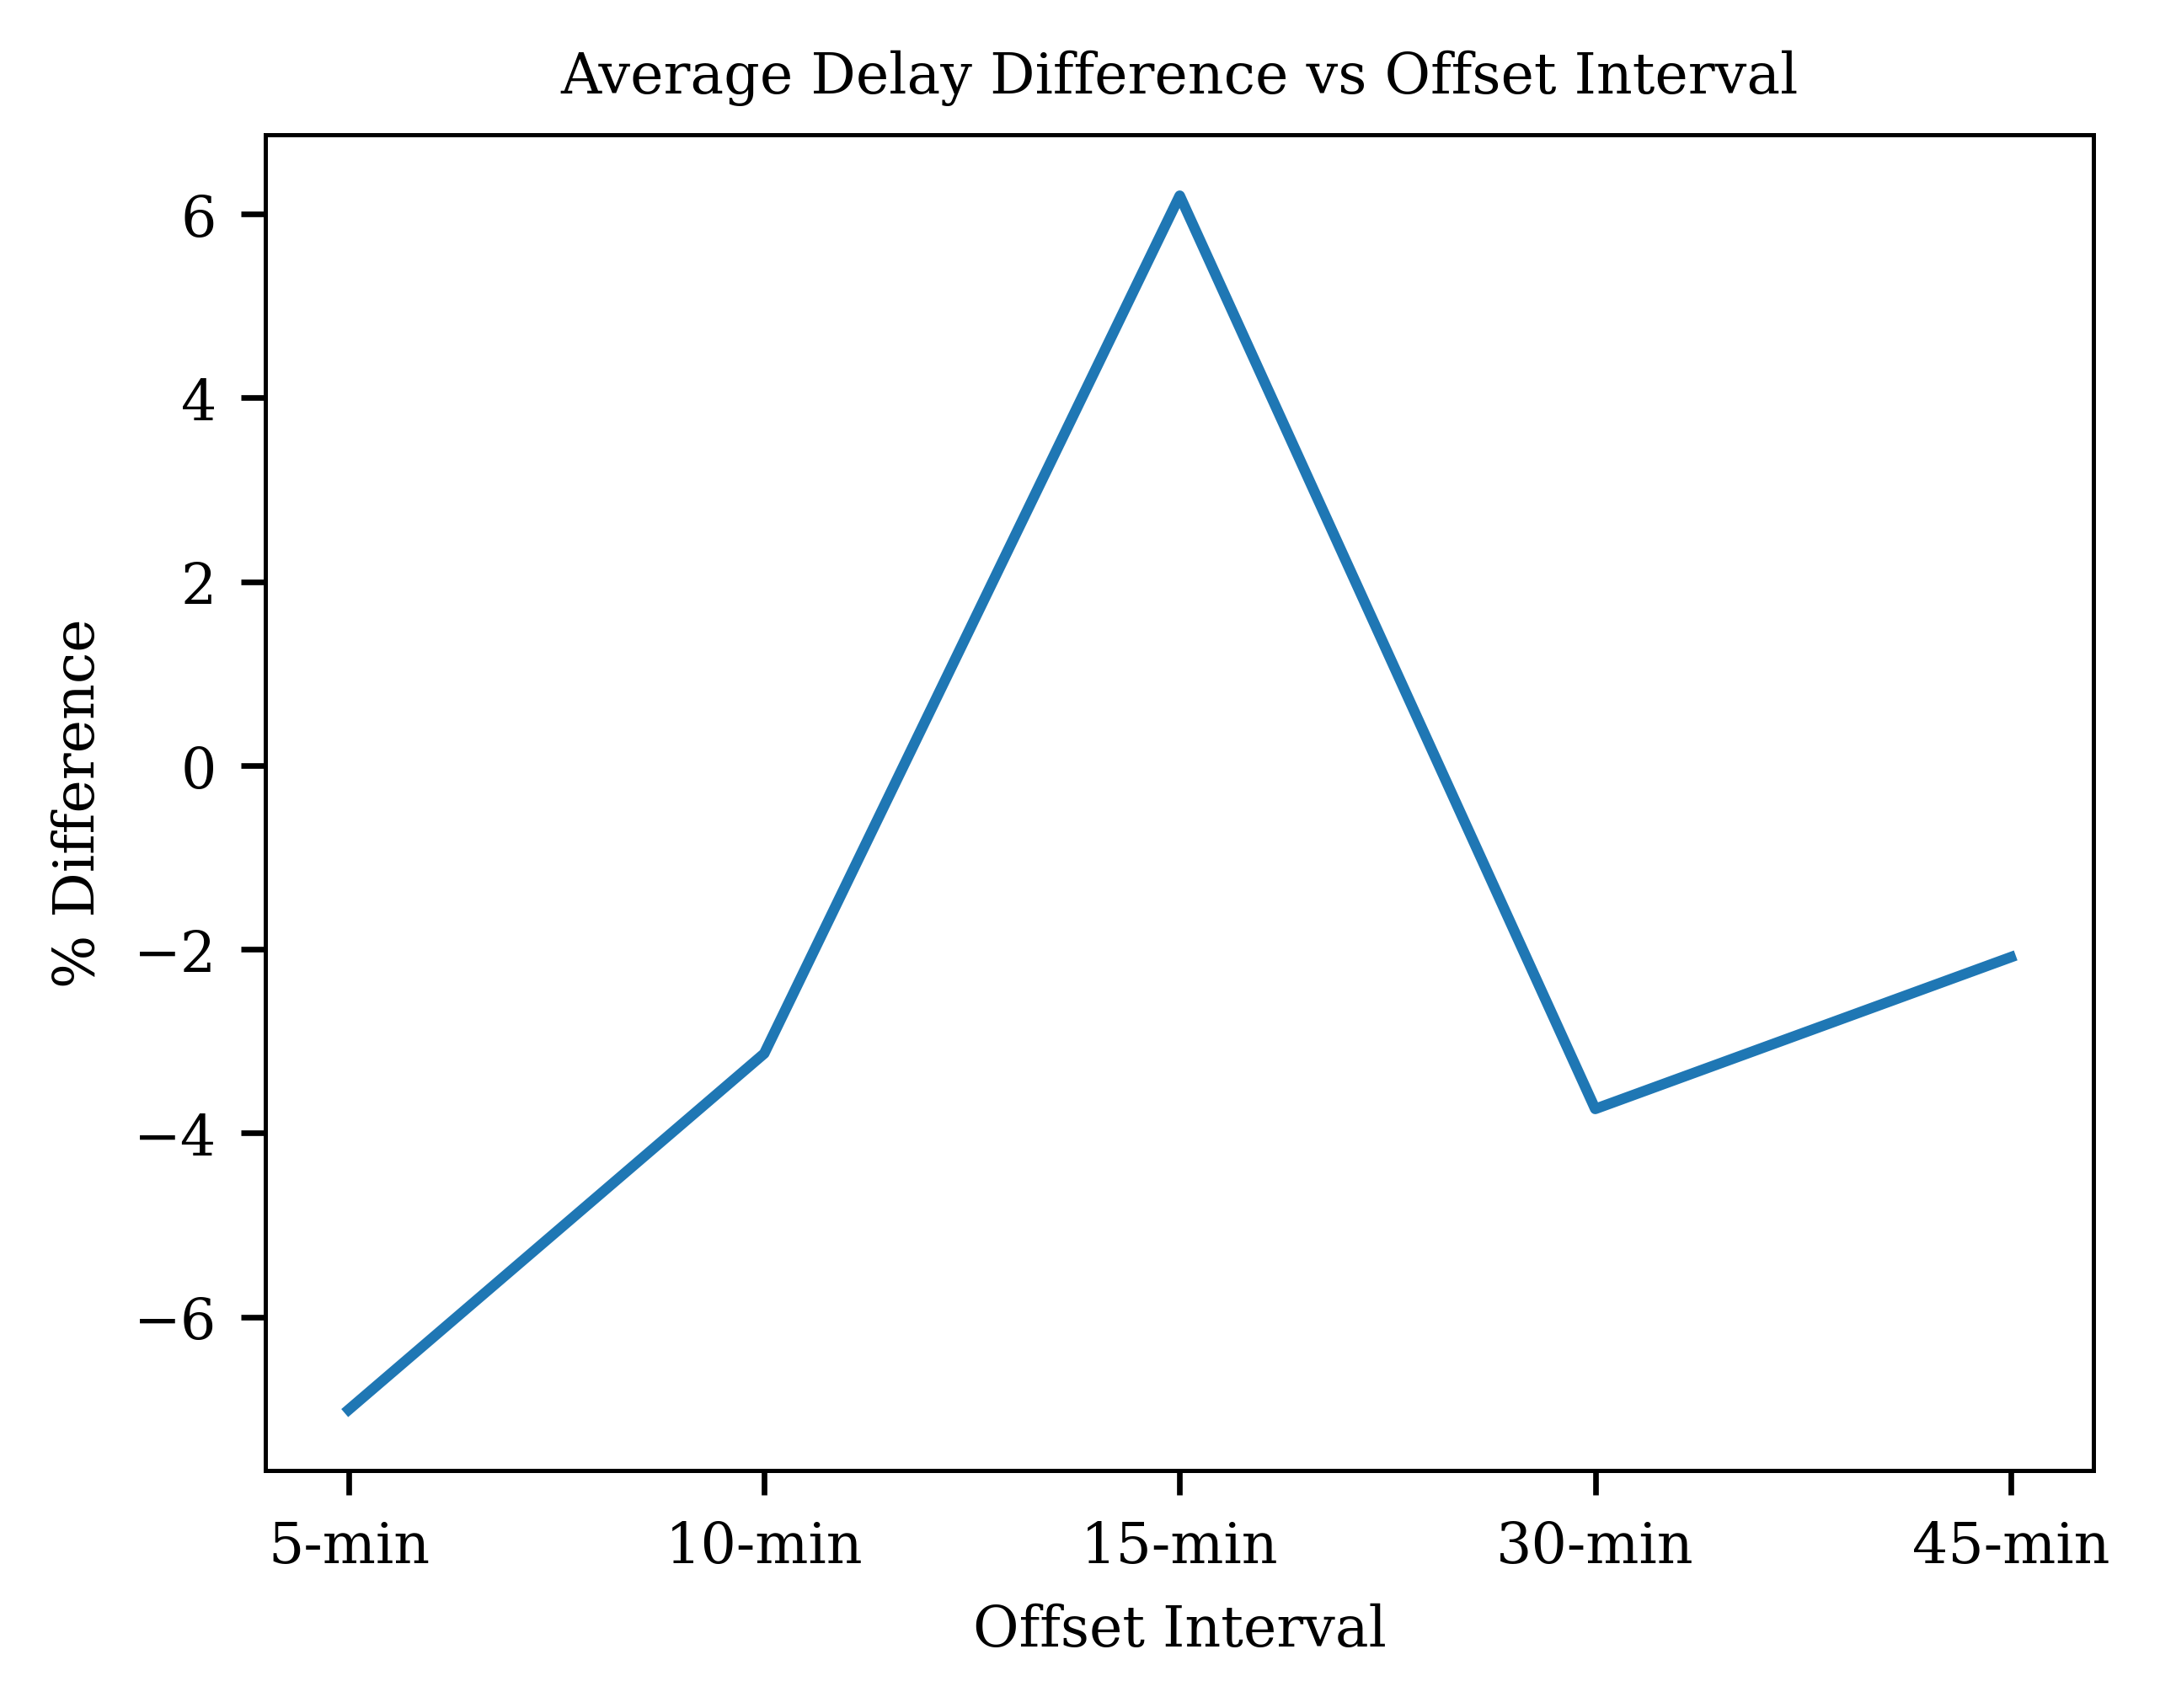

In [14]:
x = pd.read_csv('data/wahaha_PM_1.csv')
x['diff'] = (x['ave_baseline'] - x['ave_deepRL'])*100/x['ave_baseline']
fig, ax = plt.subplots()
ax.plot(x['interval'], x['diff'])
ax.set(title='Average Delay Difference vs Offset Interval', xlabel='Offset Interval', 
       ylabel='% Difference');

In [56]:
print("Hello %s"%x['x'])

Hello 2


In [102]:
x=pd.read_csv('data/50/data_10/output_AM.csv')

In [104]:
x['diff'] = x['min'] -x['max']

In [105]:
x

Unnamed: 0                 time  delay_time        min         max  \
0            0  2021-06-19 05:10:00       23.55  20.943012   29.395752   
1            1  2021-06-19 05:20:00       24.34  21.598465   28.517656   
2            2  2021-06-19 05:30:00       26.89  23.875421   33.609800   
3            3  2021-06-19 05:40:00       25.40  22.526505   30.696125   
4            4  2021-06-19 05:50:00       27.58  24.428177   34.282195   
5            5  2021-06-19 06:00:00       31.98  28.363866   35.891864   
6            6  2021-06-19 06:10:00       33.67  29.816617   40.230613   
7            7  2021-06-19 06:20:00       33.69  29.881667   37.648139   
8            8  2021-06-19 06:30:00       33.76  30.039976   41.560114   
9            9  2021-06-19 06:40:00       49.53  44.058780   57.747774   
10          10  2021-06-19 06:50:00       43.61  38.785247   52.417846   
11          11  2021-06-19 07:00:00       45.39  39.998137   53.323025   
12          12  2021-06-19 07:10:00       48.08  42.379724   58.708788   
13          13  2021-06-19 07:20:00       61.61  54.517471   70.958649   
14          14  2021-06-19 07:30:00       73.84  65.181114   83.301764   
15          15  2021-06-19 07:40:00       86.75  76.504436  103.964965   
16          16  2021-06-19 07:50:00       86.34  76.483629   99.057759   
17          17  2021-06-19 08:00:00       93.25  82.737364  112.654340   
18          18  2021-06-19 08:10:00      104.33  92.206719  125.802770   
19          19  2021-06-19 08:20:00       80.74  71.622607   93.725640   
20          20  2021-06-19 08:30:00       76.44  67.805140   88.267249   
21          21  2021-06-19 08:40:00       90.21  80.076848  111.081850   
22          22  2021-06-19 08:50:00       75.52  66.839023   86.069048   
23          23  2021-06-19 09:00:00       70.15  62.040357   86.207040   
24          24  2021-06-19 09:10:00       73.38  64.829038   86.408471   
25          25  2021-06-19 09:20:00       54.73  48.670048   63.148861   
26          26  2021-06-19 09:30:00       49.62  43.782221   58.827431   
27          27  2021-06-19 09:40:00       43.47  38.459592   49.221585   
28          28  2021-06-19 09:50:00       44.42  39.314999   53.617869   
29          29  2021-06-19 10:00:00       46.83  41.283081   53.714698   
30          30  2021-06-19 10:10:00       41.58  36.900221   48.172879   
31          31  2021-06-19 10:20:00       40.68  36.159279   50.664295   
32          32  2021-06-19 10:30:00       42.24  37.305345   47.450299   
33          33  2021-06-19 10:40:00       40.81  36.310152   49.259429   
34          34  2021-06-19 10:50:00       41.96  37.317356   47.693156   
35          35  2021-06-19 11:00:00       38.94  34.652305   48.283146   

         diff  
0   -8.452741  
1   -6.919191  
2   -9.734379  
3   -8.169620  
4   -9.854017  
5   -7.527998  
6  -10.413996  
7   -7.766472  
8  -11.520138  
9  -13.688994  
10 -13.632599  
11 -13.324887  
12 -16.329064  
13 -16.441177  
14 -18.120650  
15 -27.460529  
16 -22.574130  
17 -29.916976  
18 -33.596051  
19 -22.103033  
20 -20.462109  
21 -31.005002  
22 -19.230025  
23 -24.166683  
24 -21.579433  
25 -14.478813  
26 -15.045210  
27 -10.761993  
28 -14.302870  
29 -12.431618  
30 -11.272658  
31 -14.505015  
32 -10.144954  
33 -12.949277  
34 -10.375801  
35 -13.630841

In [69]:
x['x'] = [15,13,12]

In [70]:
x

x    y
0  15  NaN
1  13  NaN
2  12  NaN